# Исследование факторов ДТП по регионам РФ

## Вступление

ДТП - является одной из частых причин инвалидизации и преждевременной смерти среди трудоспособного населения. Затраты, связанные с ликвидацией последствий ДТП, достигают до 3% внутреннего валового продукта страны. 
Вашему вниманию представлен baseline для выгрузки и дальнейшего анализа данных по ДТП с 2015 по 2023 годы.

Файлы находятся [тут](https://dtp-stat.ru/opendata) в формате geojson.
Ниже представлена структура файлов. 

Адресация файлов в коде сделана под Ubuntu и подобные системы.

# Первая часть

## Получение данных

In [8]:
# Загрузка библиотек

from tqdm import tqdm
import os
import pandas as pd
import geopandas as gpd #для  чтения
import warnings
warnings.filterwarnings('ignore')
import json
import numpy as np
from pandas_geojson import read_geojson
import re
import requests
import matplotlib.pyplot as plt


Вид данных.

In [2]:
# Загрузим страницу по ссылке и запишем данные.
base_url = 'https://dtp-stat.ru/opendata'
# узнать свой User-Agent можно по ссылке: https://user-agents.net/my-user-agent
hd = {
        'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:122.0) Gecko/20100101 Firefox/122.0'
      }


response = requests.get(base_url,headers=hd)


# Можно записать данные.
with open('dtp.html', 'wb') as file:
    file.write(response.content)

Используем регулярное выражение для получения данных.

In [3]:
# Получаем список ссылок, для загрузки файлов.

list_for_download = re.findall(r'https:\/\/cms.dtp-stat.ru[\S][^\"\n]+',response.text)

In [4]:
#pip install geopandas

In [5]:
#pip install pandas_geojson

In [6]:
#pip install -U pygeoj

In [7]:
len(list_for_download)

85

In [8]:
#list_for_download

['https://cms.dtp-stat.ru/media/opendata/altaiskii-krai.geojson',
 'https://cms.dtp-stat.ru/media/opendata/amurskaia-oblast.geojson',
 'https://cms.dtp-stat.ru/media/opendata/arkhangelskaia-oblast.geojson',
 'https://cms.dtp-stat.ru/media/opendata/astrakhanskaia-oblast.geojson',
 'https://cms.dtp-stat.ru/media/opendata/belgorodskaia-oblast.geojson',
 'https://cms.dtp-stat.ru/media/opendata/brianskaia-oblast.geojson',
 'https://cms.dtp-stat.ru/media/opendata/vladimirskaia-oblast.geojson',
 'https://cms.dtp-stat.ru/media/opendata/volgogradskaia-oblast.geojson',
 'https://cms.dtp-stat.ru/media/opendata/vologodskaia-oblast.geojson',
 'https://cms.dtp-stat.ru/media/opendata/voronezhskaia-oblast.geojson',
 'https://cms.dtp-stat.ru/media/opendata/evreiskaia-avtonomnaia-oblast.geojson',
 'https://cms.dtp-stat.ru/media/opendata/zabaikalskii-krai.geojson',
 'https://cms.dtp-stat.ru/media/opendata/ivanovskaia-oblast.geojson',
 'https://cms.dtp-stat.ru/media/opendata/irkutskaia-oblast.geojson',
 '

In [9]:
list_for_download1 = list_for_download[:24]
list_for_download2 = list_for_download[24:35]
list_for_download3 = list_for_download[35:55]
list_for_download4 = list_for_download[55:70]
list_for_download5 = list_for_download[70:86]

In [10]:
# Функция для загрузки файлов с сайта.

def write_url_to_file(url):

    response = requests.get(url)
#   Добавление пути файла и замена в имени файла дефиса ни нижнее подчеркивание.

    path = f'dtp/' + re.search(r"[\w-]+.geojson", url)[0].replace('-', '_')

#   Запись в файл.
    file = open(path, "wb")
    file.write(response.content)
    file.close()
    return

In [11]:
# Создадим папку для сохранения файлов с сайта и запустим функцию.
if os.path.isdir('dtp') == False:
    os.mkdir('dtp')

for url in list_for_download1:
    write_url_to_file(url)
for url in list_for_download2:
    write_url_to_file(url)
for url in list_for_download3:
    write_url_to_file(url)
for url in list_for_download4:
    write_url_to_file(url)
for url in list_for_download5:
    write_url_to_file(url)    

Первая часть - получение данных, выполнена! Теперь эти данные нужно предобработать.

В примере будет показана предобработка одного файла, данную операцию можно сделать с несколькими файлами. Если будет желание, то можно попробовать со всеми файлами.

Далее я проведу повторную загрузку библиотек, так как во второй части мы предполагаем, что все данные у нас получены, поэтому повторно с сайта мы их загружать не будем.

# Вторая часть

## Создание датафреймов

In [2]:
# Загрузка библиотек

import os
import pandas as pd
# from pandas_geojson import read_geojson
import re
import requests
import matplotlib.pyplot as plt
import datetime as dt
import dill as pickle
import seaborn as sns
import plotly
import plotly.graph_objs as go
import plotly.express as px

In [3]:
# Заплатка для Windows и новой библиотеки.

def read_geojson(filename):
    with open(f'{filename}', encoding= 'utf-8') as response:
        geo_json = json.load(response)
    return geo_json

In [9]:
# Прочитаем файлы в директории dtp и переведем первый файл в датафрейм
list_file = os.listdir('dtp')

# Посчитаем общее число скачанных файлов.
print(f'Общее число файлов в директории dtp {len(list_file)}.')

geo_json = read_geojson(os.path.join('dtp',list_file[0]))

Общее число файлов в директории dtp 85.


In [10]:
geo_json.keys()

dict_keys(['type', 'features'])

In [11]:
geo_json['type']

'FeatureCollection'

In [12]:
# Смотрим структуру файла.

geo_json['features'][0]

{'type': 'Feature',
 'geometry': {'type': 'Point', 'coordinates': [53.0986, 52.4139]},
 'properties': {'id': 2872510,
  'tags': ['Дорожно-транспортные происшествия'],
  'light': 'Светлое время суток',
  'point': {'lat': 52.4139, 'long': 53.0986},
  'nearby': [],
  'region': 'Сорочинский',
  'scheme': '210',
  'address': 'М-5 Урал, подъезд к городу Оренбург, 256 км',
  'weather': ['Ясно'],
  'category': 'Столкновение',
  'datetime': '2023-08-22 12:55:00',
  'severity': 'С погибшими',
  'vehicles': [{'year': 2019,
    'brand': 'ВАЗ',
    'color': 'Иные цвета',
    'model': 'Vesta (Веста)',
    'category': 'А-класс (особо малый) до 3,5 м',
    'participants': [{'role': 'Водитель',
      'gender': 'Мужской',
      'violations': ['Нарушение правил обгона'],
      'health_status': 'Скончался на месте ДТП до приезда скорой медицинской помощи',
      'years_of_driving_experience': 36}]},
   {'year': 2023,
    'brand': 'Прочие марки грузовых ТС',
    'color': 'Белый',
    'model': 'Прочие марки

In [13]:
# Попытка прочитать сразу не удалась.

pd.DataFrame(geo_json).head()

type                                           features
0  FeatureCollection  {'type': 'Feature', 'geometry': {'type': 'Poin...
1  FeatureCollection  {'type': 'Feature', 'geometry': {'type': 'Poin...
2  FeatureCollection  {'type': 'Feature', 'geometry': {'type': 'Poin...
3  FeatureCollection  {'type': 'Feature', 'geometry': {'type': 'Poin...
4  FeatureCollection  {'type': 'Feature', 'geometry': {'type': 'Poin...

In [14]:
# Используем нормализацию json из бибилотеки pandas - json_normalize

df = pd.json_normalize(geo_json['features'])

# Прочитаем первые пять строк и транспонируем таблицу для удобства.

df.head().T

0  \
type                                                                         Feature   
geometry.type                                                                  Point   
geometry.coordinates                                              [53.0986, 52.4139]   
properties.id                                                                2872510   
properties.tags                                  [Дорожно-транспортные происшествия]   
properties.light                                                 Светлое время суток   
properties.point.lat                                                         52.4139   
properties.point.long                                                        53.0986   
properties.nearby                                                                 []   
properties.region                                                        Сорочинский   
properties.scheme                                                                210   
properties.address                       М-5 Урал, подъезд к городу Оренбург, 256 км   
properties.weather                                                            [Ясно]   
properties.category                                                     Столкновение   
properties.datetime                                              2023-08-22 12:55:00   
properties.severity                                                      С погибшими   
properties.vehicles                [{'year': 2019, 'brand': 'ВАЗ', 'color': 'Иные...   
properties.dead_count                                                              1   
properties.participants                                                           []   
properties.injured_count                                                           0   
properties.parent_region                                        Оренбургская область   
properties.road_conditions                                                   [Сухое]   
properties.participants_count                                                      2   
properties.participant_categories                                    [Все участники]   

                                                                                   1  \
type                                                                         Feature   
geometry.type                                                                  Point   
geometry.coordinates                                              [53.1781, 52.4108]   
properties.id                                                                1811577   
properties.tags                                  [Дорожно-транспортные происшествия]   
properties.light                         В темное время суток, освещение отсутствует   
properties.point.lat                                                         52.4108   
properties.point.long                                                        53.1781   
properties.nearby                                                                 []   
properties.region                                                        Сорочинский   
properties.scheme                                                                610   
properties.address                                               Прочие дороги, 0 км   
properties.weather                                                            [Ясно]   
properties.category                                                    Опрокидывание   
properties.datetime                                              2017-10-21 18:30:00   
properties.severity                                                           Легкий   
properties.vehicles                [{'year': 2003, 'brand': 'ВАЗ', 'color': 'Белы...   
properties.dead_count                                                              0   
properties.participants                                                           []   
properties.injured_count                                                           1   
properties.parent_region          

In [15]:
# Смотрим общую информацию.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17361 entries, 0 to 17360
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   type                               17361 non-null  object 
 1   geometry.type                      17361 non-null  object 
 2   geometry.coordinates               17361 non-null  object 
 3   properties.id                      17361 non-null  int64  
 4   properties.tags                    17361 non-null  object 
 5   properties.light                   17361 non-null  object 
 6   properties.point.lat               17347 non-null  float64
 7   properties.point.long              17347 non-null  float64
 8   properties.nearby                  17361 non-null  object 
 9   properties.region                  17361 non-null  object 
 10  properties.scheme                  16095 non-null  object 
 11  properties.address                 16690 non-null  obj

In [16]:
# Слишком длинные названия столбцов. Укоротим и удалим первые два столбца
df = df.drop([col for col in df.columns if 'type' in col], axis =1)
df.columns = [col.split('.')[-1] for col in df.columns]
df.columns

Index(['coordinates', 'id', 'tags', 'light', 'lat', 'long', 'nearby', 'region',
       'scheme', 'address', 'weather', 'category', 'datetime', 'severity',
       'vehicles', 'dead_count', 'participants', 'injured_count',
       'parent_region', 'road_conditions', 'participants_count',
       'participant_categories'],
      dtype='object')

Еще раз посмотрим на данные представленные в формате geojson.

    "id"  # идентификатор
    "tags"  # показатели с официального сайта ГИБДД
    "light"  # время суток
    "point"  # координаты
    "nearby"  # объекты рядом
    "region" # город/район
    "address" # адрес
    "weather"  # погода
    "category"  # тип ДТП
    "datetime"  # дата и время
    "severity" # тяжесть ДТП/вред здоровью
    "vehicles": [  # участники – транспортные средства
        {
            "year":
            2010,  # год производства транспортного средства
            "brand":
            "ВАЗ",  # марка транспортного средства
            "color":
            "Иные цвета",  # цвет транспортного средства
            "model":
            "Priora",  # модель транспортного средства
            "category":
            "С-класс (малый средний, компактный) до 4,3 м",  # категория транспортного средства
            "participants": [  # участники внутри транспортных средств
                {
                    "role": "Водитель",  # роль участника
                    "gender": "Женский",  # пол участника
                    "violations": [],  # нарушения правил участником
                    "health_status":
                    "Раненый, находящийся...",  # состояние здоровья участника
                    "years_of_driving_experience" # стаж вождения участника (только у водителей)
                }
            ]
        },
    ],
    "dead_count" # кол-во погибших в ДТП
    "participants" # участники без транспортных средств (описание, как у участников внутри транспортных средств)
    "injured_count" # кол-во раненых в ДТП
    "parent_region" # родительский регион (основной)
    "road_conditions" # состояние дорожного покрытия
    "participants_count" # кол-во участников ДТП
    "participant_categories" # категории участников


Для начала посмотрим, что у нас получилось в общем датафрейме.

Обратим внимание, что часть данных находится в форматах json или list. Эти данные необходимо выделить в отдельный датафрейм (для json) или перевести в более удобный формат(list).

In [17]:
# Создадим функция для исследования данных (Первый шаг EDA).

def first_look_data(data):
    display(data.head())
    print('Колонки')
    print(data.columns)
#     Данный print позволяет красиво выделять данные,
#     не набирая при этом 50 раз * или -)))

    print(50*'-')
    print('Содержимое колонок')
    print(20*'*')

# Многие из вас используют data.columns,
# но можно и так.
    for col in data:
        print(col)
# Не все колонки могут быть прочитаны
# unique и nunique
        try:
            print(data[col].unique())
            print(data[col].nunique())


        except TypeError:
            print('Списковое исключение')

            print(data[col][:5])



        print(20*'*')
    print('Общая информация')
    print(data.info())

    print(50*"-")
    print('Пропуски')
    print(data.isna().sum())
    print(50*"-")

In [18]:
#посмотрим информацию об основной таблице
first_look_data(df)

coordinates       id                                 tags  \
0      [53.0986, 52.4139]  2872510  [Дорожно-транспортные происшествия]   
1      [53.1781, 52.4108]  1811577  [Дорожно-транспортные происшествия]   
2  [53.043537, 52.444344]  2620851  [Дорожно-транспортные происшествия]   
3  [52.906272, 52.706841]  2646512  [Дорожно-транспортные происшествия]   
4  [52.976246, 52.474573]  1818264  [Дорожно-транспортные происшествия]   

                                         light        lat       long nearby  \
0                          Светлое время суток  52.413900  53.098600     []   
1  В темное время суток, освещение отсутствует  52.410800  53.178100     []   
2                          Светлое время суток  52.444344  53.043537     []   
3                          Светлое время суток  52.706841  52.906272     []   
4                          Светлое время суток  52.474573  52.976246     []   

        region scheme                                      address  ...  \
0  Сорочинский    210  М-5 Урал, подъезд к городу Оренбург, 256 км  ...   
1  Сорочинский    610                          Прочие дороги, 0 км  ...   
2  Сорочинский    220  М-5 Урал, подъезд к городу Оренбург, 251 км  ...   
3  Сорочинский   None                                         None  ...   
4  Сорочинский    010  М-5 Урал, подъезд к городу Оренбург, 245 км  ...   

              datetime     severity  \
0  2023-08-22 12:55:00  С погибшими   
1  2017-10-21 18:30:00       Легкий   
2  2021-09-18 13:47:00      Тяжёлый   
3  2021-11-02 14:30:00       Легкий   
4  2020-01-04 12:30:00       Легкий   

                                            vehicles dead_count participants  \
0  [{'year': 2019, 'brand': 'ВАЗ', 'color': 'Иные...          1           []   
1  [{'year': 2003, 'brand': 'ВАЗ', 'color': 'Белы...          0           []   
2  [{'year': 2009, 'brand': 'SKODA', 'color': 'Бе...          0           []   
3  [{'year': 2017, 'brand': 'Прочие марки мотоцик...          0           []   
4  [{'year': 2016, 'brand': 'ВАЗ', 'color': 'Серы...          0           []   

   injured_count         parent_region             road_conditions  \
0              0  Оренбургская область                     [Сухое]   
1              1  Оренбургская область  [Сухое, Неровное покрытие]   
2              4  Оренбургская область                     [Сухое]   
3              1  Оренбургская область                     [Сухое]   
4              1  Оренбургская область                    [Мокрое]   

  participants_count         participant_categories  
0                  2                [Все участники]  
1                  2                [Все участники]  
2                  4                [Все участники]  
3                  1  [Мотоциклисты, Все участники]  
4                  4                [Все участники]  

[5 rows x 22 columns]

Колонки
Index(['coordinates', 'id', 'tags', 'light', 'lat', 'long', 'nearby', 'region',
       'scheme', 'address', 'weather', 'category', 'datetime', 'severity',
       'vehicles', 'dead_count', 'participants', 'injured_count',
       'parent_region', 'road_conditions', 'participants_count',
       'participant_categories'],
      dtype='object')
--------------------------------------------------
Содержимое колонок
********************
coordinates
Списковое исключение
0        [53.0986, 52.4139]
1        [53.1781, 52.4108]
2    [53.043537, 52.444344]
3    [52.906272, 52.706841]
4    [52.976246, 52.474573]
Name: coordinates, dtype: object
********************
id
[2872510 1811577 2620851 ... 1817094 2521166 1819013]
17361
********************
tags
Списковое исключение
0    [Дорожно-транспортные происшествия]
1    [Дорожно-транспортные происшествия]
2    [Дорожно-транспортные происшествия]
3    [Дорожно-транспортные происшествия]
4    [Дорожно-транспортные происшествия]
Name: tags, dtype

Основные проблемы:
- Есть списки;
- Есть json;
- Есть столбец scheme, которого нет в описании.
- Столбец даты не приведен к нужному формату.

Решаем проблемы:
- Пробуем разделить списки;
- Разделяем json;
- Оставляем scheme, приведя пропуски к единому типу.
- Приводим столбец даты в нужный формат.

Теперь выделим в отдельный датафреймы json структуры.

Для чего используем json_normalize.

In [19]:
# Пишем функцию.

def normalize_json_to_data(data, col):

    data_out = pd.json_normalize(data.explode(col)[col])


#     Все таблицы связаны между собой через id родительской таблицы.

    data_out = pd.concat([
        pd.DataFrame(data.explode(col)['id'].values, columns=['id']),
        data_out
    ],
                            axis=1)
    return data_out

In [20]:
# Датафрейм для машин.

df_vehicles = normalize_json_to_data(df, 'vehicles').reset_index(drop=True)

# Датафрейм для пассажиров машин.

df_vehicles_participants = normalize_json_to_data(
    df_vehicles, 'participants').reset_index(drop=True)

# Датафрейм для пешеходов.
# Дополнительно удалим все пустые строки, так как там нет пешеходов.
df_footer = normalize_json_to_data(
    df, 'participants').dropna().reset_index(drop=True)

In [21]:
my_dict = {'id':[1,2,3,4,5],'other':[['1','2'],[3,4],[],[5,6],[{'a':50, 'b':100,'c':500}]]}

In [22]:
data = pd.DataFrame(my_dict)
data

id                            other
0   1                           [1, 2]
1   2                           [3, 4]
2   3                               []
3   4                           [5, 6]
4   5  [{'a': 50, 'b': 100, 'c': 500}]

In [23]:
pd.DataFrame(data.explode('other'))

id                          other
0   1                              1
0   1                              2
1   2                              3
1   2                              4
2   3                            NaN
3   4                              5
3   4                              6
4   5  {'a': 50, 'b': 100, 'c': 500}

In [24]:
pd.json_normalize(data.explode('other')['other'])

a      b      c
0   NaN    NaN    NaN
1   NaN    NaN    NaN
2   NaN    NaN    NaN
3   NaN    NaN    NaN
4   NaN    NaN    NaN
5   NaN    NaN    NaN
6   NaN    NaN    NaN
7  50.0  100.0  500.0

# Предобработка

In [25]:
#посмотрим информацию об основной таблице
first_look_data(df)

coordinates       id                                 tags  \
0      [53.0986, 52.4139]  2872510  [Дорожно-транспортные происшествия]   
1      [53.1781, 52.4108]  1811577  [Дорожно-транспортные происшествия]   
2  [53.043537, 52.444344]  2620851  [Дорожно-транспортные происшествия]   
3  [52.906272, 52.706841]  2646512  [Дорожно-транспортные происшествия]   
4  [52.976246, 52.474573]  1818264  [Дорожно-транспортные происшествия]   

                                         light        lat       long nearby  \
0                          Светлое время суток  52.413900  53.098600     []   
1  В темное время суток, освещение отсутствует  52.410800  53.178100     []   
2                          Светлое время суток  52.444344  53.043537     []   
3                          Светлое время суток  52.706841  52.906272     []   
4                          Светлое время суток  52.474573  52.976246     []   

        region scheme                                      address  ...  \
0  Сорочинский    210  М-5 Урал, подъезд к городу Оренбург, 256 км  ...   
1  Сорочинский    610                          Прочие дороги, 0 км  ...   
2  Сорочинский    220  М-5 Урал, подъезд к городу Оренбург, 251 км  ...   
3  Сорочинский   None                                         None  ...   
4  Сорочинский    010  М-5 Урал, подъезд к городу Оренбург, 245 км  ...   

              datetime     severity  \
0  2023-08-22 12:55:00  С погибшими   
1  2017-10-21 18:30:00       Легкий   
2  2021-09-18 13:47:00      Тяжёлый   
3  2021-11-02 14:30:00       Легкий   
4  2020-01-04 12:30:00       Легкий   

                                            vehicles dead_count participants  \
0  [{'year': 2019, 'brand': 'ВАЗ', 'color': 'Иные...          1           []   
1  [{'year': 2003, 'brand': 'ВАЗ', 'color': 'Белы...          0           []   
2  [{'year': 2009, 'brand': 'SKODA', 'color': 'Бе...          0           []   
3  [{'year': 2017, 'brand': 'Прочие марки мотоцик...          0           []   
4  [{'year': 2016, 'brand': 'ВАЗ', 'color': 'Серы...          0           []   

   injured_count         parent_region             road_conditions  \
0              0  Оренбургская область                     [Сухое]   
1              1  Оренбургская область  [Сухое, Неровное покрытие]   
2              4  Оренбургская область                     [Сухое]   
3              1  Оренбургская область                     [Сухое]   
4              1  Оренбургская область                    [Мокрое]   

  participants_count         participant_categories  
0                  2                [Все участники]  
1                  2                [Все участники]  
2                  4                [Все участники]  
3                  1  [Мотоциклисты, Все участники]  
4                  4                [Все участники]  

[5 rows x 22 columns]

Колонки
Index(['coordinates', 'id', 'tags', 'light', 'lat', 'long', 'nearby', 'region',
       'scheme', 'address', 'weather', 'category', 'datetime', 'severity',
       'vehicles', 'dead_count', 'participants', 'injured_count',
       'parent_region', 'road_conditions', 'participants_count',
       'participant_categories'],
      dtype='object')
--------------------------------------------------
Содержимое колонок
********************
coordinates
Списковое исключение
0        [53.0986, 52.4139]
1        [53.1781, 52.4108]
2    [53.043537, 52.444344]
3    [52.906272, 52.706841]
4    [52.976246, 52.474573]
Name: coordinates, dtype: object
********************
id
[2872510 1811577 2620851 ... 1817094 2521166 1819013]
17361
********************
tags
Списковое исключение
0    [Дорожно-транспортные происшествия]
1    [Дорожно-транспортные происшествия]
2    [Дорожно-транспортные происшествия]
3    [Дорожно-транспортные происшествия]
4    [Дорожно-транспортные происшествия]
Name: tags, dtype

## столбец id


In [26]:
df.id.max()

2943653

In [27]:
df.id.min()

1810268

разброс значений идентификатора ДТП id столбец не велико, поэтому можем понизить размерность столбца без потери качества данных

In [28]:
# смотрим объем занимаемый столбцом до преобразования
df[['id']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17361 entries, 0 to 17360
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      17361 non-null  int64
dtypes: int64(1)
memory usage: 135.8 KB


In [29]:
# меняем тип данных на целочисленное чтобы уменьшить вес столбца
df.id = df.id.astype(np.int32)

In [30]:
# смотрим объем занимаемый столбцом после преобразования
df[['id']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17361 entries, 0 to 17360
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      17361 non-null  int32
dtypes: int32(1)
memory usage: 67.9 KB


## столбец coordinates
столбец не имеет пропусков, посмотрим уникальные значения

In [31]:
# смотрим объем занимаемый столбцом до преобразования
df[['coordinates']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17361 entries, 0 to 17360
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   coordinates  17361 non-null  object
dtypes: object(1)
memory usage: 135.8+ KB


In [32]:
# уникальные значения можно посмотреть только через explode, посмотрим количество значений в столбце
df.coordinates.value_counts().reset_index().head(15)

coordinates  count
0           [55.0, 51.0]    114
1           [54.0, 51.0]     83
2       [53.65, 53.6833]     45
3           [52.0, 52.0]     37
4     [53.1475, 52.4283]     22
5   [53.1475, 52.428056]     22
6     [53.65, 53.683056]     22
7           [56.0, 51.0]     21
8       [55.3333, 51.25]     20
9       [53.6833, 53.65]     20
10    [55.0908, 51.7747]     15
11      [59.8833, 51.95]     14
12          [None, None]     14
13          [52.0, 51.0]     14
14    [59.7328, 52.0817]     14

12 позиция [None,None] это пропуски

In [33]:
# извлечем из списков координалы в бд координат
df_coordinates = df.explode('coordinates')

In [34]:
# пропуски есть в широте и долготе, создадим список с id ДТП в которых пропуски
list_nan_coordinates = list(df_coordinates[df_coordinates.lat.isna()]['id'])

In [35]:
# посмотрим значения в пропущенных ячейках столбца coordinates
df[df.id.isin(list_nan_coordinates)].head()

coordinates       id  \
1357  [None, None]  1816806   
3721  [None, None]  1817745   
5405  [None, None]  1813746   
5501  [None, None]  1815136   
6530  [None, None]  1816749   

                                                   tags  \
1357                [Дорожно-транспортные происшествия]   
3721  [Дорожно-транспортные происшествия, ДТП и пост...   
5405  [Дорожно-транспортные происшествия, ДТП и пост...   
5501                [Дорожно-транспортные происшествия]   
6530                [Дорожно-транспортные происшествия]   

                                            light  lat  long  \
1357  В темное время суток, освещение отсутствует  NaN   NaN   
3721     В темное время суток, освещение включено  NaN   NaN   
5405                          Светлое время суток  NaN   NaN   
5501  В темное время суток, освещение отсутствует  NaN   NaN   
6530  В темное время суток, освещение отсутствует  NaN   NaN   

                                                 nearby              region  \
1357                                                 []      Бугурусланский   
3721                          [Административные здания]          Ташлинский   
5405                                                 []        Переволоцкий   
5501                                                 []        Переволоцкий   
6530  [Жилые дома индивидуальной застройки, Нерегули...  Красно-гвардейский   

     scheme                                            address  ...  \
1357    610  подъезд к с. Молчановка от а/д Бугуруслан - Аб...  ...   
3721    820                              с Ташла, ул Новая, 19  ...   
5405   None                       с Чесноковка, ул Светлая, 16  ...   
5501    600            Переволоцкий - Зубочистка Вторая, 14 км  ...   
6530   None  подъезд к пос. Клинок от а/д Ивановка - Сорочи...  ...   

                 datetime     severity  \
1357  2017-11-29 22:00:00  С погибшими   
3721  2017-05-15 18:20:00       Легкий   
5405  2015-07-09 20:55:00       Легкий   
5501  2017-07-28 23:00:00      Тяжёлый   
6530  2017-11-19 19:30:00      Тяжёлый   

                                               vehicles dead_count  \
1357  [{'year': 2012, 'brand': 'ВАЗ', 'color': 'Иные...          1   
3721  [{'year': None, 'brand': 'ВАЗ', 'color': 'Зеле...          0   
5405  [{'year': None, 'brand': 'Прочие марки ТС', 'c...          0   
5501  [{'year': None, 'brand': 'ВАЗ', 'color': 'Белы...          0   
6530  [{'year': 2007, 'brand': 'VOLKSWAGEN', 'color'...          0   

                                           participants  injured_count  \
1357                                                 []              0   
3721  [{'role': 'Пешеход', 'gender': 'Мужской', 'vio...              1   
5405                                                 []              1   
5501                                                 []              1   
6530                                                 []              1   

             parent_region                                    road_conditions  \
1357  Оренбургская область                                            [Сухое]   
3721  Оренбургская область  [Недостатки зимнего содержания, Со снежным нак...   
5405  Оренбургская область  [Сухое, Отсутствие тротуаров (пешеходных дорож...   
5501  Оренбургская область                                            [Сухое]   
6530  Оренбургская область  [Сухое, Отсутствие, плохая различимость горизо...   

     participants_count               participant_categories  
1357                  1                      [Все участники]  
3721                  2      [Пешеходы, Дети, Все участники]  
5405                  2  [Мотоциклисты, Дети, Все участники]  
5501                  1                      [Все участники]  
6530                  2                      [Все участники]  

[5 rows x 22 columns]

In [36]:
# в созданной бд посмотрим уникальные значения
df_coordinates[df_coordinates.id.isin(list_nan_coordinates)]['coordinates'].unique()

array([None], dtype=object)

в столбце координаты только пустые значения

In [37]:
# выведем их на экран
df_coordinates[df_coordinates.coordinates.isna()]

coordinates       id                                               tags  \
1357         None  1816806                [Дорожно-транспортные происшествия]   
1357         None  1816806                [Дорожно-транспортные происшествия]   
3721         None  1817745  [Дорожно-транспортные происшествия, ДТП и пост...   
3721         None  1817745  [Дорожно-транспортные происшествия, ДТП и пост...   
5405         None  1813746  [Дорожно-транспортные происшествия, ДТП и пост...   
5405         None  1813746  [Дорожно-транспортные происшествия, ДТП и пост...   
5501         None  1815136                [Дорожно-транспортные происшествия]   
5501         None  1815136                [Дорожно-транспортные происшествия]   
6530         None  1816749                [Дорожно-транспортные происшествия]   
6530         None  1816749                [Дорожно-транспортные происшествия]   
6531         None  1814271                [Дорожно-транспортные происшествия]   
6531         None  1814271                [Дорожно-транспортные происшествия]   
6544         None  1816325                [Дорожно-транспортные происшествия]   
6544         None  1816325                [Дорожно-транспортные происшествия]   
6546         None  1816540                [Дорожно-транспортные происшествия]   
6546         None  1816540                [Дорожно-транспортные происшествия]   
6548         None  1821918                [Дорожно-транспортные происшествия]   
6548         None  1821918                [Дорожно-транспортные происшествия]   
6552         None  1812943                [Дорожно-транспортные происшествия]   
6552         None  1812943                [Дорожно-транспортные происшествия]   
6562         None  1819203                [Дорожно-транспортные происшествия]   
6562         None  1819203                [Дорожно-транспортные происшествия]   
6570         None  1820129                [Дорожно-транспортные происшествия]   
6570         None  1820129                [Дорожно-транспортные происшествия]   
6575         None  1821269                [Дорожно-транспортные происшествия]   
6575         None  1821269                [Дорожно-транспортные происшествия]   
16277        None  1819635                [Дорожно-транспортные происшествия]   
16277        None  1819635                [Дорожно-транспортные происшествия]   

                                             light  lat  long  \
1357   В темное время суток, освещение отсутствует  NaN   NaN   
1357   В темное время суток, освещение отсутствует  NaN   NaN   
3721      В темное время суток, освещение включено  NaN   NaN   
3721      В темное время суток, освещение включено  NaN   NaN   
5405                           Светлое время суток  NaN   NaN   
5405                           Светлое время суток  NaN   NaN   
5501   В темное время суток, освещение отсутствует  NaN   NaN   
5501   В темное время суток, освещение отсутствует  NaN   NaN   
6530   В темное время суток, освещение отсутствует  NaN   NaN   
6530   В темное время суток, освещение отсутствует  NaN   NaN   
6531                           Светлое время суток  NaN   NaN   
6531                           Светлое время суток  NaN   NaN   
6544      В темное время суток, освещение включено  NaN   NaN   
6544      В темное время суток, освещение включено  NaN   NaN   
6546      В темное время суток, освещение включено  NaN   NaN   
6546      В темное время суток, освещение включено  NaN   NaN   
6548                           Светлое время суток  NaN   NaN   
6548                           Светлое время суток  NaN   NaN   
6552                           Светлое время суток  NaN   NaN   
6552                           Светлое время суток  NaN   NaN   
6562                           Светлое время суток  NaN   NaN   
6562                           Светлое время суток  NaN   NaN   
6570                           Светлое время суток  NaN   NaN   
6570                           Светлое время суток  NaN   NaN   
6575                           

In [38]:
# выведем пропуски в таблице координат
df_coordinates.isna().sum()

coordinates                 28
id                           0
tags                         0
light                        0
lat                         28
long                        28
nearby                       0
region                       0
scheme                    2532
address                   1342
weather                      0
category                     0
datetime                     0
severity                     0
vehicles                     0
dead_count                   0
participants                 0
injured_count                0
parent_region                0
road_conditions              0
participants_count           0
participant_categories       0
dtype: int64

мы видим, что широта и долгота столбцы тоже имеют пропуски. То есть 28 строк с пропусками во всех столбцах связанных с координатами - нет данных. Для геочартов эти точки не информативны, поэтому будем удалять их перед построением, а для общей статистики - надо будет оставить.

по сути это дублирующая информация, поэтому оставим так как есть столбец 'coordinates'. В общей бд 14 строк (до распаковки списков) с пропусками. Их удалим перед созданием геочарта. Для предобработки и заполния пропусков можно попробовать заполнить по моде эти пропуски из столбца с адресом.

In [39]:
# заполняем по моде координаты используя столбец адрес
no_na_table = df[df['address'].notna()]
# Заполняю модой по данным из таблицы без пропущенных значений
for t in no_na_table.address.unique():
    try:
        df.loc[((df.address == t) & (df['lat'].isna())), \
               'lat'] = no_na_table.query('address == @t')['lat'].mode()[0]
        df.loc[((df.address == t) & (df['long'].isna())), \
               'long'] = no_na_table.query('address == @t')['long'].mode()[0]
    except:
        pass

In [40]:
df.long.isna().sum()

12

In [41]:
df.lat

0        52.413900
1        52.410800
2        52.444344
3        52.706841
4        52.474573
           ...    
17356    52.433653
17357    52.437000
17358    52.422320
17359    52.425847
17360    52.685300
Name: lat, Length: 17361, dtype: float64

In [42]:
len(list_nan_coordinates)

28

In [43]:
list(df[df.id.isin(list_nan_coordinates)].index)

[1357,
 3721,
 5405,
 5501,
 6530,
 6531,
 6544,
 6546,
 6548,
 6552,
 6562,
 6570,
 6575,
 16277]

In [44]:
for ind in list(df[df.id.isin(list_nan_coordinates)].index):
#    print(df.coordinates[ind])
    if df.lat[ind]>0:
        df.coordinates[ind] = [df.lat[ind], df.long[ind]]
        print(df.coordinates[ind])

[52.863056, 53.3925]
[53.61464, 52.422445]


мы заполнили модой по 2 значения долготы и широты и дозаполнили по ним 2 значения координат

## столбец tags

In [86]:
df.tags

0        [Дорожно-транспортные происшествия]
1        [Дорожно-транспортные происшествия]
2        [Дорожно-транспортные происшествия]
3        [Дорожно-транспортные происшествия]
4        [Дорожно-транспортные происшествия]
                        ...                 
17356    [Дорожно-транспортные происшествия]
17357    [Дорожно-транспортные происшествия]
17358    [Дорожно-транспортные происшествия]
17359    [Дорожно-транспортные происшествия]
17360    [Дорожно-транспортные происшествия]
Name: tags, Length: 17361, dtype: object

In [87]:
# Этот список будет ключом к индексам полученным из наших данных.

my_list_tags = list(df.explode('tags')['tags'].unique())

my_list_tags

['Дорожно-транспортные происшествия',
 'ДТП и пострадавшие дети в возрасте до 16 лет',
 'ДТП и пострадавшие пешеходы, из-за наезда на пешеходов, на пешеходных переходах, по вине пешеходов']

000000000

012345678

Можно взять индексы списка перевести в строку.

In [88]:
# Функция по переводу списка.

def return_t(row):
    # Индекс в строк будет соответсвовать номеру в списке.
    # 0 - нет признака, 1 есть признак.
    # Создадим список из 0 в строчном формате.

    number_list_tags = ['0' for i in range(len(my_list_tags))]

# Если значение в строке больше нуля то заменяем 0 значения 1 по индексу

    if len(row['tags']) >0:

        index_list_tags = [my_list_tags.index(i) for i in row['tags']]

        for ind in index_list_tags:
            number_list_tags[ind] = '1'

# Возвращаем данные в виде строки, разделенной запятыми.
    return ','.join(number_list_tags)



In [89]:
# Посчитаем полученные значения.

tags_df_count = df.apply(return_t, axis=1).value_counts()

In [90]:
tags_df_count

1,0,0    15529
1,1,0     1753
1,0,1       67
1,1,1       12
Name: count, dtype: int64

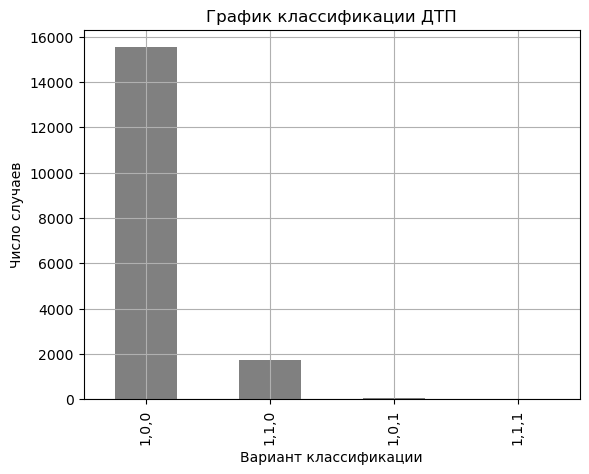

In [91]:
# Построим график.

tags_df_count.plot(kind='bar', grid=True, color = 'grey')
plt.title('График классификации ДТП')
plt.xlabel('Вариант классификации')
plt.ylabel('Число случаев');

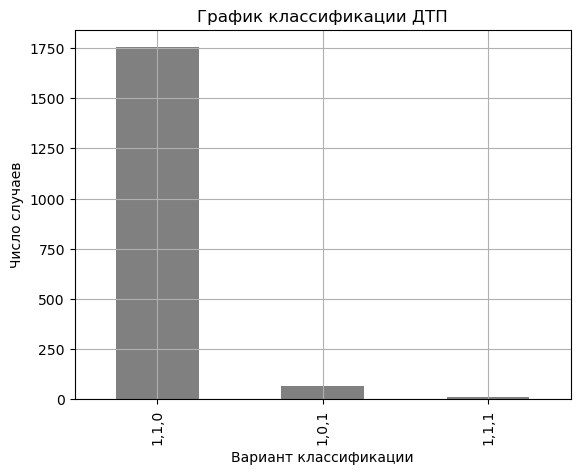

In [92]:
# Построим график.

tags_df_count[1:].plot(kind='bar', grid=True, color = 'grey')
plt.title('График классификации ДТП')
plt.xlabel('Вариант классификации')
plt.ylabel('Число случаев');

In [93]:
# столец 'tags' посмотрим его уникальные значения
df.explode('tags',ignore_index = True)['tags'].unique()

array(['Дорожно-транспортные происшествия',
       'ДТП и пострадавшие дети в возрасте до 16 лет',
       'ДТП и пострадавшие пешеходы, из-за наезда на пешеходов, на пешеходных переходах, по вине пешеходов'],
      dtype=object)

In [94]:
# посмотрим распределение значений столбца 'tags'
df.explode('tags',ignore_index = True)['tags'].value_counts()

tags
Дорожно-транспортные происшествия                                                                     17361
ДТП и пострадавшие дети в возрасте до 16 лет                                                           1765
ДТП и пострадавшие пешеходы, из-за наезда на пешеходов, на пешеходных переходах, по вине пешеходов       79
Name: count, dtype: int64

In [95]:
# напишем функцию по категоризации столбца 'tags'
def categorize_tags(income):
    if income == 'Дорожно-транспортные происшествия':
        return 'dtp'
    elif income == 'ДТП и пострадавшие дети в возрасте до 16 лет':
        return 'children'
    elif income == 'ДТП и пострадавшие пешеходы, из-за наезда на пешеходов, на пешеходных переходах, по вине пешеходов':
        return 'footer'
    else:
        pass

In [96]:
df_tags = df.explode('tags', ignore_index = True)
df_tags

coordinates       id                               tags  \
0          [53.0986, 52.4139]  2872510  Дорожно-транспортные происшествия   
1          [53.1781, 52.4108]  1811577  Дорожно-транспортные происшествия   
2      [53.043537, 52.444344]  2620851  Дорожно-транспортные происшествия   
3      [52.906272, 52.706841]  2646512  Дорожно-транспортные происшествия   
4      [52.976246, 52.474573]  1818264  Дорожно-транспортные происшествия   
...                       ...      ...                                ...   
19200  [53.155411, 52.433653]  1817428  Дорожно-транспортные происшествия   
19201     [53.160117, 52.437]  1818684  Дорожно-транспортные происшествия   
19202   [53.142285, 52.42232]  1817094  Дорожно-транспортные происшествия   
19203  [53.160546, 52.425847]  2521166  Дорожно-транспортные происшествия   
19204      [53.2736, 52.6853]  1819013  Дорожно-транспортные происшествия   

                                             light        lat       long  \
0                              Светлое время суток  52.413900  53.098600   
1      В темное время суток, освещение отсутствует  52.410800  53.178100   
2                              Светлое время суток  52.444344  53.043537   
3                              Светлое время суток  52.706841  52.906272   
4                              Светлое время суток  52.474573  52.976246   
...                                            ...        ...        ...   
19200                          Светлое время суток  52.433653  53.155411   
19201                          Светлое время суток  52.437000  53.160117   
19202                          Светлое время суток  52.422320  53.142285   
19203     В темное время суток, освещение включено  52.425847  53.160546   
19204                          Светлое время суток  52.685300  53.273600   

                                                  nearby       region scheme  \
0                                                     []  Сорочинский    210   
1                                                     []  Сорочинский    610   
2                                                     []  Сорочинский    220   
3                                                     []  Сорочинский   None   
4                                                     []  Сорочинский    010   
...                                                  ...          ...    ...   
19200  [Жилые дома индивидуальной застройки, Крупный ...    Сорочинск    500   
19201              [Жилые дома индивидуальной застройки]    Сорочинск   None   
19202  [Жилые дома индивидуальной застройки, Регулиру...    Сорочинск    070   
19203  [Жилые дома индивидуальной застройки, Нерегули...    Сорочинск    200   
19204              [Жилые дома индивидуальной застройки]    Сорочинск    500   

                                           address  ...             datetime  \
0      М-5 Урал, подъезд к городу Оренбург, 256 км  ...  2023-08-22 12:55:00   
1                              Прочие дороги, 0 км  ...  2017-10-21 18:30:00   
2      М-5 Урал, подъезд к городу Оренбург, 251 км  ...  2021-09-18 13:47:00   
3                                             None  ...  2021-11-02 14:30:00   
4      М-5 Урал, подъезд к городу Оренбург, 245 км  ...  2020-01-04 12:30:00   
...                                            ...  ...                  ...   
19200             г Сорочинск, ул Карла Маркса, 37  ...  2019-06-03 07:40:00   
19201             г Сорочинск, ул Водокачечная, 28  ...  2019-05-08 07:45:00   
19202                   г Сорочинск, ул Зеленая, 7  ...  2018-06-04 11:40:00   
19203            г Сорочинск, ул Чернышевского, 70  ...  2020-12-27 00:30:00   
19204                г Сорочинск, ул Фурманова, 18  ...  2016-04-08 09:10:00   

          severity                                           vehicles  \
0      С погибшими  [{'year': 2019, 'brand': 'ВАЗ', 'color': 'Иные...   
1           Легкий  [{'year': 2003, 'brand': 'ВАЗ', 'color': 'Белы...   
2          Тяжёлый  [{'year': 2009, 'br

In [97]:
df_tags[['tags']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19205 entries, 0 to 19204
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tags    19205 non-null  object
dtypes: object(1)
memory usage: 150.2+ KB


In [98]:
# применим функцию категоризации
df_tags['tags'] = df_tags.tags.transform(categorize_tags)

In [99]:
df_tags.tags.unique()

array(['dtp', 'children', 'footer'], dtype=object)

In [100]:
df_tags[['tags']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19205 entries, 0 to 19204
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tags    19205 non-null  object
dtypes: object(1)
memory usage: 150.2+ KB


In [101]:
df_tags.tags = df_tags.tags+', '
a = df_tags.groupby('id').agg({'tags':'sum'}).reset_index()
a

id             tags
0      1810268  dtp, children, 
1      1810269            dtp, 
2      1810270            dtp, 
3      1810271  dtp, children, 
4      1810272            dtp, 
...        ...              ...
17356  2943649            dtp, 
17357  2943650            dtp, 
17358  2943651            dtp, 
17359  2943652            dtp, 
17360  2943653            dtp, 

[17361 rows x 2 columns]

In [110]:
def tags_cleaner(cell):
    if cell.endswith(', '): # отдельно обработаем момент где в конце остается точка
        cell = cell[:-2]
    return cell

In [111]:
# применяем функцию
a.tags = a.tags.apply(tags_cleaner)

In [112]:
a.tags.value_counts()

tags
dtp                      15529
dtp, children             1753
dtp, footer                 67
dtp, footer, children       12
Name: count, dtype: int64

In [113]:
a.tags.unique()

array(['dtp, children', 'dtp', 'dtp, footer', 'dtp, footer, children'],
      dtype=object)

In [116]:
df1 = pd.concat([pd.DataFrame(a['tags'].values, columns=['a_tags']), df], axis=1)
#data_out = pd.concat([pd.DataFrame(data.explode(col)['id'].values, columns=['id']), data_out], axis=1)

In [117]:
df1[['a_tags']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17361 entries, 0 to 17360
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   a_tags  17361 non-null  object
dtypes: object(1)
memory usage: 135.8+ KB


In [118]:
df1.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17361 entries, 0 to 17360
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   a_tags                  17361 non-null  object 
 1   coordinates             17361 non-null  object 
 2   id                      17361 non-null  int32  
 3   tags                    17361 non-null  object 
 4   light                   17361 non-null  object 
 5   lat                     17349 non-null  float64
 6   long                    17349 non-null  float64
 7   nearby                  17361 non-null  object 
 8   region                  17361 non-null  object 
 9   scheme                  16095 non-null  object 
 10  address                 16690 non-null  object 
 11  weather                 17361 non-null  object 
 12  category                17361 non-null  object 
 13  datetime                17361 non-null  object 
 14  severity                17361 non-null

# столбец light

In [119]:
df.light

0                                Светлое время суток
1        В темное время суток, освещение отсутствует
2                                Светлое время суток
3                                Светлое время суток
4                                Светлое время суток
                            ...                     
17356                            Светлое время суток
17357                            Светлое время суток
17358                            Светлое время суток
17359       В темное время суток, освещение включено
17360                            Светлое время суток
Name: light, Length: 17361, dtype: object

In [120]:
# посмотрим еще раз уникальные значения
df.light.unique()

array(['Светлое время суток',
       'В темное время суток, освещение отсутствует', 'Сумерки',
       'В темное время суток, освещение включено',
       'В темное время суток, освещение не включено'], dtype=object)

по сути можно разбить на 3 категории: светло, темно и плохое освещение (сумерки и осещение в темное время суток). Однако чтобы проверить теорию что в сумерки самое опасное время для водителя - оставлю 4 категории: светло, темно, семерки и искуственное освещение (light,dark, dusk, electro)

In [121]:
# посмотрим объем столбца до преобразований
df[['light']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17361 entries, 0 to 17360
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   light   17361 non-null  object
dtypes: object(1)
memory usage: 135.8+ KB


In [122]:
# напишем функцию категоризации для столбца освещенности 'light'
def categorize_light(income):
    if income == 'Светлое время суток':
        return 'light'
    elif income in  ['В темное время суток, освещение отсутствует', 'В темное время суток, освещение не включено']:
        return 'dark'
    elif income == 'Сумерки':
        return 'dusk'
    elif income == 'В темное время суток, освещение включено':
        return 'electro'
    else:
        pass 
    

In [123]:
# применим функцию категоризации
df['light'] = df.light.transform(categorize_light)

In [124]:
# посмотрим объем столбца до преобразований
df[['light']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17361 entries, 0 to 17360
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   light   17361 non-null  object
dtypes: object(1)
memory usage: 135.8+ KB


In [125]:
# проверим уникальные значения
df.light.unique()

array(['light', 'dark', 'dusk', 'electro'], dtype=object)

In [126]:
# посчитем значения столбца 
df.light.value_counts()

light
light      11235
electro     3209
dark        2501
dusk         416
Name: count, dtype: int64

In [127]:
light_df_count = df.light.value_counts()

In [128]:
light_df_count

light
light      11235
electro     3209
dark        2501
dusk         416
Name: count, dtype: int64

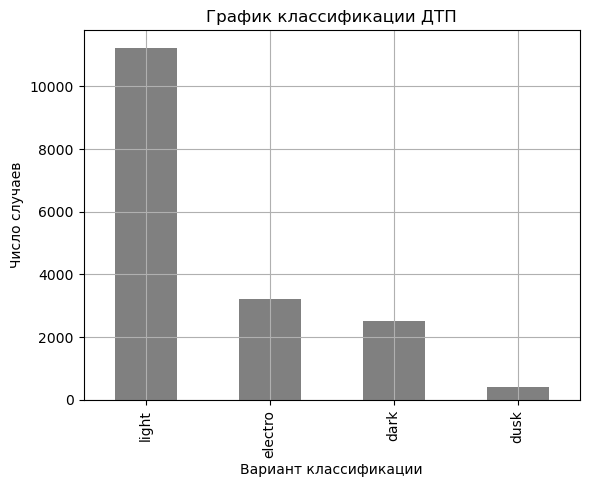

In [129]:
# Построим график.
light_df_count.plot(kind='bar', grid=True, color = 'grey')
plt.title('График классификации ДТП')
plt.xlabel('Вариант классификации')
plt.ylabel('Число случаев');

Львиная доля ДТП совершается в светлое время суток, скорее всего это связано с повышенным авто и пешеходным трафиком днем. Поскольку данных о трафике всего автомобилей мы не обладаем, то сказать в процентном соотношении ДТП больше или меньше днем, утром и ночью - нельзя. Интересно что на неосвещенных улицах аварий меньше чем на освещенных ночью - скорее всего объясняется тем что по темным дорогам меньше ездят.

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17361 entries, 0 to 17360
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   coordinates             17361 non-null  object 
 1   id                      17361 non-null  int32  
 2   tags                    17361 non-null  object 
 3   light                   17361 non-null  object 
 4   lat                     17349 non-null  float64
 5   long                    17349 non-null  float64
 6   nearby                  17361 non-null  object 
 7   region                  17361 non-null  object 
 8   scheme                  16095 non-null  object 
 9   address                 16690 non-null  object 
 10  weather                 17361 non-null  object 
 11  category                17361 non-null  object 
 12  datetime                17361 non-null  object 
 13  severity                17361 non-null  object 
 14  vehicles                17361 non-null

long и lat оставим без изменения чтобы избежать геоотклонений

## столбец nearby

In [131]:
# Этот список будет ключом к индексам полученным из наших данных.

my_list_nearby = list(df.explode('nearby')['nearby'].unique())

my_list_nearby

[nan,
 'Жилые дома индивидуальной застройки',
 'Нерегулируемый перекрёсток неравнозначных улиц (дорог)',
 'Многоквартирные жилые дома',
 'АЗС',
 'Нерегулируемый перекрёсток',
 'Остановка общественного транспорта',
 'Нерегулируемый перекрёсток равнозначных улиц (дорог)',
 'Нерегулируемый пешеходный переход',
 'Иной объект',
 'Одиночный торговый объект, являющийся местом притяжения транспорта и (или) пешеходов',
 'Мост',
 'Выезд с прилегающей территории',
 'Объект торговли, общественного питания на автодороге вне НП',
 'Производственное предприятие',
 'Кладбище',
 'Нерегулируемое пересечение с круговым движением',
 'Подход к мосту, эстакаде, путепроводу',
 'Эстакада, путепровод',
 'Мост, эстакада, путепровод',
 'Регулируемый ж/д переезд без дежурного',
 'Регулируемый ж/д переезд с дежурным',
 'Зоны отдыха',
 'Школа либо иная детская (в т.ч. дошкольная) организация',
 'Регулируемый пешеходный переход',
 'Медицинские (лечебные) организации',
 'Административные здания',
 'Регулируемый перек

000000000

012345678

Можно взять индексы списка перевести в строку.

In [132]:
# Функция по переводу списка.

def return_n(row):
    # Индекс в строк будет соответсвовать номеру в списке.
    # 0 - нет признака, 1 есть признак.
    # Создадим список из 0 в строчном формате.

    number_list_nearby = ['0' for i in range(len(my_list_nearby))]

# Если значение в строке больше нуля то заменяем 0 значения 1 по индексу

    if len(row['nearby']) >0:

        index_list_nearby = [my_list_nearby.index(i) for i in row['nearby']]

        for ind in index_list_nearby:
            number_list_nearby[ind] = '1'

# Возвращаем данные в виде строки, разделенной запятыми.
    return ','.join(number_list_nearby)



In [133]:
# Посчитаем полученные значения.

nearby_df_count = df.apply(return_n, axis=1).value_counts()

In [134]:
nearby_df_count

0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0    4593
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0     903
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0     541
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0     476
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0     317
                                                                                                                       ... 
0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0       1
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0       1
0,0,0,1,

Отбросим пропуски и выведем на график 20 самых частых сочетаний объектов, рядом с которыми произошли ДТП

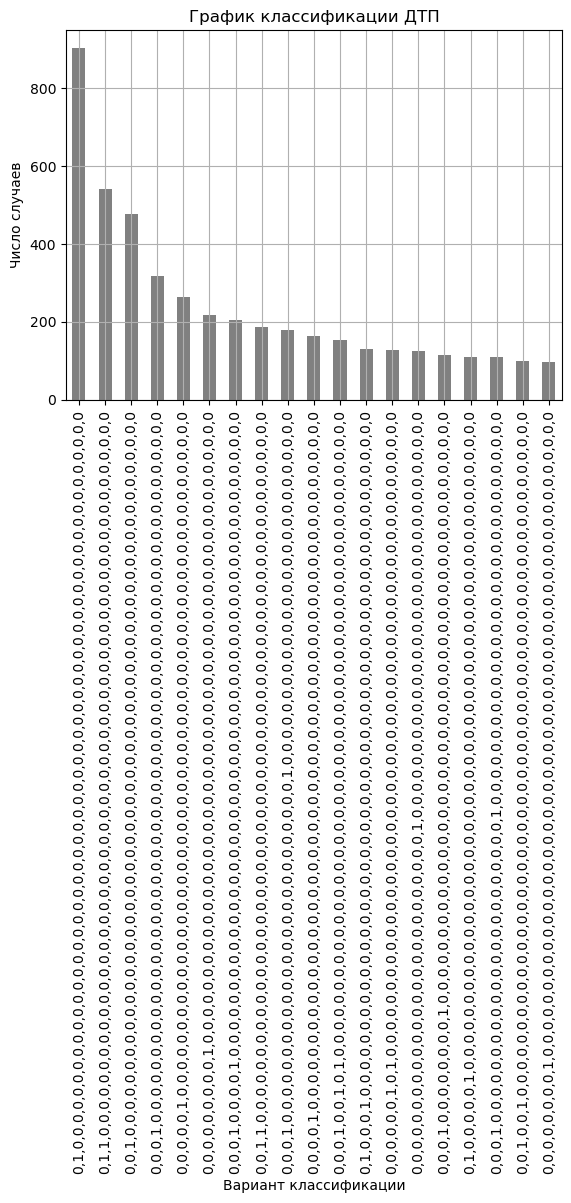

In [135]:
# Построим график.

nearby_df_count.head(20)[1:].plot(kind='bar', grid=True, color = 'grey')
plt.title('График классификации ДТП')
plt.xlabel('Вариант классификации')
plt.ylabel('Число случаев');

In [136]:
df

coordinates       id                                 tags  \
0          [53.0986, 52.4139]  2872510  [Дорожно-транспортные происшествия]   
1          [53.1781, 52.4108]  1811577  [Дорожно-транспортные происшествия]   
2      [53.043537, 52.444344]  2620851  [Дорожно-транспортные происшествия]   
3      [52.906272, 52.706841]  2646512  [Дорожно-транспортные происшествия]   
4      [52.976246, 52.474573]  1818264  [Дорожно-транспортные происшествия]   
...                       ...      ...                                  ...   
17356  [53.155411, 52.433653]  1817428  [Дорожно-транспортные происшествия]   
17357     [53.160117, 52.437]  1818684  [Дорожно-транспортные происшествия]   
17358   [53.142285, 52.42232]  1817094  [Дорожно-транспортные происшествия]   
17359  [53.160546, 52.425847]  2521166  [Дорожно-транспортные происшествия]   
17360      [53.2736, 52.6853]  1819013  [Дорожно-транспортные происшествия]   

         light        lat       long  \
0        light  52.413900  53.098600   
1         dark  52.410800  53.178100   
2        light  52.444344  53.043537   
3        light  52.706841  52.906272   
4        light  52.474573  52.976246   
...        ...        ...        ...   
17356    light  52.433653  53.155411   
17357    light  52.437000  53.160117   
17358    light  52.422320  53.142285   
17359  electro  52.425847  53.160546   
17360    light  52.685300  53.273600   

                                                  nearby       region scheme  \
0                                                     []  Сорочинский    210   
1                                                     []  Сорочинский    610   
2                                                     []  Сорочинский    220   
3                                                     []  Сорочинский   None   
4                                                     []  Сорочинский    010   
...                                                  ...          ...    ...   
17356  [Жилые дома индивидуальной застройки, Крупный ...    Сорочинск    500   
17357              [Жилые дома индивидуальной застройки]    Сорочинск   None   
17358  [Жилые дома индивидуальной застройки, Регулиру...    Сорочинск    070   
17359  [Жилые дома индивидуальной застройки, Нерегули...    Сорочинск    200   
17360              [Жилые дома индивидуальной застройки]    Сорочинск    500   

                                           address  ...             datetime  \
0      М-5 Урал, подъезд к городу Оренбург, 256 км  ...  2023-08-22 12:55:00   
1                              Прочие дороги, 0 км  ...  2017-10-21 18:30:00   
2      М-5 Урал, подъезд к городу Оренбург, 251 км  ...  2021-09-18 13:47:00   
3                                             None  ...  2021-11-02 14:30:00   
4      М-5 Урал, подъезд к городу Оренбург, 245 км  ...  2020-01-04 12:30:00   
...                                            ...  ...                  ...   
17356             г Сорочинск, ул Карла Маркса, 37  ...  2019-06-03 07:40:00   
17357             г Сорочинск, ул Водокачечная, 28  ...  2019-05-08 07:45:00   
17358                   г Сорочинск, ул Зеленая, 7  ...  2018-06-04 11:40:00   
17359            г Сорочинск, ул Чернышевского, 70  ...  2020-12-27 00:30:00   
17360                г Сорочинск, ул Фурманова, 18  ...  2016-04-08 09:10:00   

          severity                                           vehicles  \
0      С погибшими  [{'year': 2019, 'brand': 'ВАЗ', 'color': 'Иные...   
1           Легкий  [{'year': 2003, 'brand': 'ВАЗ', 'color': 'Белы...   
2          Тяжёлый  [{'year': 2009, 'brand': 'SKODA', 'color': 'Бе...   
3           Легкий  [{'year': 2017, 'brand': 'Прочие марки мотоцик...   
4           Легкий  [{'year': 2016, 'brand': 'ВАЗ', 'color': 'Серы...   
...            ...                                                ...   
17356      Тяжёлый  [{'year': 2015, 'brand': 'Datsun', 'color': 'С...   
17357      Тяжёлый  [{'year': 2006, 'brand': 'ВАЗ', 'color': 'Серы...   
17358    

In [137]:
# посмотрим уникальные значения столбца 'nearby'
nearby_df = df.explode('nearby', ignore_index=True).nearby.value_counts().reset_index()

In [138]:
nearby_df

nearby  count
0                          Многоквартирные жилые дома   4697
1                 Жилые дома индивидуальной застройки   3760
2   Нерегулируемый перекрёсток неравнозначных улиц...   3072
3                  Остановка общественного транспорта   2762
4                   Нерегулируемый пешеходный переход   2539
5                             Административные здания   2040
6                            Регулируемый перекресток   1490
7   Крупный торговый объект (являющийся объектом м...   1396
8                          Нерегулируемый перекрёсток   1392
9                                                 АЗС   1045
10                    Регулируемый пешеходный переход    863
11                           Регулируемый перекрёсток    800
12                     Выезд с прилегающей территории    693
13                                        Иной объект    557
14                       Производственное предприятие    418
15  Одиночный торговый объект, являющийся местом п...    377
16                 Медицинские (лечебные) организации    328
17                          Внутридворовая территория    305
18                                               Мост    273
19  Нерегулируемый перекрёсток равнозначных улиц (...    268
20  Школа либо иная детская (в т.ч. дошкольная) ор...    196
21                         Мост, эстакада, путепровод    185
22               Спортивные и развлекательные объекты    172
23                                        Зоны отдыха    171
24    Нерегулируемое пересечение с круговым движением    168
25  Объект торговли, общественного питания на авто...    164
26                                Лечебные учреждения    138
27                               Эстакада, путепровод    128
28                               Объект строительства     99
29         Автостоянка (отделенная от проезжей части)     97
30                   Иная образовательная организация     93
31  Школа либо иное детское (в т.ч. дошкольное) уч...     82
32                       Подземный пешеходный переход     79
33                                  Остановка трамвая     67
34              Подход к мосту, эстакаде, путепроводу     66
35                                           Кладбище     63
36    Объект (здание, сооружение) религиозного культа     57
37                    Иное образовательное учреждение     52
38                       Надземный пешеходный переход     52
39                        Тротуар, пешеходная дорожка     50
40      Автостоянка (не отделённая от проезжей части)     38
41             Регулируемый ж/д переезд без дежурного     35
42                Регулируемый ж/д переезд с дежурным     30
43                        Остановка маршрутного такси     30
44  Аэропорт, ж/д вокзал (ж/д станция), речной или...     27
45                           Автовокзал (автостанция)     25
46                         Нерегулируемый ж/д переезд     19
47  Территориальное подразделение МВД России (либо...     17
48                                    Пешеходная зона      7
49                           Место для перегона скота      5
50  Нерегулируемый пешеходный переход, расположенн...      5
51                            Пункт весового контроля      5
52                                       СП ДПС (КПМ)      5
53  Нерегулируемый пешеходный переход, расположенн...      4
54                       Нерегулируемый перекрёсток        1
55  Ледовая переправа (официально открытая и обору...      1
56  Регулируемый пешеходный переход, расположенный...      1

In [152]:
# посчитаем среднее количество объектов рядом на одно ДТП
round(nearby_df['count'].sum()/df.shape[0],2)

1.81

мы видим, что максимум ДТП совершаются в районе жилых домов - это первые 2 строчки и 8457 ДТП, почти в 3 раза меньше аварий происходит на нерегулируемых перекрестках неравнозначных дорог (3072), 4-ю строчку занимает остановка общественного транспорта (2762 случая) и пятерку "лидеров" замыкает нерегулируемый пешеходный переход.
Как правило рядом с ДТП указывают примерно 2 объекта.

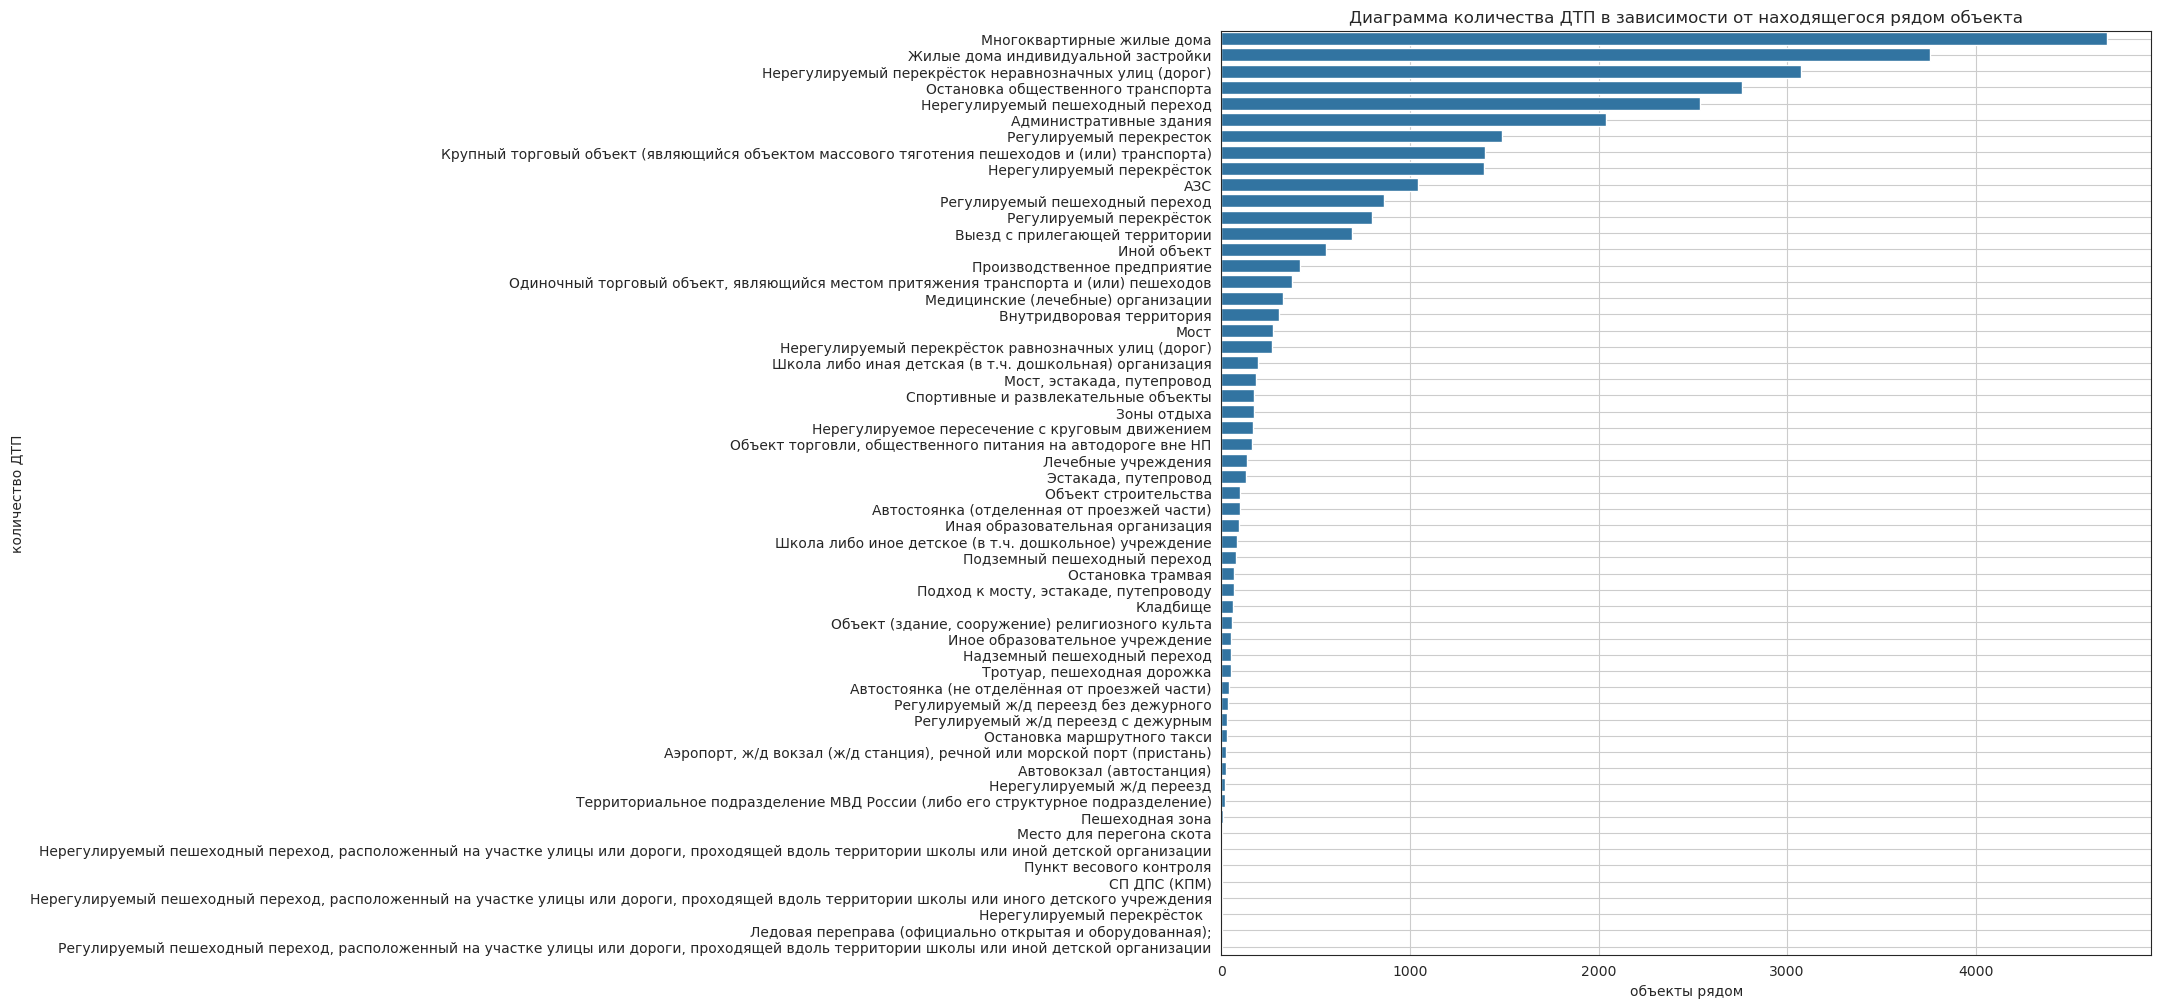

In [153]:
# используем стиль white из библиотеки seaborn
sns.set_style('white')
# назначаем размер графика
plt.figure(figsize=(12,12))
# строим столбчатый график средствами seaborn
sns.barplot(x='count', y='nearby', data=nearby_df)
# формируем заголовок графика и подписи осей средствами matplotlib
plt.title('Диаграмма количества ДТП в зависимости от находящегося рядом объекта')
plt.xlabel('объекты рядом')
plt.ylabel('количество ДТП')
# выбираем положение легенды
#plt.legend(loc='upper left', fontsize=15)
# добавляем сетку
plt.grid()
# отображаем график на экране
plt.show()

In [154]:
# посмотрим уникальные значения столбца 'nearby'
df.explode('nearby', ignore_index=True)


coordinates       id                                 tags  \
0          [53.0986, 52.4139]  2872510  [Дорожно-транспортные происшествия]   
1          [53.1781, 52.4108]  1811577  [Дорожно-транспортные происшествия]   
2      [53.043537, 52.444344]  2620851  [Дорожно-транспортные происшествия]   
3      [52.906272, 52.706841]  2646512  [Дорожно-транспортные происшествия]   
4      [52.976246, 52.474573]  1818264  [Дорожно-транспортные происшествия]   
...                       ...      ...                                  ...   
36097   [53.142285, 52.42232]  1817094  [Дорожно-транспортные происшествия]   
36098   [53.142285, 52.42232]  1817094  [Дорожно-транспортные происшествия]   
36099  [53.160546, 52.425847]  2521166  [Дорожно-транспортные происшествия]   
36100  [53.160546, 52.425847]  2521166  [Дорожно-транспортные происшествия]   
36101      [53.2736, 52.6853]  1819013  [Дорожно-транспортные происшествия]   

         light        lat       long  \
0        light  52.413900  53.098600   
1         dark  52.410800  53.178100   
2        light  52.444344  53.043537   
3        light  52.706841  52.906272   
4        light  52.474573  52.976246   
...        ...        ...        ...   
36097    light  52.422320  53.142285   
36098    light  52.422320  53.142285   
36099  electro  52.425847  53.160546   
36100  electro  52.425847  53.160546   
36101    light  52.685300  53.273600   

                                                  nearby       region scheme  \
0                                                    NaN  Сорочинский    210   
1                                                    NaN  Сорочинский    610   
2                                                    NaN  Сорочинский    220   
3                                                    NaN  Сорочинский   None   
4                                                    NaN  Сорочинский    010   
...                                                  ...          ...    ...   
36097  Одиночный торговый объект, являющийся местом п...    Сорочинск    070   
36098                    Регулируемый пешеходный переход    Сорочинск    070   
36099                Жилые дома индивидуальной застройки    Сорочинск    200   
36100  Нерегулируемый перекрёсток неравнозначных улиц...    Сорочинск    200   
36101                Жилые дома индивидуальной застройки    Сорочинск    500   

                                           address  ...             datetime  \
0      М-5 Урал, подъезд к городу Оренбург, 256 км  ...  2023-08-22 12:55:00   
1                              Прочие дороги, 0 км  ...  2017-10-21 18:30:00   
2      М-5 Урал, подъезд к городу Оренбург, 251 км  ...  2021-09-18 13:47:00   
3                                             None  ...  2021-11-02 14:30:00   
4      М-5 Урал, подъезд к городу Оренбург, 245 км  ...  2020-01-04 12:30:00   
...                                            ...  ...                  ...   
36097                   г Сорочинск, ул Зеленая, 7  ...  2018-06-04 11:40:00   
36098                   г Сорочинск, ул Зеленая, 7  ...  2018-06-04 11:40:00   
36099            г Сорочинск, ул Чернышевского, 70  ...  2020-12-27 00:30:00   
36100            г Сорочинск, ул Чернышевского, 70  ...  2020-12-27 00:30:00   
36101                г Сорочинск, ул Фурманова, 18  ...  2016-04-08 09:10:00   

          severity                                           vehicles  \
0      С погибшими  [{'year': 2019, 'brand': 'ВАЗ', 'color': 'Иные...   
1           Легкий  [{'year': 2003, 'brand': 'ВАЗ', 'color': 'Белы...   
2          Тяжёлый  [{'year': 2009, 'brand': 'SKODA', 'color': 'Бе...   
3           Легкий  [{'year': 2017, 'brand': 'Прочие марки мотоцик...   
4           Легкий  [{'year': 2016, 'brand': 'ВАЗ', 'color': 'Серы...   
...            ...                                                ...   
36097      Тяжёлый  [{'year': 1985, 'brand': 'ГАЗ', 'color': 'Иные...   
36098      Тяжёлый  [{'year': 1985, 'brand': 'ГАЗ', 'color': 'Иные...   
36099  С 

In [156]:
df2 = df.explode('nearby').reset_index(drop=True)
df2[~df2.nearby.isna()][['id','nearby']]#, 'nearby_cat']]

id                                             nearby
7      2680592                Жилые дома индивидуальной застройки
8      2680593  Нерегулируемый перекрёсток неравнозначных улиц...
11     1811867                         Многоквартирные жилые дома
12     1811867                                                АЗС
13     2560071  Нерегулируемый перекрёсток неравнозначных улиц...
...        ...                                                ...
36097  1817094  Одиночный торговый объект, являющийся местом п...
36098  1817094                    Регулируемый пешеходный переход
36099  2521166                Жилые дома индивидуальной застройки
36100  2521166  Нерегулируемый перекрёсток неравнозначных улиц...
36101  1819013                Жилые дома индивидуальной застройки

[31509 rows x 2 columns]

In [157]:
#a = df.explode('nearby', ignore_index=True)
#a.info()

In [159]:
nearby_list = list(df2.nearby.unique())
nearby_list

[nan,
 'Жилые дома индивидуальной застройки',
 'Нерегулируемый перекрёсток неравнозначных улиц (дорог)',
 'Многоквартирные жилые дома',
 'АЗС',
 'Нерегулируемый перекрёсток',
 'Остановка общественного транспорта',
 'Нерегулируемый перекрёсток равнозначных улиц (дорог)',
 'Нерегулируемый пешеходный переход',
 'Иной объект',
 'Одиночный торговый объект, являющийся местом притяжения транспорта и (или) пешеходов',
 'Мост',
 'Выезд с прилегающей территории',
 'Объект торговли, общественного питания на автодороге вне НП',
 'Производственное предприятие',
 'Кладбище',
 'Нерегулируемое пересечение с круговым движением',
 'Подход к мосту, эстакаде, путепроводу',
 'Эстакада, путепровод',
 'Мост, эстакада, путепровод',
 'Регулируемый ж/д переезд без дежурного',
 'Регулируемый ж/д переезд с дежурным',
 'Зоны отдыха',
 'Школа либо иная детская (в т.ч. дошкольная) организация',
 'Регулируемый пешеходный переход',
 'Медицинские (лечебные) организации',
 'Административные здания',
 'Регулируемый перек

In [160]:
df2[df2.nearby.isna()]

coordinates       id                                 tags  \
0          [53.0986, 52.4139]  2872510  [Дорожно-транспортные происшествия]   
1          [53.1781, 52.4108]  1811577  [Дорожно-транспортные происшествия]   
2      [53.043537, 52.444344]  2620851  [Дорожно-транспортные происшествия]   
3      [52.906272, 52.706841]  2646512  [Дорожно-транспортные происшествия]   
4      [52.976246, 52.474573]  1818264  [Дорожно-транспортные происшествия]   
...                       ...      ...                                  ...   
35896  [53.172778, 52.408889]  1813812  [Дорожно-транспортные происшествия]   
35939  [53.150556, 52.415833]  1813808  [Дорожно-транспортные происшествия]   
35992  [53.147778, 52.748056]  1818463  [Дорожно-транспортные происшествия]   
36011      [53.1967, 52.4022]  1819874  [Дорожно-транспортные происшествия]   
36068  [53.151944, 52.414167]  1815407  [Дорожно-транспортные происшествия]   

         light        lat       long nearby       region scheme  \
0        light  52.413900  53.098600    NaN  Сорочинский    210   
1         dark  52.410800  53.178100    NaN  Сорочинский    610   
2        light  52.444344  53.043537    NaN  Сорочинский    220   
3        light  52.706841  52.906272    NaN  Сорочинский   None   
4        light  52.474573  52.976246    NaN  Сорочинский    010   
...        ...        ...        ...    ...          ...    ...   
35896  electro  52.408889  53.172778    NaN    Сорочинск    830   
35939    light  52.415833  53.150556    NaN    Сорочинск    200   
35992    light  52.748056  53.147778    NaN    Сорочинск    800   
36011    light  52.402200  53.196700    NaN    Сорочинск    610   
36068     dark  52.414167  53.151944    NaN    Сорочинск    200   

                                           address  ...             datetime  \
0      М-5 Урал, подъезд к городу Оренбург, 256 км  ...  2023-08-22 12:55:00   
1                              Прочие дороги, 0 км  ...  2017-10-21 18:30:00   
2      М-5 Урал, подъезд к городу Оренбург, 251 км  ...  2021-09-18 13:47:00   
3                                             None  ...  2021-11-02 14:30:00   
4      М-5 Урал, подъезд к городу Оренбург, 245 км  ...  2020-01-04 12:30:00   
...                                            ...  ...                  ...   
35896               г Сорочинск, ул Молодежная, 25  ...  2015-07-18 22:30:00   
35939                   г Сорочинск, ул Зеленая, 3  ...  2015-07-28 12:00:00   
35992             г Сорочинск, ул Московская, 207А  ...  2015-05-31 15:35:00   
36011           г Сорочинск, ул Чернышевского, 258  ...  2015-08-16 13:05:00   
36068                   г Сорочинск, ул Зеленая, 1  ...  2015-01-14 19:45:00   

          severity                                           vehicles  \
0      С погибшими  [{'year': 2019, 'brand': 'ВАЗ', 'color': 'Иные...   
1           Легкий  [{'year': 2003, 'brand': 'ВАЗ', 'color': 'Белы...   
2          Тяжёлый  [{'year': 2009, 'brand': 'SKODA', 'color': 'Бе...   
3           Легкий  [{'year': 2017, 'brand': 'Прочие марки мотоцик...   
4           Легкий  [{'year': 2016, 'brand': 'ВАЗ', 'color': 'Серы...   
...            ...                                                ...   
35896      Тяжёлый  [{'year': 1999, 'brand': 'ВАЗ', 'color': 'Зеле...   
35939      Тяжёлый  [{'year': 2010, 'brand': 'AUDI', 'color': 'Бел...   
35992      Тяжёлый  [{'year': 2009, 'brand': 'ВАЗ', 'color': 'Иные...   
36011      Тяжёлый  [{'year': 1997, 'brand': 'ВАЗ', 'color': 'Иные...   
36068       Легкий  [{'year': 2010, 'brand': 'RENAULT', 'color': '...   

      dead_count                                       participants  \
0              1                                                 []   
1              0                                                 []   
2              0                                                 []   
3              0                                                 []   
4              0                                                 []   


In [161]:
b = df[~df.nearby.isna()].groupby('id').agg({'id':'count'})

In [162]:
b.id.unique()

array([1])

In [163]:
c = b[b.id==2].index.to_list()
len(c)

0

In [164]:
c

[]

In [165]:
df2[df2.id.isin(c)]

Empty DataFrame
Columns: [coordinates, id, tags, light, lat, long, nearby, region, scheme, address, weather, category, datetime, severity, vehicles, dead_count, participants, injured_count, parent_region, road_conditions, participants_count, participant_categories]
Index: []

[0 rows x 22 columns]

In [166]:
df2[(~df2.nearby.isna())]

coordinates       id  \
7      [53.035319, 52.573468]  2680592   
8      [53.311458, 52.323668]  2680593   
11     [53.161021, 52.402162]  1811867   
12     [53.161021, 52.402162]  1811867   
13     [53.120914, 52.401228]  2560071   
...                       ...      ...   
36097   [53.142285, 52.42232]  1817094   
36098   [53.142285, 52.42232]  1817094   
36099  [53.160546, 52.425847]  2521166   
36100  [53.160546, 52.425847]  2521166   
36101      [53.2736, 52.6853]  1819013   

                                                    tags    light        lat  \
7      [Дорожно-транспортные происшествия, ДТП и пост...    light  52.573468   
8                    [Дорожно-транспортные происшествия]    light  52.323668   
11                   [Дорожно-транспортные происшествия]    light  52.402162   
12                   [Дорожно-транспортные происшествия]    light  52.402162   
13                   [Дорожно-транспортные происшествия]    light  52.401228   
...                                                  ...      ...        ...   
36097                [Дорожно-транспортные происшествия]    light  52.422320   
36098                [Дорожно-транспортные происшествия]    light  52.422320   
36099                [Дорожно-транспортные происшествия]  electro  52.425847   
36100                [Дорожно-транспортные происшествия]  electro  52.425847   
36101                [Дорожно-транспортные происшествия]    light  52.685300   

            long                                             nearby  \
7      53.035319                Жилые дома индивидуальной застройки   
8      53.311458  Нерегулируемый перекрёсток неравнозначных улиц...   
11     53.161021                         Многоквартирные жилые дома   
12     53.161021                                                АЗС   
13     53.120914  Нерегулируемый перекрёсток неравнозначных улиц...   
...          ...                                                ...   
36097  53.142285  Одиночный торговый объект, являющийся местом п...   
36098  53.142285                    Регулируемый пешеходный переход   
36099  53.160546                Жилые дома индивидуальной застройки   
36100  53.160546  Нерегулируемый перекрёсток неравнозначных улиц...   
36101  53.273600                Жилые дома индивидуальной застройки   

            region scheme                                            address  \
7      Сорочинский    820                       с Янтарное, ул Ленинская, 35   
8      Сорочинский    050        М-5 Урал, подъезд к городу Оренбург, 274 км   
11     Сорочинский    050  Подъезд к г. Сорочинску от а/д Подъезд к г. Ор...   
12     Сорочинский    050  Подъезд к г. Сорочинску от а/д Подъезд к г. Ор...   
13     Сорочинский    500        М-5 Урал, подъезд к городу Оренбург, 258 км   
...            ...    ...                                                ...   
36097    Сорочинск    070                         г Сорочинск, ул Зеленая, 7   
36098    Сорочинск    070                         г Сорочинск, ул Зеленая, 7   
36099    Сорочинск    200                  г Сорочинск, ул Чернышевского, 70   
36100    Сорочинск    200                  г Сорочинск, ул Чернышевского, 70   
36101    Сорочинск    500                      г Сорочинск, ул Фурманова, 18   

       ...             datetime     severity  \
7      ...  2022-06-03 17:00:00      Тяжёлый   
8      ...  2022-06-27 08:20:00      Тяжёлый   
11     ...  2017-09-06 10:45:00      Тяжёлый   
12     ...  2017-09-06 10:45:00      Тяжёлый   
13     ...  2021-04-30 08:15:00  С погибшими   
...    ...                  ...          ...   
36097  ...  2018-06-04 11:40:00      Тяжёлый   
36098  ...  2018-06-04 11:40:00      Тяжёлый   
36099  ...  2020-12-27 00:30:00  С погибшими   
36100  ...  2020-12-27 00:30:00  С погибшими   
36101  ...  2016-04-08 09:10:00      Тяжёлый   

                                                vehicles dead_count  \
7      [{'year': 2020, 'brand': 'AC', 'color': 'Черны...          0   
8      [{'year': 20

In [167]:
df2.nearby.fillna('unknown', inplace=True)

In [168]:
df2.isna().sum()

coordinates                  0
id                           0
tags                         0
light                        0
lat                         16
long                        16
nearby                       0
region                       0
scheme                    2545
address                   1134
weather                      0
category                     0
datetime                     0
severity                     0
vehicles                     0
dead_count                   0
participants                 0
injured_count                0
parent_region                0
road_conditions              0
participants_count           0
participant_categories       0
dtype: int64

In [169]:
df2.nearby.unique()

array(['unknown', 'Жилые дома индивидуальной застройки',
       'Нерегулируемый перекрёсток неравнозначных улиц (дорог)',
       'Многоквартирные жилые дома', 'АЗС', 'Нерегулируемый перекрёсток',
       'Остановка общественного транспорта',
       'Нерегулируемый перекрёсток равнозначных улиц (дорог)',
       'Нерегулируемый пешеходный переход', 'Иной объект',
       'Одиночный торговый объект, являющийся местом притяжения транспорта и (или) пешеходов',
       'Мост', 'Выезд с прилегающей территории',
       'Объект торговли, общественного питания на автодороге вне НП',
       'Производственное предприятие', 'Кладбище',
       'Нерегулируемое пересечение с круговым движением',
       'Подход к мосту, эстакаде, путепроводу', 'Эстакада, путепровод',
       'Мост, эстакада, путепровод',
       'Регулируемый ж/д переезд без дежурного',
       'Регулируемый ж/д переезд с дежурным', 'Зоны отдыха',
       'Школа либо иная детская (в т.ч. дошкольная) организация',
       'Регулируемый пешеходн

In [171]:
# Функция для определения статуса алкогольного воздействия
def categorize_nearby(row): 
    if 'нерегулируем' in str(row).lower():
        return 'unreg'  # нерегулируемый перекресток
    elif 'мост' in str(row).lower() or 'переправ' in str(row).lower():
        return 'road_constr'  # дорожные сооружения
    elif 'регулируем' in str(row).lower():
        return 'regular'  # регулируемые перекрестки
    elif 'школ' in str(row).lower() or 'образов' in str(row).lower() or 'детск' in str(row).lower():
        return 'children'  # образовательные учредения
    elif 'индивидуа' in str(row).lower() or 'территория' in str(row).lower() or 'пешеходн' in str(row).lower():
        return 'inside'  #  # жилые застройки
    elif 'азс' in str(row).lower() or 'автостоянк' in str(row).lower() or 'кладби' in str(row).lower() or 'пункт' in str(row).lower() or 'скот' in str(row).lower() or 'иной' in str(row).lower() or 'строитель' in str(row).lower():
        return 'low_people' # места с малым количеством людей
    elif 'дпс' in str(row).lower() or 'мвд' in str(row).lower():
        return 'police'  # силовые структуры
    elif 'многоквартир' in str(row).lower():
        return 'apartments'
    elif 'unknown' in str(row).lower() or row==[]:
        return 'unknown'  # неизвестно
    else:
        return 'public'  # публичные места

# Создание новых столбцов
df2['nearby_cat'] = df2['nearby'].apply(categorize_nearby)

# Заполнение пропущенных значений в новых столбцах, если необходимо
#df['alcohol_status'] = df['alcohol_status'].fillna(value=np.nan)


In [172]:
b1 = df2[['id', 'nearby_cat']].drop_duplicates()
b1.nearby_cat = b1.nearby_cat+', '


In [173]:
b1.nearby_cat.unique()

array(['unknown, ', 'inside, ', 'unreg, ', 'apartments, ', 'low_people, ',
       'public, ', 'road_constr, ', 'regular, ', 'children, ', 'police, '],
      dtype=object)

In [174]:
# 
c = b1.groupby('id').agg({'nearby_cat':'sum'}).reset_index()
c.nearby_cat = c.nearby_cat
d = c.nearby_cat.sort_values().value_counts().reset_index()[1:]
d

nearby_cat  count
1                                           unreg,    1085
2                                   inside, unreg,     985
3                                          inside,     930
4                       apartments, public, unreg,     766
5                                   public, unreg,     618
..                                              ...    ...
329         public, low_people, regular, children,       1
330               apartments, public, road_constr,       1
331  apartments, inside, unreg, regular, children,       1
332            apartments, public, regular, unreg,       1
333                            unreg, road_constr,       1

[333 rows x 2 columns]

In [175]:

c

id                   nearby_cat
0      1810268                     inside, 
1      1810269                    unknown, 
2      1810270                    unknown, 
3      1810271          apartments, unreg, 
4      1810272                    unknown, 
...        ...                          ...
17356  2943649                      unreg, 
17357  2943650  low_people, public, unreg, 
17358  2943651                    regular, 
17359  2943652    public, unreg, children, 
17360  2943653            regular, public, 

[17361 rows x 2 columns]

In [414]:
df = df.merge(c, on='id', how='left')
#d2.merge(d1, on='id', how='left')
df.nearby_cat.value_counts()#.unique()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17361 entries, 0 to 17360
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   coordinates             17361 non-null  object 
 1   id                      17361 non-null  int32  
 2   tags                    17361 non-null  object 
 3   light                   17361 non-null  object 
 4   lat                     17349 non-null  float64
 5   long                    17349 non-null  float64
 6   nearby                  17361 non-null  object 
 7   region                  17361 non-null  object 
 8   scheme                  16095 non-null  object 
 9   address                 16690 non-null  object 
 10  weather                 17361 non-null  object 
 11  category                17361 non-null  object 
 12  datetime                17361 non-null  object 
 13  severity                17361 non-null  object 
 14  vehicles                17361 non-null

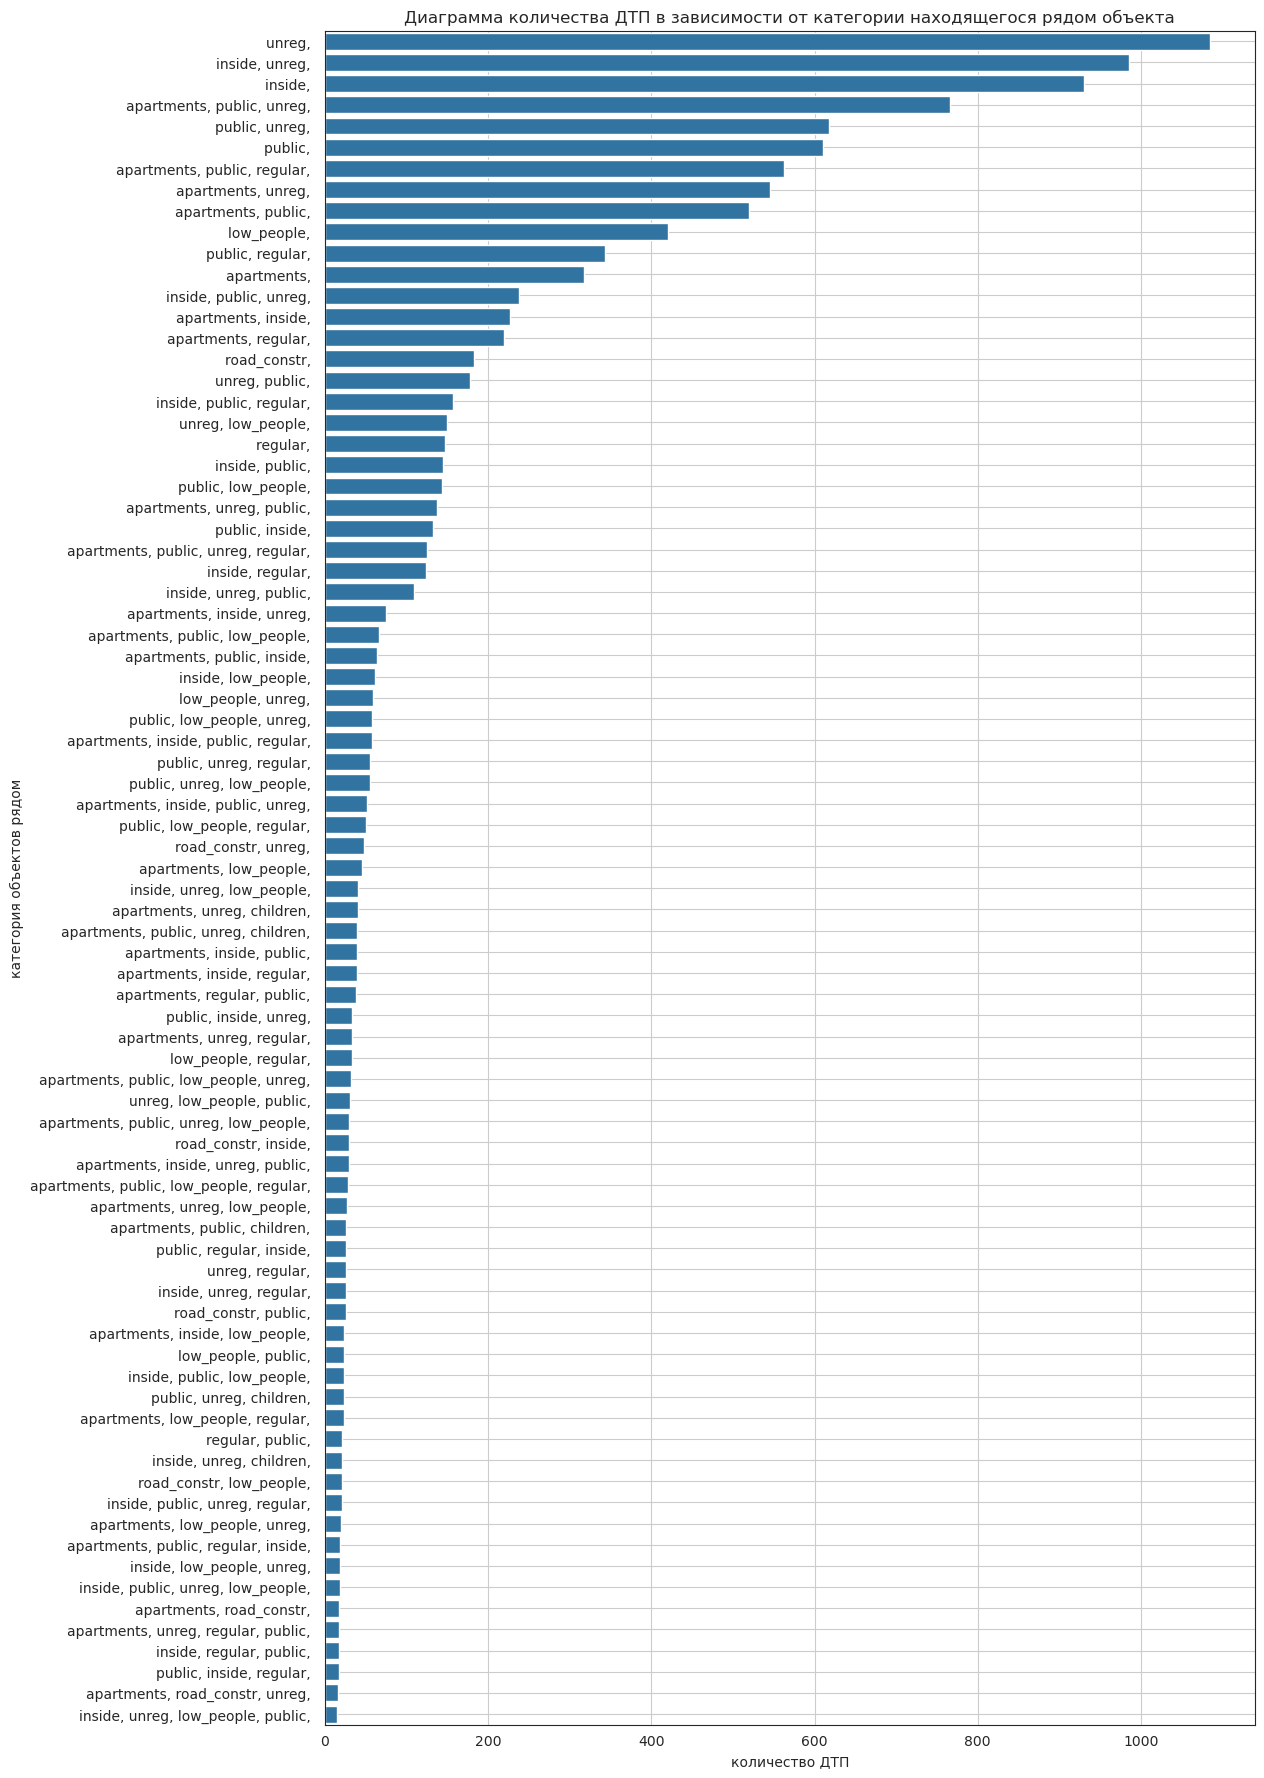

In [416]:
# используем стиль white из библиотеки seaborn
sns.set_style('white')
# назначаем размер графика
plt.figure(figsize=(12,22))
# строим столбчатый график средствами seaborn
sns.barplot(x='count', y='nearby_cat', data=d.head(80))
# формируем заголовок графика и подписи осей средствами matplotlib
plt.title('Диаграмма количества ДТП в зависимости от категории находящегося рядом объекта')
plt.ylabel('категория объектов рядом')
plt.xlabel('количество ДТП')
# выбираем положение легенды
#plt.legend(loc='upper left', fontsize=15)
# добавляем сетку
plt.grid()
# отображаем график на экране
plt.show()

In [417]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17361 entries, 0 to 17360
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   coordinates             17361 non-null  object 
 1   id                      17361 non-null  int32  
 2   tags                    17361 non-null  object 
 3   light                   17361 non-null  object 
 4   lat                     17349 non-null  float64
 5   long                    17349 non-null  float64
 6   nearby                  17361 non-null  object 
 7   region                  17361 non-null  object 
 8   scheme                  16095 non-null  object 
 9   address                 16690 non-null  object 
 10  weather                 17361 non-null  object 
 11  category                17361 non-null  object 
 12  datetime                17361 non-null  object 
 13  severity                17361 non-null  object 
 14  vehicles                17361 non-null

In [419]:
#print(df.nearby_cat.unique())
print(df.nearby_cat.count())
print(df.nearby_cat.value_counts())

17361
nearby_cat
unknown,                                              4593
unreg,                                                1085
inside, unreg,                                         985
inside,                                                930
apartments, public, unreg,                             766
                                                      ... 
apartments, road_constr, inside, public, regular,        1
apartments, public, children, unreg,                     1
road_constr, inside, regular, children,                  1
apartments, public, road_constr, unreg,                  1
inside, children, public, regular,                       1
Name: count, Length: 334, dtype: int64


In [424]:
a.nearby_cat.value_counts()

nearby_cat
public         8993
unreg          7468
apartments     4697
unknown        4593
inside         4253
regular        3219
low_people     1909
road_constr     525
children        423
police           22
Name: count, dtype: int64

In [425]:
df.nearby_cat.value_counts()

nearby_cat
unknown,                                              4593
unreg,                                                1085
inside, unreg,                                         985
inside,                                                930
apartments, public, unreg,                             766
                                                      ... 
apartments, road_constr, inside, public, regular,        1
apartments, public, children, unreg,                     1
road_constr, inside, regular, children,                  1
apartments, public, road_constr, unreg,                  1
inside, children, public, regular,                       1
Name: count, Length: 334, dtype: int64

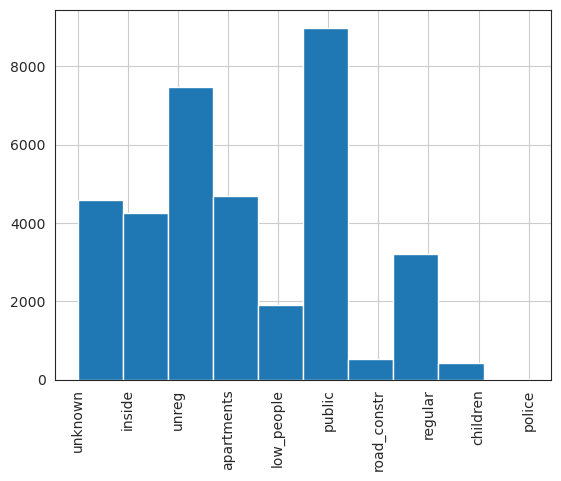

In [426]:
a.nearby_cat.hist()
plt.xticks(rotation=90)
plt.show()

In [427]:
df[['nearby','nearby_cat']]

nearby  \
0                                                     []   
1                                                     []   
2                                                     []   
3                                                     []   
4                                                     []   
...                                                  ...   
17356  [Жилые дома индивидуальной застройки, Крупный ...   
17357              [Жилые дома индивидуальной застройки]   
17358  [Жилые дома индивидуальной застройки, Регулиру...   
17359  [Жилые дома индивидуальной застройки, Нерегули...   
17360              [Жилые дома индивидуальной застройки]   

                      nearby_cat  
0                      unknown,   
1                      unknown,   
2                      unknown,   
3                      unknown,   
4                      unknown,   
...                          ...  
17356  inside, public, regular,   
17357                   inside,   
17358  inside, regular, public,   
17359            inside, unreg,   
17360                   inside,   

[17361 rows x 2 columns]

In [429]:
a[['nearby','nearby_cat']]

nearby nearby_cat
0                                                unknown    unknown
1                                                unknown    unknown
2                                                unknown    unknown
3                                                unknown    unknown
4                                                unknown    unknown
...                                                  ...        ...
36097  Одиночный торговый объект, являющийся местом п...     public
36098                    Регулируемый пешеходный переход    regular
36099                Жилые дома индивидуальной застройки     inside
36100  Нерегулируемый перекрёсток неравнозначных улиц...      unreg
36101                Жилые дома индивидуальной застройки     inside

[36102 rows x 2 columns]

In [430]:
a[['nearby']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36102 entries, 0 to 36101
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   nearby  36102 non-null  object
dtypes: object(1)
memory usage: 282.2+ KB


In [431]:
a[['nearby','nearby_cat']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36102 entries, 0 to 36101
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   nearby      36102 non-null  object
 1   nearby_cat  36102 non-null  object
dtypes: object(2)
memory usage: 564.2+ KB


## столбец address

In [555]:
df.address.fillna('unknown', inplace=True)

In [556]:
df['address_cat'] = [cell.split(',')[0] for cell in df.address]#df.address.str.split(',')[0]#.unique()
#df.columns = [col.split('.')[-1] for col in df.columns]

In [558]:
df.address_cat.unique()

array(['М-5 Урал', 'Прочие дороги', 'unknown', 'с Янтарное',
       'Подъезд к г. Сорочинску от а/д Подъезд к г. Оренбургу от М-5 Урал (Самара - Оренбург)',
       'М-5 Подъезд к городу Оренбург от а/д М-5',
       'Ивановка - Сорочинск - Ташла', 'с Пронькино',
       'Бурдыгино - Надежденка с Подъездом к пос. Кленовый',
       'подъезд к с. Федоровка от а/д Сорочинск - Романовка',
       'Сорочинск - Романовка', 'Гамалеевка - Трудиловка',
       'Сорочинск - Пронькино',
       'подъезд к с. Березовка от а/д Сорочинск - Пронькино',
       'с Троицкое', 'с Березовка', 'станция Гамалеевка - Матвеевка',
       'Сорочинск - Первокрасное', 'с Первокрасное', 'с Бурдыгино',
       'подъезд к с. Михайловка Первая от а/д Сорочинск - Романовка',
       'Гамалеевка - Рощино', 'с Уран',
       'подъезд к с. Спасское от а/д Ивановка - Сорочинск - Ташла',
       'подъезд к пос. Новый от а/д Ивановка - Сорочинск - Ташла',
       'с Матвеевка', 'п Родинский', 'п Новый', 'с Гамалеевка',
       'п Октяб

In [559]:
# Функция для определения статуса алкогольного воздействия
def categorize_address(row): 
    if 'подъезд' in str(row).lower():
        return 'suburb'  # пригород
    elif 'м-' in str(row).lower() or 'р-' in str(row).lower() or 'а-' in str(row).lower():
        return 'highway'  # высокоскоростные магистрали
    elif 'д ' in str(row).lower() or 'п ' in str(row).lower()or 'ст ' in str(row).lower() or 'с ' in str(row).lower() or 'х ' in str(row).lower():
        return 'village'  # сельская местность
    elif 'г ' in str(row).lower() or 'мкр' in str(row).lower() :
        return 'urb'  #  город
    elif ' - ' in str(row).lower() or 'дороги' in str(row).lower():
        return 'road' # дороги между населенными пунктами
    else:
        return 'unknown' # не указано

# Создание новых столбцов
df['address_cat1'] = df['address_cat'].apply(categorize_address)



In [560]:
df[df.address_cat=='мкр 12-й']#.unique()

coordinates       id                                 tags  \
16435  [52.271667, 52.801944]  1821901  [Дорожно-транспортные происшествия]   

         light        lat       long                                 nearby  \
16435  electro  52.801944  52.271667  [Жилые дома индивидуальной застройки]   

        region scheme                       address  ... dead_count  \
16435  Бузулук    860  мкр 12-й, ул Тихая (12-й), 1  ...          0   

                                            participants injured_count  \
16435  [{'role': 'Пешеход', 'gender': 'Женский', 'vio...             1   

              parent_region road_conditions  participants_count  \
16435  Оренбургская область   [Заснеженное]                   2   

          participant_categories  nearby_cat address_cat address_cat1  
16435  [Пешеходы, Все участники]    inside,     мкр 12-й          urb  

[1 rows x 25 columns]

In [561]:
df.address_cat1.unique()

array(['highway', 'road', 'unknown', 'village', 'suburb', 'urb'],
      dtype=object)

In [562]:
df[df.address_cat1.isna()]#['address_cat'].unique()

Empty DataFrame
Columns: [coordinates, id, tags, light, lat, long, nearby, region, scheme, address, weather, category, datetime, severity, vehicles, dead_count, participants, injured_count, parent_region, road_conditions, participants_count, participant_categories, nearby_cat, address_cat, address_cat1]
Index: []

[0 rows x 25 columns]

In [563]:
df_address_cat = df.address_cat1.value_counts().reset_index()
df_address_cat

address_cat1  count
0          urb  10069
1         road   2450
2      highway   1809
3      village   1566
4       suburb    796
5      unknown    671

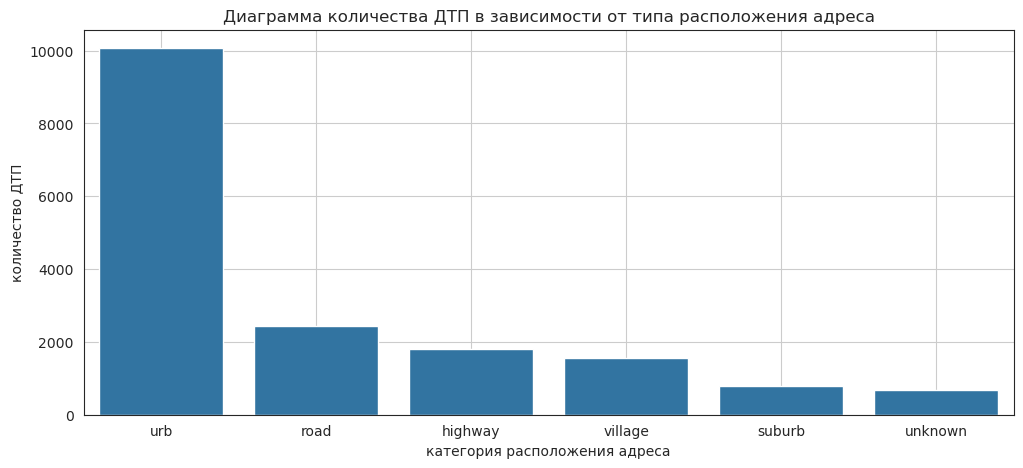

In [564]:
# используем стиль white из библиотеки seaborn
sns.set_style('white')
# назначаем размер графика
plt.figure(figsize=(12,5))
# строим столбчатый график средствами seaborn
sns.barplot(x='address_cat1', y='count', data=df_address_cat)
# формируем заголовок графика и подписи осей средствами matplotlib
plt.title('Диаграмма количества ДТП в зависимости от типа расположения адреса')
plt.xlabel('категория расположения адреса')
plt.ylabel('количество ДТП')
# выбираем положение легенды
#plt.legend(loc='upper left', fontsize=15)
# добавляем сетку
plt.grid()
# отображаем график на экране
plt.show()



In [565]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17361 entries, 0 to 17360
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   coordinates             17361 non-null  object 
 1   id                      17361 non-null  int32  
 2   tags                    17361 non-null  object 
 3   light                   17361 non-null  object 
 4   lat                     17349 non-null  float64
 5   long                    17349 non-null  float64
 6   nearby                  17361 non-null  object 
 7   region                  17361 non-null  object 
 8   scheme                  16095 non-null  object 
 9   address                 17361 non-null  object 
 10  weather                 17361 non-null  object 
 11  category                17361 non-null  object 
 12  datetime                17361 non-null  object 
 13  severity                17361 non-null  object 
 14  vehicles                17361 non-null

In [566]:
df.category.unique()

array(['Столкновение', 'Опрокидывание', 'Съезд с дороги',
       'Наезд на велосипедиста', 'Наезд на пешехода',
       'Наезд на стоящее ТС', 'Падение пассажира', 'Наезд на препятствие',
       'Наезд на животное',
       'Наезд на лицо, не являющееся участником дорожного движения, осуществляющее какую-либо другую деятельность',
       'Иной вид ДТП', 'Падение груза', 'Отбрасывание предмета',
       'Возгорание вследствие технической неисправности движущегося или остановившегося ТС, участвующего в дорожном движении.',
       'Наезд на лицо, не являющееся участником дорожного движения, осуществляющее производство работ',
       'Наезд на гужевой транспорт',
       'Наезд на внезапно возникшее препятствие',
       'Наезд на лицо, не являющееся участником дорожного движения, осуществляющее несение службы'],
      dtype=object)

In [577]:
df_category = df.category.value_counts().reset_index()

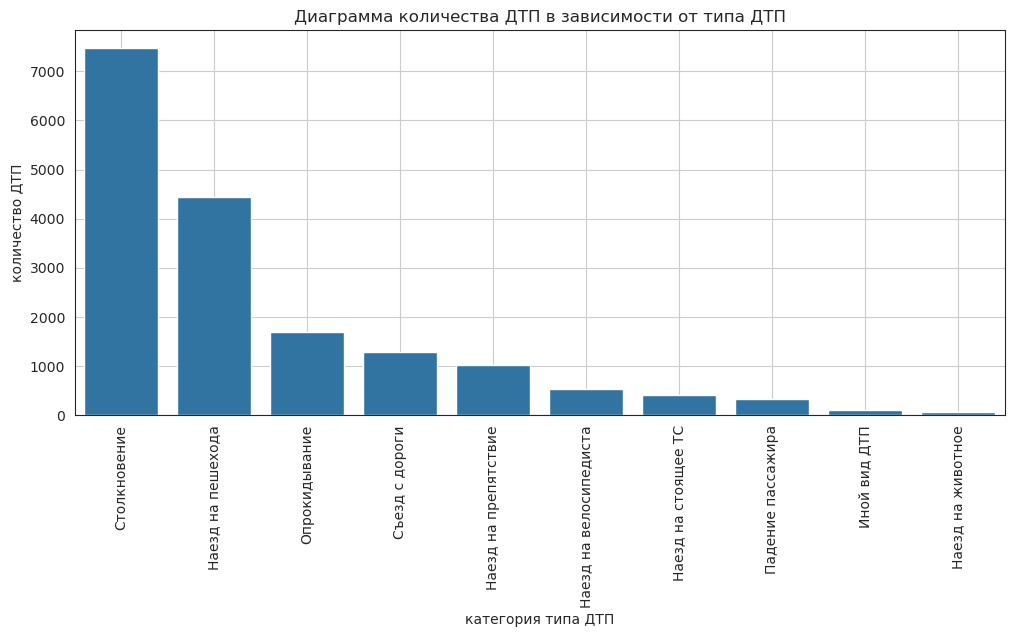

In [582]:
#df.category.value_counts().reset_index().hist()
# используем стиль white из библиотеки seaborn
sns.set_style('white')
# назначаем размер графика
plt.figure(figsize=(12,5))
# строим столбчатый график средствами seaborn
sns.barplot(x='category', y='count', data=df_category.head(10))
# формируем заголовок графика и подписи осей средствами matplotlib
plt.title('Диаграмма количества ДТП в зависимости от типа ДТП')
plt.xlabel('категория типа ДТП')
plt.ylabel('количество ДТП')
plt.xticks(rotation=90)
# выбираем положение легенды
#plt.legend(loc='upper left', fontsize=15)
# добавляем сетку
plt.grid()
# отображаем график на экране
plt.show()



## столбец severity

In [583]:
df.severity.unique()

array(['С погибшими', 'Легкий', 'Тяжёлый'], dtype=object)

In [1123]:
df.severity.value_counts()

severity
Легкий         8755
Тяжёлый        8318
С погибшими    2132
Name: count, dtype: int64

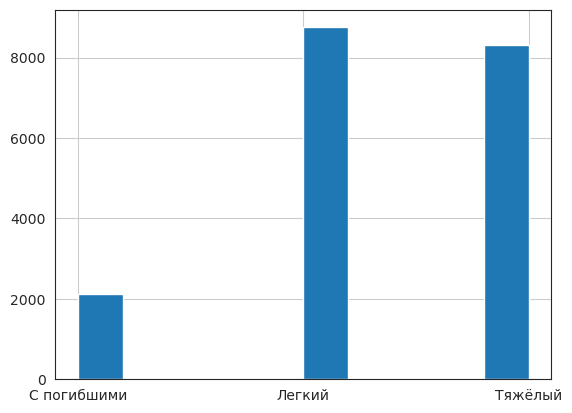

In [1139]:
df.severity.hist()
plt.show()

In [585]:
df_category_count = df.category.value_counts().reset_index()#.hist()
df_category_count 

category  count
0                                        Столкновение   7466
1                                   Наезд на пешехода   4434
2                                       Опрокидывание   1683
3                                      Съезд с дороги   1282
4                                Наезд на препятствие   1017
5                              Наезд на велосипедиста    537
6                                 Наезд на стоящее ТС    405
7                                   Падение пассажира    318
8                                        Иной вид ДТП    107
9                                   Наезд на животное     58
10  Наезд на лицо, не являющееся участником дорожн...     14
11  Наезд на лицо, не являющееся участником дорожн...     11
12                              Отбрасывание предмета      8
13                         Наезд на гужевой транспорт      6
14            Наезд на внезапно возникшее препятствие      5
15  Наезд на лицо, не являющееся участником дорожн...      5
16                                      Падение груза      3
17  Возгорание вследствие технической неисправност...      2

In [586]:
# строим диаграмму для распределения ДТП
fig = go.Figure(data=[go.Pie(labels=df_category_count['category'], # указываем значения, которые появятся на метках сегментов
                             values=df_category_count['count'], # указываем данные, которые отобразятся на графике
                             )]) # добавляем аргумент, который выделит сегмент-лидер на графике
fig.update_layout(title='Распределение ДТП по категориям', # указываем заголовок графика
                  width=1400, # указываем размеры графика
                  height=900,
                  annotations=[dict(x=1.0, # вручную настраиваем аннотацию легенды
                                    y=18.05,
                                    text='category',
                                    showarrow=False)])
fig.show() # выводим график


In [607]:
df_dead['count'].sum()

17361

In [609]:
df_dead = df.dead_count.value_counts().reset_index()#[1:]
df_dead['percent'] = 100*df_dead['count']/df_dead['count'].sum()
df_dead

dead_count  count    percent
0           0  15387  88.629687
1           1   1694   9.757502
2           2    201   1.157767
3           3     45   0.259202
4           4     21   0.120961
5           5      5   0.028800
6           7      4   0.023040
7           6      3   0.017280
8           8      1   0.005760

In [611]:
list_dead_id = df[df.dead_count>4]['id'].to_list()
list_dead_id

[1821368,
 1811354,
 2724859,
 2508937,
 1820368,
 2680706,
 1821525,
 1818052,
 1814797,
 1811157,
 2927196,
 2480802,
 1817566]

In [628]:
# строим диаграмму для распределения ДТП
fig = go.Figure(data=[go.Pie(labels=df_dead['dead_count'], # указываем значения, которые появятся на метках сегментов
                             values=df_dead['count'], # указываем данные, которые отобразятся на графике
                             )]) # добавляем аргумент, который выделит сегмент-лидер на графике
fig.update_layout(title='Распределение ДТП по количеству умерших', # указываем заголовок графика
                  width=950, # указываем размеры графика
                  height=700,
                  annotations=[dict(x=1.0, # вручную настраиваем аннотацию легенды
                                    y=10.05,
                                    text='количество умерших',
                                    showarrow=True)])
fig.show() # выводим график


## столбец injured_count

In [633]:
df_injured = df.injured_count.value_counts().reset_index().sort_values(by='injured_count')
df_injured 

injured_count  count
2               0   1224
0               1  12363
1               2   2465
3               3    821
4               4    292
5               5    118
6               6     37
7               7     19
8               8     11
11              9      1
9              10      5
10             11      3
12             12      1
13             15      1

In [634]:
# строим диаграмму для распределения ДТП
fig = go.Figure(data=[go.Pie(labels=df_injured['injured_count'], # указываем значения, которые появятся на метках сегментов
                             values=df_injured['count'], # указываем данные, которые отобразятся на графике
                             )]) # добавляем аргумент, который выделит сегмент-лидер на графике
fig.update_layout(title='Распределение ДТП по количеству пострадавших', # указываем заголовок графика
                  width=1000, # указываем размеры графика
                  height=800,
                  annotations=[dict(x=1.0, # вручную настраиваем аннотацию легенды
                                    y=18.05,
                                    text='injured_count',
                                    showarrow=False)])
fig.show() # выводим график


In [639]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17361 entries, 0 to 17360
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   coordinates             17361 non-null  object 
 1   id                      17361 non-null  int32  
 2   tags                    17361 non-null  object 
 3   light                   17361 non-null  object 
 4   lat                     17349 non-null  float64
 5   long                    17349 non-null  float64
 6   nearby                  17361 non-null  object 
 7   region                  17361 non-null  object 
 8   scheme                  16095 non-null  object 
 9   address                 17361 non-null  object 
 10  weather                 17361 non-null  object 
 11  category                17361 non-null  object 
 12  datetime                17361 non-null  object 
 13  severity                17361 non-null  object 
 14  vehicles                17361 non-null

## столбец road_conditions

In [635]:
df.explode('road_conditions').road_conditions.unique()

array(['Сухое', 'Неровное покрытие', 'Мокрое',
       'Отсутствие, плохая различимость горизонтальной разметки проезжей части',
       'Отсутствие элементов обустройства остановочного пункта общественного пассажирского транспорта',
       'Отсутствие освещения',
       'Обработанное противогололедными материалами',
       'Отсутствие дорожных знаков в необходимых местах',
       'Неудовлетворительное состояние обочин',
       'Недостатки зимнего содержания', 'Гололедица', 'Заснеженное',
       'Со снежным накатом', 'Дефекты покрытия', 'Иные недостатки',
       'Отсутствие направляющих устройств и световозвращающих элементов на них',
       'Неправильное применение, плохая видимость дорожных знаков',
       'Недостаточное освещение',
       'Отсутствие тротуаров (пешеходных дорожек)',
       'Отсутствие временных ТСОД в местах проведения работ',
       'Ограничение видимости',
       'Несоответствие дорожных ограждений предъявляемым требованиям',
       'Неисправное освещение',
       '

In [640]:
len(df.explode('road_conditions').road_conditions.unique())

38

In [638]:
df.road_conditions.value_counts().reset_index()

road_conditions  count
0                                               [Сухое]   5441
1     [Сухое, Отсутствие, плохая различимость горизо...   2405
2                                              [Мокрое]    750
3     [Мокрое, Отсутствие, плохая различимость гориз...    481
4         [Обработанное противогололедными материалами]    464
...                                                 ...    ...
1035  [Отсутствие элементов обустройства остановочно...      1
1036  [Неисправное освещение, Недостатки зимнего сод...      1
1037             [Недостаточное освещение, Заснеженное]      1
1038  [Неисправность светофора, Мокрое, Отсутствие п...      1
1039  [Неисправное освещение, Сухое, Неудовлетворите...      1

[1040 rows x 2 columns]

In [678]:
road_conditions = df.explode('road_conditions').road_conditions.value_counts().reset_index()
road_conditions

road_conditions  count
0                                               Сухое  12293
1   Отсутствие, плохая различимость горизонтальной...   6940
2     Отсутствие дорожных знаков в необходимых местах   2501
3                                              Мокрое   2177
4                       Недостатки зимнего содержания   1856
5         Обработанное противогололедными материалами   1389
6   Неправильное применение, плохая видимость доро...   1242
7                                         Заснеженное    868
8               Неудовлетворительное состояние обочин    828
9           Отсутствие тротуаров (пешеходных дорожек)    777
10  Отсутствие, плохая различимость вертикальной р...    652
11                               Отсутствие освещения    577
12  Отсутствие пешеходных ограждений в необходимых...    565
13                                   Дефекты покрытия    477
14                                 Со снежным накатом    432
15                                    Иные недостатки    298
16  Отсутствие элементов обустройства остановочног...    234
17                                         Гололедица    159
18  Отсутствие направляющих устройств и световозвр...    157
19                            Недостаточное освещение    132
20                                  Неровное покрытие    111
21                              Неисправное освещение    104
22  Отсутствие дорожных ограждений в необходимых м...     80
23                            Неисправность светофора     73
24  Несоответствие дорожных ограждений предъявляем...     59
25                              Ограничение видимости     43
26  Отсутствие временных ТСОД в местах проведения ...     41
27  Сужение проезжей части, наличие препятствий, з...     34
28                   Низкие сцепные качества покрытия     29
29                                       Загрязненное     28
30  Плохая видимость световозвращателей, размещенн...     24
31  Несоответствие люков смотровых колодцев и ливн...     18
32                         Плохая видимость светофора     13
33                                            Пыльное      8
34  Неудовлетворительное состояние разделительной ...      8
35             Свежеуложенная поверхностная обработка      7
36            Нарушения в размещении наружной рекламы      5
37  Несоответствие железнодорожного переезда предъ...      2

In [679]:
# Этот список будет ключом к индексам полученным из наших данных.

my_list_road = list(df.explode('road_conditions')['road_conditions'].unique())

my_list_road

['Сухое',
 'Неровное покрытие',
 'Мокрое',
 'Отсутствие, плохая различимость горизонтальной разметки проезжей части',
 'Отсутствие элементов обустройства остановочного пункта общественного пассажирского транспорта',
 'Отсутствие освещения',
 'Обработанное противогололедными материалами',
 'Отсутствие дорожных знаков в необходимых местах',
 'Неудовлетворительное состояние обочин',
 'Недостатки зимнего содержания',
 'Гололедица',
 'Заснеженное',
 'Со снежным накатом',
 'Дефекты покрытия',
 'Иные недостатки',
 'Отсутствие направляющих устройств и световозвращающих элементов на них',
 'Неправильное применение, плохая видимость дорожных знаков',
 'Недостаточное освещение',
 'Отсутствие тротуаров (пешеходных дорожек)',
 'Отсутствие временных ТСОД в местах проведения работ',
 'Ограничение видимости',
 'Несоответствие дорожных ограждений предъявляемым требованиям',
 'Неисправное освещение',
 'Отсутствие пешеходных ограждений в необходимых местах',
 'Свежеуложенная поверхностная обработка',
 'П

000000000

012345678

Можно взять индексы списка перевести в строку.

In [680]:
# Функция по переводу списка.

def return_r(row):
    # Индекс в строк будет соответсвовать номеру в списке.
    # 0 - нет признака, 1 есть признак.
    # Создадим список из 0 в строчном формате.

    number_list_road = ['0' for i in range(len(my_list_road))]

# Если значение в строке больше нуля то заменяем 0 значения 1 по индексу

    if len(row['road_conditions']) >0:

        index_list_road = [my_list_road.index(i) for i in row['road_conditions']]

        for ind in index_list_road:
            number_list_road[ind] = '1'

# Возвращаем данные в виде строки, разделенной запятыми.
    return ','.join(number_list_road)



In [681]:
# Посчитаем полученные значения.

road_df_count = df.apply(return_r, axis=1).value_counts()

In [682]:
road_df_count

1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0    5441
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0    2405
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0     750
0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0     481
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0     464
                                                                               ... 
0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0       1
0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0       1
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0       1
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0       1
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0       1
Name: count, Length: 1040, dtype: int64

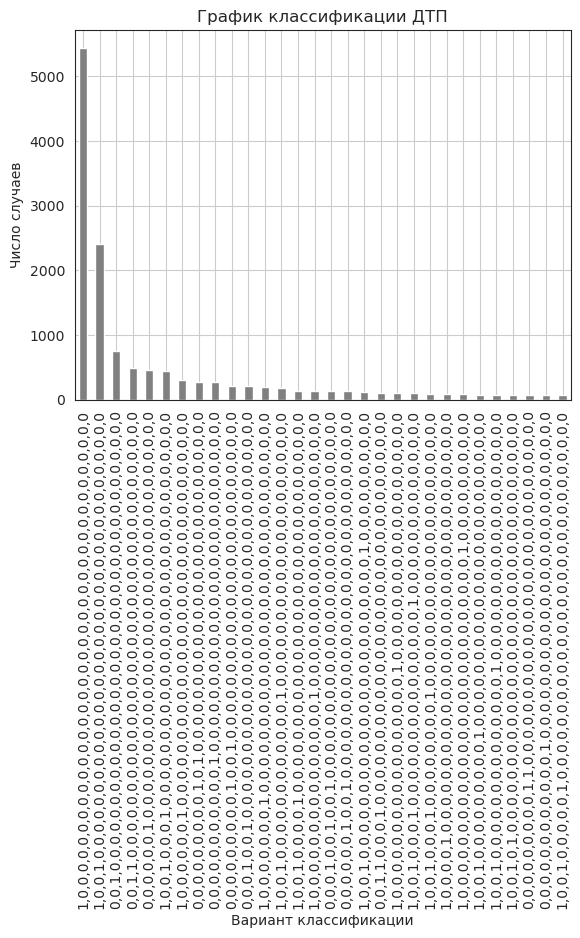

In [683]:
# Построим график.

road_df_count.head(30).plot(kind='bar', grid=True, color = 'grey')
plt.title('График классификации ДТП')
plt.xlabel('Вариант классификации')
plt.ylabel('Число случаев');

In [389]:
# Функция для определения статуса алкогольного воздействия
def categorize_road(row): 
    if 'нерегулируем' in str(row).lower():
        return 'unreg'  # нерегулируемый перекресток
    elif 'мост' in str(row).lower() or 'переправ' in str(row).lower():
        return 'road_constr'  # дорожные сооружения
    elif 'регулируем' in str(row).lower():
        return 'regular'  # регулируемые перекрестки
    elif 'школ' in str(row).lower() or 'образов' in str(row).lower() or 'детск' in str(row).lower():
        return 'children'  # образовательные учредения
    elif 'индивидуа' in str(row).lower() or 'территория' in str(row).lower() or 'пешеходн' in str(row).lower():
        return 'inside'  #  # жилые застройки
    elif 'азс' in str(row).lower() or 'автостоянк' in str(row).lower() or 'кладби' in str(row).lower() or 'пункт' in str(row).lower() or 'скот' in str(row).lower() or 'иной' in str(row).lower() or 'строитель' in str(row).lower():
        return 'low_people' # места с малым количеством людей
    elif 'дпс' in str(row).lower() or 'мвд' in str(row).lower():
        return 'police'  # силовые структуры
    elif 'многоквартир' in str(row).lower():
        return 'apartments'
    elif 'unknown' in str(row).lower() or row==[]:
        return 'unknown'  # неизвестно
    else:
        return 'public'  # публичные места

# Создание новых столбцов
a['nearby_cat'] = a['nearby'].apply(categorize_nearby)

# Заполнение пропущенных значений в новых столбцах, если необходимо
#df['alcohol_status'] = df['alcohol_status'].fillna(value=np.nan)


In [685]:
# заменяем все русские бренды латинскими названиями
df.road_conditions.replace({'Сухое':'dry',
                         
                         'Ограничение видимости': 'unvisibility',
                         
                         'Неровное покрытие':'road_surface', 
                         'Дефекты покрытия':'road_surface',
                         'Свежеуложенная поверхностная обработка':'road_surface', 
                         'Несоответствие люков смотровых колодцев и ливневой канализации предъявляемым требованиям':'road_surface',
                         
                         'Мокрое':'slippery',
                         'Низкие сцепные качества покрытия':'slippery', 
                         'Обработанное противогололедными материалами':'slippery',
                         'Недостатки зимнего содержания':'slippery',
                         'Заснеженное':'slippery',
                         'Гололедица':'slippery',
                         'Со снежным накатом':'slippery',
                         
                         'Пыльное':'dirty',
                         'Загрязненное':'dirty',
                         
                         'Отсутствие, плохая различимость горизонтальной разметки проезжей части':'signs&markings',
                         'Отсутствие дорожных знаков в необходимых местах':'signs&markings',
                         'Неправильное применение, плохая видимость дорожных знаков':'signs&markings',
                         'Отсутствие, плохая различимость вертикальной разметки':'signs&markings',
                         'Неисправность светофора':'signs&markings',
                         'Плохая видимость светофора':'signs&markings',
                         
                         'Отсутствие элементов обустройства остановочного пункта общественного пассажирского транспорта':'people_unsafety',
                         'Отсутствие тротуаров (пешеходных дорожек)':'people_unsafety',
                         'Отсутствие пешеходных ограждений в необходимых местах':'people_unsafety',
                         'Отсутствие временных ТСОД в местах проведения работ':'people_unsafety',
                         
                         'Отсутствие освещения':'lightless',
                         'Недостаточное освещение':'lightless',
                         'Неисправное освещение':'lightless',
                         
                         
                         'Неудовлетворительное состояние обочин':'road_structures_defect',
                         'Неудовлетворительное состояние разделительной полосы':'road_structures_defect',
                         'Сужение проезжей части, наличие препятствий, затрудняющих движение транспортных средств':'road_structures_defect',
                         'Несоответствие железнодорожного переезда предъявляемым требованиям':'road_structures_defect',
                         'Отсутствие направляющих устройств и световозвращающих элементов на них':'road_structures_defect',
                         'Несоответствие дорожных ограждений предъявляемым требованиям':'road_structures_defect',
                         'Плохая видимость световозвращателей, размещенных на дорожных ограждениях':'road_structures_defect',
                         'Отсутствие дорожных ограждений в необходимых местах':'road_structures_defect',
                                                    
                         'Иные недостатки':'else',
                         'Нарушения в размещении наружной рекламы':'else'}, inplace=True)
#road_conditions

In [686]:
df

coordinates       id                                 tags  \
0          [53.0986, 52.4139]  2872510  [Дорожно-транспортные происшествия]   
1          [53.1781, 52.4108]  1811577  [Дорожно-транспортные происшествия]   
2      [53.043537, 52.444344]  2620851  [Дорожно-транспортные происшествия]   
3      [52.906272, 52.706841]  2646512  [Дорожно-транспортные происшествия]   
4      [52.976246, 52.474573]  1818264  [Дорожно-транспортные происшествия]   
...                       ...      ...                                  ...   
17356  [53.155411, 52.433653]  1817428  [Дорожно-транспортные происшествия]   
17357     [53.160117, 52.437]  1818684  [Дорожно-транспортные происшествия]   
17358   [53.142285, 52.42232]  1817094  [Дорожно-транспортные происшествия]   
17359  [53.160546, 52.425847]  2521166  [Дорожно-транспортные происшествия]   
17360      [53.2736, 52.6853]  1819013  [Дорожно-транспортные происшествия]   

         light        lat       long  \
0        light  52.413900  53.098600   
1         dark  52.410800  53.178100   
2        light  52.444344  53.043537   
3        light  52.706841  52.906272   
4        light  52.474573  52.976246   
...        ...        ...        ...   
17356    light  52.433653  53.155411   
17357    light  52.437000  53.160117   
17358    light  52.422320  53.142285   
17359  electro  52.425847  53.160546   
17360    light  52.685300  53.273600   

                                                  nearby       region scheme  \
0                                                     []  Сорочинский    210   
1                                                     []  Сорочинский    610   
2                                                     []  Сорочинский    220   
3                                                     []  Сорочинский   None   
4                                                     []  Сорочинский    010   
...                                                  ...          ...    ...   
17356  [Жилые дома индивидуальной застройки, Крупный ...    Сорочинск    500   
17357              [Жилые дома индивидуальной застройки]    Сорочинск   None   
17358  [Жилые дома индивидуальной застройки, Регулиру...    Сорочинск    070   
17359  [Жилые дома индивидуальной застройки, Нерегули...    Сорочинск    200   
17360              [Жилые дома индивидуальной застройки]    Сорочинск    500   

                                           address  ... dead_count  \
0      М-5 Урал, подъезд к городу Оренбург, 256 км  ...          1   
1                              Прочие дороги, 0 км  ...          0   
2      М-5 Урал, подъезд к городу Оренбург, 251 км  ...          0   
3                                          unknown  ...          0   
4      М-5 Урал, подъезд к городу Оренбург, 245 км  ...          0   
...                                            ...  ...        ...   
17356             г Сорочинск, ул Карла Маркса, 37  ...          0   
17357             г Сорочинск, ул Водокачечная, 28  ...          0   
17358                   г Сорочинск, ул Зеленая, 7  ...          0   
17359            г Сорочинск, ул Чернышевского, 70  ...          1   
17360                г Сорочинск, ул Фурманова, 18  ...          0   

      participants injured_count         parent_region  \
0               []             0  Оренбургская область   
1               []             1  Оренбургская область   
2               []             4  Оренбургская область   
3               []             1  Оренбургская область   
4               []             1  Оренбургская область   
...            ...           ...                   ...   
17356           []             2  Оренбургская область   
17357           []             1  Оренбургская область   
17358           []             1  Оренбургская область   
17359           []             1  Оренбургская область   
17360           []             2  Оренбургская область   

                                         road_conditions  participants_count  \
0        

In [675]:
road_conditions_cat = road_conditions.groupby('road_conditions').agg(
    {'count':'sum'}).reset_index().sort_values(by='count', ascending=False)
road_conditions_cat

road_conditions  count
1                      dry  12293
8           signs&markings  11421
9                 slippery   6910
4          people_unsafety   1617
6   road_structures_defect   1192
3                lightless    813
5             road surface    502
2                     else    303
7             road_surface    111
10            unvisibility     43
0                    dirty     36

In [676]:
road_conditions_cat['percent'] = 100 * road_conditions_cat['count']/road_conditions_cat['count'].sum()

In [677]:
road_conditions_cat

road_conditions  count    percent
1                      dry  12293  34.882665
8           signs&markings  11421  32.408274
9                 slippery   6910  19.607843
4          people_unsafety   1617   4.588406
6   road_structures_defect   1192   3.382424
3                lightless    813   2.306972
5             road surface    502   1.424477
2                     else    303   0.859794
7             road_surface    111   0.314974
10            unvisibility     43   0.122017
0                    dirty     36   0.102154

In [643]:
df[['road_conditions']]

road_conditions
0                                                [Сухое]
1                             [Сухое, Неровное покрытие]
2                                                [Сухое]
3                                                [Сухое]
4                                               [Мокрое]
...                                                  ...
17356                                            [Сухое]
17357                                            [Сухое]
17358                                            [Сухое]
17359  [Сухое, Отсутствие, плохая различимость горизо...
17360  [Сухое, Отсутствие, плохая различимость горизо...

[17361 rows x 1 columns]

In [26]:
first_look_data(df_vehicles)

id    year                     brand       color  \
0  2872510  2019.0                       ВАЗ  Иные цвета   
1  2872510  2023.0  Прочие марки грузовых ТС       Белый   
2  1811577  2003.0                       ВАЗ       Белый   
3  2620851  2009.0                     SKODA       Белый   
4  2646512  2017.0   Прочие марки мотоциклов     Красный   

                          model                                      category  \
0                 Vesta (Веста)                А-класс (особо малый) до 3,5 м   
1      Прочие марки грузовых ТС                              Седельные тягачи   
2   Ока  ВАЗ-1111 и модификации                      В-класс (малый) до 3,9 м   
3                       Octavia  С-класс (малый средний, компактный) до 4,3 м   
4       Прочие марки мотоциклов                                     Мотоциклы   

                                        participants  
0  [{'role': 'Водитель', 'gender': 'Мужской', 'vi...  
1  [{'role': 'Водитель', 'gender': 'Мужской', 'vi...  
2  [{'role': 'Водитель', 'gender': 'Мужской', 'vi...  
3  [{'role': 'Пассажир', 'gender': 'Мужской', 'vi...  
4  [{'role': 'Водитель', 'gender': 'Мужской', 'vi...

Колонки
Index(['id', 'year', 'brand', 'color', 'model', 'category', 'participants'], dtype='object')
--------------------------------------------------
Содержимое колонок
********************
id
[2872510 1811577 2620851 ... 1817094 2521166 1819013]
17361
********************
year
[2.019e+03 2.023e+03 2.003e+03 2.009e+03 2.017e+03 2.016e+03 2.015e+03
 2.014e+03 2.007e+03       nan 2.020e+03 2.012e+03 2.008e+03 2.013e+03
 2.018e+03 2.005e+03 1.997e+03 2.006e+03 2.001e+03 1.988e+03 2.004e+03
 1.992e+03 2.002e+03 2.021e+03 2.011e+03 2.000e+03 1.990e+03 2.010e+03
 1.996e+03 2.022e+03 1.980e+03 1.998e+03 1.999e+03 1.991e+03 1.995e+03
 1.994e+03 1.993e+03 1.984e+03 1.974e+03 1.985e+03 1.975e+03 1.987e+03
 1.989e+03 1.986e+03 1.982e+03 1.000e+00 1.981e+03 1.983e+03 1.970e+03
 1.973e+03 1.962e+03 1.977e+03 1.976e+03 1.978e+03 1.979e+03 1.965e+03
 1.963e+03 1.967e+03 1.971e+03]
58
********************
brand
['ВАЗ' 'Прочие марки грузовых ТС' 'SKODA' 'Прочие марки мотоциклов'
 'RENAULT' 'КАМАЗ' 'Y

In [27]:
# посмотрим сколько весят датафрейм без участников, которые будут отдельно и каждая колонка до преобразования
print('до преобразования')
print(50*'*')
print('датасет без участников')
print(50*'*')
display(df_vehicles[['id', 'year', 'brand', 'color', 'model', 'category']].info())
print('колонка индексов')
print(50*'*')
display(df_vehicles[['id']].info())
print('колонка год выпуска')
print(50*'*')
display(df_vehicles[['year']].info())
print('колонка бренд')
print(50*'*')
display(df_vehicles[['brand']].info())
print('колонка цвет авто')
print(50*'*')
display(df_vehicles[['color']].info())
print('колонка категория')
print(50*'*')
display(df_vehicles[['category']].info())
print('колонка участники')
print(50*'*')
display(df_vehicles[['participants']].info())

до преобразования
**************************************************
датасет без участников
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27227 entries, 0 to 27226
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        27227 non-null  int64  
 1   year      26366 non-null  float64
 2   brand     26419 non-null  object 
 3   color     26810 non-null  object 
 4   model     26419 non-null  object 
 5   category  27155 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB


None

колонка индексов
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27227 entries, 0 to 27226
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      27227 non-null  int64
dtypes: int64(1)
memory usage: 212.8 KB


None

колонка год выпуска
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27227 entries, 0 to 27226
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    26366 non-null  float64
dtypes: float64(1)
memory usage: 212.8 KB


None

колонка бренд
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27227 entries, 0 to 27226
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   brand   26419 non-null  object
dtypes: object(1)
memory usage: 212.8+ KB


None

колонка цвет авто
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27227 entries, 0 to 27226
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   color   26810 non-null  object
dtypes: object(1)
memory usage: 212.8+ KB


None

колонка категория
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27227 entries, 0 to 27226
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  27155 non-null  object
dtypes: object(1)
memory usage: 212.8+ KB


None

колонка участники
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27227 entries, 0 to 27226
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   participants  27155 non-null  object
dtypes: object(1)
memory usage: 212.8+ KB


None

столбец id нет пропусков

In [28]:
print('максимальное значение индекса', df_vehicles.id.astype(np.int32).max(
), ', минимальное значение индекса', df_vehicles.id.astype(np.int32).min())

максимальное значение индекса 2943653 , минимальное значение индекса 1810268


In [29]:
# меняем тип данных на целочисленное чтобы уменьшить вес столбца
df_vehicles.id = df_vehicles.id.astype(np.int32)
print('после преобразования')
print(50*'*')
print('столбец индексов')
print(50*'*')
df_vehicles[['id']].info()

после преобразования
**************************************************
столбец индексов
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27227 entries, 0 to 27226
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      27227 non-null  int32
dtypes: int32(1)
memory usage: 106.5 KB


In [30]:
#df_vehicles[['id', 'year', 'brand', 'color', 'model', 'category']].info()

столбец год выпуска

In [31]:
# уникальные значения года выпуска
df_vehicles.year.unique()

array([2.019e+03, 2.023e+03, 2.003e+03, 2.009e+03, 2.017e+03, 2.016e+03,
       2.015e+03, 2.014e+03, 2.007e+03,       nan, 2.020e+03, 2.012e+03,
       2.008e+03, 2.013e+03, 2.018e+03, 2.005e+03, 1.997e+03, 2.006e+03,
       2.001e+03, 1.988e+03, 2.004e+03, 1.992e+03, 2.002e+03, 2.021e+03,
       2.011e+03, 2.000e+03, 1.990e+03, 2.010e+03, 1.996e+03, 2.022e+03,
       1.980e+03, 1.998e+03, 1.999e+03, 1.991e+03, 1.995e+03, 1.994e+03,
       1.993e+03, 1.984e+03, 1.974e+03, 1.985e+03, 1.975e+03, 1.987e+03,
       1.989e+03, 1.986e+03, 1.982e+03, 1.000e+00, 1.981e+03, 1.983e+03,
       1.970e+03, 1.973e+03, 1.962e+03, 1.977e+03, 1.976e+03, 1.978e+03,
       1.979e+03, 1.965e+03, 1.963e+03, 1.967e+03, 1.971e+03])

In [32]:
# выведем таблицу в которой будут строки с пропущенными годами выпуска авто
df_vehicles[df_vehicles.year.isna()]

id  year                    brand       color  \
10     2603014   NaN                     None        None   
162    1814178   NaN  Прочие марки мотоциклов  Иные цвета   
237    1817741   NaN                     None        None   
244    1813082   NaN                     None        None   
299    1821746   NaN                     None        None   
...        ...   ...                      ...         ...   
27130  1815599   NaN                     None        None   
27151  1819011   NaN          Прочие марки ТС       Синий   
27153  1819457   NaN                     None        None   
27154  1815821   NaN                     None        None   
27217  1810899   NaN                     None        None   

                          model                                      category  \
10                         None                                    Велосипеды   
162     Прочие марки мотоциклов                                   Мотороллеры   
237                        None                                       Иные ТС   
244                        None                    Прочие грузовые автомобили   
299                        None  С-класс (малый средний, компактный) до 4,3 м   
...                         ...                                           ...   
27130                      None                                    Велосипеды   
27151  Прочие марки и модели ТС                                    Велосипеды   
27153                      None                      В-класс (малый) до 3,9 м   
27154                      None                      В-класс (малый) до 3,9 м   
27217                      None  С-класс (малый средний, компактный) до 4,3 м   

                                            participants  
10     [{'role': 'Велосипедист', 'gender': 'Мужской',...  
162    [{'role': 'Водитель', 'gender': 'Мужской', 'vi...  
237    [{'role': 'Пассажир', 'gender': 'Женский', 'vi...  
244    [{'role': 'Водитель', 'gender': None, 'violati...  
299    [{'role': 'Водитель', 'gender': None, 'violati...  
...                                                  ...  
27130  [{'role': 'Водитель', 'gender': 'Мужской', 'vi...  
27151  [{'role': 'Велосипедист', 'gender': 'Женский',...  
27153  [{'role': 'Водитель', 'gender': None, 'violati...  
27154  [{'role': 'Водитель', 'gender': None, 'violati...  
27217  [{'role': 'Водитель', 'gender': None, 'violati...  

[861 rows x 7 columns]

In [33]:
# посчитаем какие модели имеют больше всего пропусков года выпуска
df_vehicles[df_vehicles.year.isna()]['model'].value_counts()

model
Прочие марки и модели ТС                                                                             110
Прочие марки мотоциклов                                                                                7
Планета                                                                                                7
Прочие модели Урал                                                                                     5
Прочие модели Yamaha                                                                                   4
ВАЗ 2110, 21101, 21102, 21103, 21108                                                                   2
Priora                                                                                                 2
 Жигули  ВАЗ-2107 модификации                                                                          2
22069                                                                                                  1
ГАЗ 24, 24-01, 24-02, 24-03, 24-04, 24-07, 24-10,

это прочие модели транспортных средств - 110 пропусков, а всего пропусков 861, явно пропуски в моделях тоже присутсвуют

In [34]:
# выведем количество пропусков года выпуска по брендам
df_vehicles[df_vehicles.year.isna()]['brand'].value_counts()

brand
Прочие марки ТС            110
ВАЗ                         10
Прочие марки мотоциклов      7
ИЖ                           7
УРАЛ                         5
YAMAHA                       4
VOLKSWAGEN                   2
HONDA                        1
УАЗ                          1
ГАЗ                          1
FOTON                        1
ТАГАЗ (TAGAZ)                1
DAEWOO                       1
HYUNDAI                      1
SUZUKI                       1
SYM                          1
Name: count, dtype: int64

Тоже неизвестные ТС

In [35]:
df_vehicles[df_vehicles.year.isna()]['category'].unique()

array(['Велосипеды', 'Мотороллеры', 'Иные ТС',
       'Прочие грузовые автомобили',
       'С-класс (малый средний, компактный) до 4,3 м', nan,
       'В-класс (малый) до 3,9 м', 'Мотоциклы',
       'Мопеды с двигателем внутреннего сгорания менее 50 см. куб.',
       'Прочие легковые автомобили', 'Бортовые грузовые автомобили',
       'Подвижной состав ж/д', 'D-класс (средний) до 4,6 м',
       'Гужевой транспорт',
       'Персональное электрическое средство передвижения малой мощности',
       'Седельные тягачи',
       'Е-класс (высший средний, бизнес-класс) до 4,9 м', 'Фургоны',
       'Тракторы', 'А-класс (особо малый) до 3,5 м',
       'Минивэны и универсалы повышенной вместимости',
       'Одноэтажные длиной от 5 до 8 м',
       'Одноэтажные длиной от 8 до 12 м', 'Троллейбусы',
       'Мопеды с двигателем внутреннего сгорания более 50 см. куб.',
       'Иные дорожно-строительные и дорожно-эксплуатационные машины и механизмы',
       'Квадроциклы', 'Трамваи', 'Не установлено'], dt

In [36]:
# посмотрим сколько пропусков года выпуска в строках где заполнена категоря ТС
df_vehicles[df_vehicles.year.isna()]['category'].value_counts().sum()

789

In [37]:
# посмотрим сколько пропусков года выпуска в строках где заполнена категоря ТС по категориям
df_vehicles[df_vehicles.year.isna()]['category'].value_counts()

category
Велосипеды                                                                 468
В-класс (малый) до 3,9 м                                                    87
С-класс (малый средний, компактный) до 4,3 м                                47
Иные ТС                                                                     46
Мотоциклы                                                                   26
Мопеды с двигателем внутреннего сгорания менее 50 см. куб.                  22
Гужевой транспорт                                                           16
Одноэтажные длиной от 5 до 8 м                                              13
D-класс (средний) до 4,6 м                                                  12
Подвижной состав ж/д                                                         9
Персональное электрическое средство передвижения малой мощности              7
Бортовые грузовые автомобили                                                 6
Прочие легковые автомобили                 

мы видим категории у которых сложно или невозможно определить год выпуска:
'Велосипеды', 'Мопеды с двигателем внутреннего сгорания менее 50 см. куб.', 'Гужевой транспорт', 'Подвижной состав ж/д', 'Персональное электрическое средство передвижения малой мощности', 'Мотороллеры', 'Мопеды с двигателем внутреннего сгорания менее 50 см. куб.','Квадроциклы', 'Не установлено'

уберем их и посмотрим что осталось

In [38]:
df_vehicles[(df_vehicles.year.isna()) & (~df_vehicles.category .isin(
    ['Велосипеды', 'Мопеды с двигателем внутреннего сгорания менее 50 см. куб.', 
     'Гужевой транспорт', 'Подвижной состав ж/д', 'Персональное электрическое средство передвижения малой мощности',
     'Мотороллеры', 'Мопеды с двигателем внутреннего сгорания более 50 см. куб.','Квадроциклы', 'Не установлено']))][
    'category'].value_counts()

category
В-класс (малый) до 3,9 м                                                   87
С-класс (малый средний, компактный) до 4,3 м                               47
Иные ТС                                                                    46
Мотоциклы                                                                  26
Одноэтажные длиной от 5 до 8 м                                             13
D-класс (средний) до 4,6 м                                                 12
Бортовые грузовые автомобили                                                6
Прочие легковые автомобили                                                  4
Троллейбусы                                                                 4
Е-класс (высший средний, бизнес-класс) до 4,9 м                             3
Прочие грузовые автомобили                                                  3
Тракторы                                                                    2
Минивэны и универсалы повышенной вместимости           

In [39]:
# присвоим транспортным средствам у которых сложно определить категорию 1
non_vehicles = ['Велосипеды', 'Мопеды с двигателем внутреннего сгорания менее 50 см. куб.', 
     'Гужевой транспорт', 'Подвижной состав ж/д', 'Персональное электрическое средство передвижения малой мощности',
     'Мотороллеры', 'Мопеды с двигателем внутреннего сгорания менее 50 см. куб.','Квадроциклы']
df_vehicles.loc[(df_vehicles.year.isna()) & (df_vehicles.category.isin(non_vehicles)), 'year'] = 1

In [40]:
df_vehicles[df_vehicles.year == 1]['year'].value_counts()

year
1.0    537
Name: count, dtype: int64

смотрим пропуски которые остались

In [41]:
df_vehicles.year.isna().sum()

336

In [42]:
df_vehicles[df_vehicles.year.isna()]

id  year brand color model  \
237    1817741   NaN  None  None  None   
244    1813082   NaN  None  None  None   
299    1821746   NaN  None  None  None   
338    1811869   NaN  None  None  None   
631    1814173   NaN   NaN   NaN   NaN   
...        ...   ...   ...   ...   ...   
27048  2607749   NaN  None  None  None   
27058  1811037   NaN  None  None  None   
27153  1819457   NaN  None  None  None   
27154  1815821   NaN  None  None  None   
27217  1810899   NaN  None  None  None   

                                           category  \
237                                         Иные ТС   
244                      Прочие грузовые автомобили   
299    С-класс (малый средний, компактный) до 4,3 м   
338                                         Иные ТС   
631                                             NaN   
...                                             ...   
27048                      В-класс (малый) до 3,9 м   
27058                      В-класс (малый) до 3,9 м   
27153                      В-класс (малый) до 3,9 м   
27154                      В-класс (малый) до 3,9 м   
27217  С-класс (малый средний, компактный) до 4,3 м   

                                            participants  
237    [{'role': 'Пассажир', 'gender': 'Женский', 'vi...  
244    [{'role': 'Водитель', 'gender': None, 'violati...  
299    [{'role': 'Водитель', 'gender': None, 'violati...  
338    [{'role': 'Водитель', 'gender': None, 'violati...  
631                                                  NaN  
...                                                  ...  
27048  [{'role': 'Водитель', 'gender': None, 'violati...  
27058  [{'role': 'Водитель', 'gender': None, 'violati...  
27153  [{'role': 'Водитель', 'gender': None, 'violati...  
27154  [{'role': 'Водитель', 'gender': None, 'violati...  
27217  [{'role': 'Водитель', 'gender': None, 'violati...  

[336 rows x 7 columns]

присвоим 0 годам выпуска этих транспортных средств

In [43]:
df_vehicles.loc[df_vehicles.year.isna(), 'year'] = 0

In [44]:
df_vehicles.year.isna().sum()

0

In [45]:
# меняем тип данных года выпуска
df_vehicles.year = df_vehicles.year.astype(np.int16)

In [46]:
# смотрим сколько стал весить столбец
df_vehicles[['year']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27227 entries, 0 to 27226
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    27227 non-null  int16
dtypes: int16(1)
memory usage: 53.3 KB


Сокращение почти в 4 раза

In [47]:
#df_vehicles[['id', 'year', 'brand', 'color', 'model', 'category']].info()

столбец brand

В этом столбце русские и латинские буквы, цифры и тире. 

In [48]:
# Сделаем все буквы строчными.
df_vehicles.brand = df_vehicles.brand.str.lower()

In [49]:
# проверим уникальные значения
df_vehicles.brand.unique()

array(['ваз', 'прочие марки грузовых тс', 'skoda',
       'прочие марки мотоциклов', 'renault', 'камаз', 'yamaha', 'scania',
       None, 'ac', 'volkswagen', 'зил', 'уаз', 'honda', 'газ', 'toyota',
       'isuzu', 'bmw', 'прочие марки тс', 'datsun', 'kia', 'hyundai',
       'маз-ман', 'daewoo', 'chevrolet', 'иж', 'volvo', 'lifan',
       'citroen', 'peugeot', 'nissan', 'mercedes', 'маз', 'opel',
       'mitsubishi', 'brilliance', 'вис', 'man', 'mazda', 'daf', 'ford',
       'chery', 'ssangyong', 'suzuki', 'краз', 'holden', 'урал', 'паз',
       'kawasaki', 'audi', 'прочие марки седельных тягачей', 'зид',
       'jiangling', 'tatra', 'lexus', 'shacman', 'fiat', 'haima',
       'москвич', 'geely', 'land rover', nan, 'тагаз (tagaz)', 'заз',
       'freightliner', 'abm', 'bajaj', 'faw', 'vor', 'porsche',
       'vw-porsche', 'minsk', 'кавз', 'iveco', 'subaru', 'zx', 'dodge',
       'богдан', 'луидор', 'harley-davidson', 'tianma', 'liebherr',
       'infiniti', 'jeep', 'восход', 'foton', 's

In [50]:
# количество уникальных значений
df_vehicles.brand.nunique()

168

In [51]:
# пропуски в столбце
df_vehicles.brand.isna().sum()

808

есть nan, None, пропусков 808, посмотрим что за пропуски

In [52]:
df_vehicles[df_vehicles.brand.isna()]

id  year brand color model  \
10     2603014     1  None  None  None   
237    1817741     0  None  None  None   
244    1813082     0  None  None  None   
299    1821746     0  None  None  None   
338    1811869     0  None  None  None   
...        ...   ...   ...   ...   ...   
27058  1811037     0  None  None  None   
27130  1815599     1  None  None  None   
27153  1819457     0  None  None  None   
27154  1815821     0  None  None  None   
27217  1810899     0  None  None  None   

                                           category  \
10                                       Велосипеды   
237                                         Иные ТС   
244                      Прочие грузовые автомобили   
299    С-класс (малый средний, компактный) до 4,3 м   
338                                         Иные ТС   
...                                             ...   
27058                      В-класс (малый) до 3,9 м   
27130                                    Велосипеды   
27153                      В-класс (малый) до 3,9 м   
27154                      В-класс (малый) до 3,9 м   
27217  С-класс (малый средний, компактный) до 4,3 м   

                                            participants  
10     [{'role': 'Велосипедист', 'gender': 'Мужской',...  
237    [{'role': 'Пассажир', 'gender': 'Женский', 'vi...  
244    [{'role': 'Водитель', 'gender': None, 'violati...  
299    [{'role': 'Водитель', 'gender': None, 'violati...  
338    [{'role': 'Водитель', 'gender': None, 'violati...  
...                                                  ...  
27058  [{'role': 'Водитель', 'gender': None, 'violati...  
27130  [{'role': 'Водитель', 'gender': 'Мужской', 'vi...  
27153  [{'role': 'Водитель', 'gender': None, 'violati...  
27154  [{'role': 'Водитель', 'gender': None, 'violati...  
27217  [{'role': 'Водитель', 'gender': None, 'violati...  

[808 rows x 7 columns]

посмотрим категории в котороых есть пропуски брендов

In [53]:
df_vehicles[df_vehicles.brand.isna()]['category'].value_counts()

category
Велосипеды                                                                 423
В-класс (малый) до 3,9 м                                                    78
Иные ТС                                                                     47
С-класс (малый средний, компактный) до 4,3 м                                44
Мопеды с двигателем внутреннего сгорания менее 50 см. куб.                  24
Тракторы                                                                    19
Гужевой транспорт                                                           15
Одноэтажные длиной от 5 до 8 м                                              13
D-класс (средний) до 4,6 м                                                  12
Подвижной состав ж/д                                                        10
Персональное электрическое средство передвижения малой мощности              7
Бортовые грузовые автомобили                                                 6
Мотоциклы                                  

Более всего пропусков в столбце бренд в категории велосипеды - более половины пропусков. Легкие транспортные средства у которых нет бренда составляют большую долю пропусков в столбце бренд

In [54]:
# посмотрим пропуски в столбце бренд и непропуски в категории
df_vehicles[(df_vehicles.brand.isna())&(~df_vehicles.category.isna())]

id  year brand color model  \
10     2603014     1  None  None  None   
237    1817741     0  None  None  None   
244    1813082     0  None  None  None   
299    1821746     0  None  None  None   
338    1811869     0  None  None  None   
...        ...   ...   ...   ...   ...   
27058  1811037     0  None  None  None   
27130  1815599     1  None  None  None   
27153  1819457     0  None  None  None   
27154  1815821     0  None  None  None   
27217  1810899     0  None  None  None   

                                           category  \
10                                       Велосипеды   
237                                         Иные ТС   
244                      Прочие грузовые автомобили   
299    С-класс (малый средний, компактный) до 4,3 м   
338                                         Иные ТС   
...                                             ...   
27058                      В-класс (малый) до 3,9 м   
27130                                    Велосипеды   
27153                      В-класс (малый) до 3,9 м   
27154                      В-класс (малый) до 3,9 м   
27217  С-класс (малый средний, компактный) до 4,3 м   

                                            participants  
10     [{'role': 'Велосипедист', 'gender': 'Мужской',...  
237    [{'role': 'Пассажир', 'gender': 'Женский', 'vi...  
244    [{'role': 'Водитель', 'gender': None, 'violati...  
299    [{'role': 'Водитель', 'gender': None, 'violati...  
338    [{'role': 'Водитель', 'gender': None, 'violati...  
...                                                  ...  
27058  [{'role': 'Водитель', 'gender': None, 'violati...  
27130  [{'role': 'Водитель', 'gender': 'Мужской', 'vi...  
27153  [{'role': 'Водитель', 'gender': None, 'violati...  
27154  [{'role': 'Водитель', 'gender': None, 'violati...  
27217  [{'role': 'Водитель', 'gender': None, 'violati...  

[736 rows x 7 columns]

In [55]:
# приведем пропуски к одному виду NaN
df_vehicles.brand = df_vehicles.brand.astype(str)
df_vehicles.loc[df_vehicles.brand=='nan','brand'] = np.NaN
df_vehicles.loc[df_vehicles.brand=='None','brand'] = np.NaN

In [56]:
# соберем 72 id в список - это строки в которых нет информации
list_nan_id = list(df_vehicles[(df_vehicles.brand.isna())&(df_vehicles.category.isna())]['id'].unique())

In [57]:
# Заполняем модой по данным из таблицы без пропущенных значений используем столбец category
no_na_table = df_vehicles[df_vehicles.brand.notna()]
# Заполняю модой по данным из таблицы без пропущенных значений
for t in df_vehicles.category.unique():
    try:
        
        df_vehicles.loc[(df_vehicles.category == t) & (df_vehicles.brand.isna()), 'brand'] = \
        no_na_table.query('category == @t')['brand'].mode()[0]
    except:
        pass

In [58]:
# смотрим уникальные значения
df_vehicles.brand.unique()

array(['ваз', 'прочие марки грузовых тс', 'skoda',
       'прочие марки мотоциклов', 'renault', 'камаз', 'yamaha', 'scania',
       'прочие марки тс', 'ac', 'volkswagen', 'зил', 'уаз', 'honda',
       'газ', 'toyota', 'isuzu', 'bmw', 'datsun', 'kia', 'hyundai',
       'маз-ман', 'daewoo', 'chevrolet', 'иж', 'volvo', 'lifan',
       'citroen', 'peugeot', 'nissan', 'mercedes', 'маз', 'opel',
       'mitsubishi', 'brilliance', 'вис', 'man', 'mazda', 'daf', 'ford',
       'chery', 'ssangyong', 'suzuki', 'краз', 'holden', 'урал', 'паз',
       'kawasaki', 'audi', 'прочие марки седельных тягачей', 'зид',
       'jiangling', 'tatra', 'lexus', 'shacman', 'fiat', 'haima',
       'москвич', 'geely', 'land rover', nan, 'тагаз (tagaz)', 'заз',
       'freightliner', 'abm', 'bajaj', 'faw', 'vor', 'porsche',
       'vw-porsche', 'minsk', 'кавз', 'iveco', 'subaru', 'zx', 'dodge',
       'богдан', 'луидор', 'harley-davidson', 'tianma', 'liebherr',
       'infiniti', 'jeep', 'восход', 'foton', 'seat', 

In [59]:
# количество пропусков после заполнения
df_vehicles.brand.isna().sum()

81

строчные буквы, nan и сократилось количество пропусков

In [60]:
# посмотрим что осталось в пропусках с заполненной категорией
df_vehicles[(df_vehicles.brand.isna())&(~df_vehicles.category.isna())]

id  year brand       color model  \
5039   1815848     1   NaN      Черный  None   
5325   1819759  1989   NaN     Зеленый  None   
5811   2724845     1   NaN     Красный  None   
10562  2601886     1   NaN      Черный  None   
11651  1817154  1983   NaN  Иные цвета  None   
12433  2616296     1   NaN  Иные цвета  None   
13147  2751963     1   NaN      Желтый  None   
15118  2588596     1   NaN      Черный  None   
16754  1817384     1   NaN      Черный  None   

                                                category  \
5039   Персональное электрическое средство передвижен...   
5325                                      Боевая техника   
5811   Персональное электрическое средство передвижен...   
10562  Персональное электрическое средство передвижен...   
11651                                 Прицепы тракторные   
12433  Персональное электрическое средство передвижен...   
13147  Персональное электрическое средство передвижен...   
15118  Персональное электрическое средство передвижен...   
16754  Персональное электрическое средство передвижен...   

                                            participants  
5039   [{'role': 'Пешеход', 'gender': 'Мужской', 'vio...  
5325   [{'role': 'Водитель', 'gender': 'Мужской', 'vi...  
5811   [{'role': 'Пешеход', 'gender': 'Женский', 'vio...  
10562  [{'role': 'Пешеход', 'gender': 'Мужской', 'vio...  
11651  [{'role': 'Пассажир', 'gender': 'Мужской', 'vi...  
12433  [{'role': 'Пешеход', 'gender': 'Мужской', 'vio...  
13147  [{'role': 'Пешеход', 'gender': 'Мужской', 'vio...  
15118  [{'role': 'Пешеход', 'gender': 'Мужской', 'vio...  
16754  [{'role': 'Пешеход', 'gender': 'Мужской', 'vio...

In [61]:
# Заполняем категорией столбец бренда
no_na_table = df_vehicles[df_vehicles.category.isin(['Персональное электрическое средство передвижения малой мощности',
       'Боевая техника', 'Прицепы тракторные'])]
# Заполняю модой по данным из таблицы пропущенных значений
for t in df_vehicles.category.unique():
    try:
        
        df_vehicles.loc[(df_vehicles.category == t) & (df_vehicles.brand.isna()), 'brand'] = \
        no_na_table.query('category == @t')['category'].mode()[0]
    except:
        pass

In [62]:
# проверим, совпадает ли список пропусков по id со списком полностью пропущенных значений в строках
list(df_vehicles[df_vehicles.brand.isna()]['id']) == list_nan_id

True

совпал

In [63]:
# заполняем значением unknown пропуски
df_vehicles.brand = df_vehicles.brand.fillna('unknown')

In [64]:
# заменяем все русские бренды латинскими названиями
df_vehicles.brand.replace({'ваз':'vaz', 'прочие марки грузовых тс':'truck', 'прочие марки мотоциклов':'bike', 
                           'камаз':'kamaz', 'зил':'zil', 'уаз':'uaz','газ':'gaz', 'прочие марки тс':'vehicle', 
                           'маз-ман':'maz-man', 'иж':'izh', 'маз':'maz', 'вис':'vis', 'краз':'kraz', 'урал':'ural', 
                           'паз':'paz', 'прочие марки седельных тягачей':'truck_tractor', 'зид':'zid', 
                           'москвич':'moskvich', 'тагаз (tagaz)':'tagaz', 'заз':'zaz', 'кавз':'kavz', 
                           'богдан':'bogdan', 'луидор':'luidor', 'восход':'voshod', 'нефаз':'nefaz', 'лиаз':'liaz', 
                           'прочие марки автобусов':'bus', 'прочие марки легковых тс':'passenger_car', 
                           'прочие марки строительной техники':'construction_vehicles', 'баз':'baz', 
                           'прочие марки легких коммерческих тс':'light_commercial_vehicles', 
                           'Персональное электрическое средство передвижения малой мощности':'light_electro',
                           'Прицепы тракторные':'e_tractor', 'Боевая техника':'military'
                          }, inplace=True)


In [65]:
# смотрим количество брендов
df_vehicles.brand.nunique()

172

In [66]:
# смотрим уникальные значения столбца
df_vehicles.brand.unique()

array(['vaz', 'truck', 'skoda', 'bike', 'renault', 'kamaz', 'yamaha',
       'scania', 'vehicle', 'ac', 'volkswagen', 'zil', 'uaz', 'honda',
       'gaz', 'toyota', 'isuzu', 'bmw', 'datsun', 'kia', 'hyundai',
       'maz-man', 'daewoo', 'chevrolet', 'izh', 'volvo', 'lifan',
       'citroen', 'peugeot', 'nissan', 'mercedes', 'maz', 'opel',
       'mitsubishi', 'brilliance', 'vis', 'man', 'mazda', 'daf', 'ford',
       'chery', 'ssangyong', 'suzuki', 'kraz', 'holden', 'ural', 'paz',
       'kawasaki', 'audi', 'truck_tractor', 'zid', 'jiangling', 'tatra',
       'lexus', 'shacman', 'fiat', 'haima', 'moskvich', 'geely',
       'land rover', 'unknown', 'tagaz', 'zaz', 'freightliner', 'abm',
       'bajaj', 'faw', 'vor', 'porsche', 'vw-porsche', 'minsk', 'kavz',
       'iveco', 'subaru', 'zx', 'dodge', 'bogdan', 'luidor',
       'harley-davidson', 'tianma', 'liebherr', 'infiniti', 'jeep',
       'voshod', 'foton', 'seat', 'seaz', 'baw', 'haval', 'mtt', 'nefaz',
       'dacia', 'liaz', 'byd',

In [67]:
# смотрим объем памяти, занимаемой столбцом
df_vehicles.brand.info()

<class 'pandas.core.series.Series'>
RangeIndex: 27227 entries, 0 to 27226
Series name: brand
Non-Null Count  Dtype 
--------------  ----- 
27227 non-null  object
dtypes: object(1)
memory usage: 212.8+ KB


несмотря на то что мы заменили прописные буквы на строчные и русские буквы на латинские - сокращения занимаемой памяти не произошло

В дальнейшем эти строки будут удалены

столбец color

In [68]:
# смотрим строки с пропусками в столбце цвет машины
df_vehicles[df_vehicles.color.isna()]

id  year    brand color model  \
10     2603014     1  vehicle  None  None   
237    1817741     0  vehicle  None  None   
244    1813082     0      gaz  None  None   
299    1821746     0      vaz  None  None   
338    1811869     0  vehicle  None  None   
...        ...   ...      ...   ...   ...   
27058  1811037     0      vaz  None  None   
27130  1815599     1  vehicle  None  None   
27153  1819457     0      vaz  None  None   
27154  1815821     0      vaz  None  None   
27217  1810899     0      vaz  None  None   

                                           category  \
10                                       Велосипеды   
237                                         Иные ТС   
244                      Прочие грузовые автомобили   
299    С-класс (малый средний, компактный) до 4,3 м   
338                                         Иные ТС   
...                                             ...   
27058                      В-класс (малый) до 3,9 м   
27130                                    Велосипеды   
27153                      В-класс (малый) до 3,9 м   
27154                      В-класс (малый) до 3,9 м   
27217  С-класс (малый средний, компактный) до 4,3 м   

                                            participants  
10     [{'role': 'Велосипедист', 'gender': 'Мужской',...  
237    [{'role': 'Пассажир', 'gender': 'Женский', 'vi...  
244    [{'role': 'Водитель', 'gender': None, 'violati...  
299    [{'role': 'Водитель', 'gender': None, 'violati...  
338    [{'role': 'Водитель', 'gender': None, 'violati...  
...                                                  ...  
27058  [{'role': 'Водитель', 'gender': None, 'violati...  
27130  [{'role': 'Водитель', 'gender': 'Мужской', 'vi...  
27153  [{'role': 'Водитель', 'gender': None, 'violati...  
27154  [{'role': 'Водитель', 'gender': None, 'violati...  
27217  [{'role': 'Водитель', 'gender': None, 'violati...  

[417 rows x 7 columns]

In [69]:
# переводим в строчный формат
df_vehicles.color = df_vehicles.color.astype(str)

In [70]:
# смотрим уникальные значения
df_vehicles.color.unique()

array(['Иные цвета', 'Белый', 'Красный', 'Серый', 'Оранжевый', 'Черный',
       'Зеленый', 'None', 'Синий', 'Коричневый', 'Желтый', 'Не заполнено',
       'Фиолетовый', 'nan', 'Многоцветный'], dtype=object)

In [71]:
# заполняем пропуски и значение 'не заполнено' на unknown
df_vehicles.loc[df_vehicles.color.isin(['nan', 'None','Не заполнено']),'color'] = 'unknown'

In [72]:
# смотрим уникальные значения
df_vehicles.color.unique()

array(['Иные цвета', 'Белый', 'Красный', 'Серый', 'Оранжевый', 'Черный',
       'Зеленый', 'unknown', 'Синий', 'Коричневый', 'Желтый',
       'Фиолетовый', 'Многоцветный'], dtype=object)

In [73]:
# смотрим распределение цветов
df_vehicles.color.value_counts()

color
Иные цвета      11164
Белый            5613
Черный           2529
Серый            2247
Синий            1615
Красный          1096
Зеленый           766
Многоцветный      514
unknown           451
Коричневый        409
Желтый            355
Оранжевый         354
Фиолетовый        114
Name: count, dtype: int64

In [74]:
# заменяем на сокращенные латинские названия
df_vehicles.color.replace({'Иные цвета':'any', 'Белый':'wht', 'Красный':'red', 'Серый':'grey', 
                           'Оранжевый':'orng', 'Черный':'black', 'Зеленый':'gren', 'Синий':'blue',
                           'Коричневый':'brow', 'Желтый':'yelw', 'Фиолетовый':'viol', 'Многоцветный':'poly'
                          }, inplace=True)


In [75]:
# смотрим уникальные значения
df_vehicles.color.unique()

array(['any', 'wht', 'red', 'grey', 'orng', 'black', 'gren', 'unknown',
       'blue', 'brow', 'yelw', 'viol', 'poly'], dtype=object)

In [76]:
df_vehicles.color.isna().sum()

0

In [77]:
df_vehicles.color = df_vehicles.color.fillna('unknown')

In [78]:
df_vehicles.color.info()

<class 'pandas.core.series.Series'>
RangeIndex: 27227 entries, 0 to 27226
Series name: color
Non-Null Count  Dtype 
--------------  ----- 
27227 non-null  object
dtypes: object(1)
memory usage: 212.8+ KB


In [79]:
print('колонка категория')
print(50*'*')
display(df_vehicles[['category']].info())

колонка категория
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27227 entries, 0 to 27226
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  27155 non-null  object
dtypes: object(1)
memory usage: 212.8+ KB


None

несмотря на все старания объем памяти занимаемой столбцом не изменился

# столбец категория category

In [80]:
df_vehicles[df_vehicles.category.isna()]

id  year    brand    color model category participants
631    1814173     0  unknown  unknown   NaN      NaN          NaN
934    1821010     0  unknown  unknown   NaN      NaN          NaN
1044   1820036     0  unknown  unknown   NaN      NaN          NaN
1544   1818171     0  unknown  unknown   NaN      NaN          NaN
3911   1818534     0  unknown  unknown   NaN      NaN          NaN
...        ...   ...      ...      ...   ...      ...          ...
23198  1821136     0  unknown  unknown   NaN      NaN          NaN
25525  1811411     0  unknown  unknown   NaN      NaN          NaN
26159  1818145     0  unknown  unknown   NaN      NaN          NaN
26254  1816511     0  unknown  unknown   NaN      NaN          NaN
26625  1820637     0  unknown  unknown   NaN      NaN          NaN

[72 rows x 7 columns]

In [81]:
df_vehicles.category.unique()

array(['А-класс (особо малый) до 3,5 м', 'Седельные тягачи',
       'В-класс (малый) до 3,9 м',
       'С-класс (малый средний, компактный) до 4,3 м', 'Мотоциклы',
       'Велосипеды',
       'Мопеды с двигателем внутреннего сгорания менее 50 см. куб.',
       'Бортовые грузовые автомобили', 'Прочие грузовые автомобили',
       'Рефрижераторы', 'Фургоны', 'Прочие легковые автомобили',
       'Прочая спецтехника', 'Одноэтажные длиной от 8 до 12 м',
       'Прочие одноярусные',
       'Минивэны и универсалы повышенной вместимости', 'Мотороллеры',
       'Шасси', 'Цистерны', 'Бортовые', 'Самосвалы', 'Тракторы',
       'D-класс (средний) до 4,6 м',
       'Автокраны и транспортные средства, оснащенные кранами-манипуляторами',
       'Одноэтажные длиной от 5 до 8 м',
       'Е-класс (высший средний, бизнес-класс) до 4,9 м',
       'Автоцементовозы',
       'Транспортные средства оперативно-служебные для перевозки лиц, находящихся под стражей',
       'Иные ТС', 'Прочие самоходные машины и м

In [82]:
# напишем функцию категоризации категорий
def categorize_category(income):
    if income in ['Мотоциклы','Мотороллеры','Мопеды с двигателем внутреннего сгорания более 50 см. куб.', 
                  'Квадроциклы', 'Мотовелосипеды', 'Самоходные мотоблоки', 'Квадрициклы', 'Снегоходы',
                  'Мотоколяски', 'Персональное электрическое средство передвижения малой мощности', 
                  'Мопеды с электродвигателем менее 4 кВт', 'Мототранспорт (без типа)', 'Трициклы']:
        return 'A'
    elif income in ['А-класс (особо малый) до 3,5 м','В-класс (малый) до 3,9 м','D-класс (средний) до 4,6 м', 
                    'С-класс (малый средний, компактный) до 4,3 м','Е-класс (высший средний, бизнес-класс) до 4,9 м',
                    'Прочие легковые автомобили', 'Минивэны и универсалы повышенной вместимости', 
                    'S-класс (высший, представительский класс) более 4,9 м','Легковые автомобили (без типа)', 
                    'Автомобили скорой медицинской помощи']:
        return 'B'
    elif income in ['Седельные тягачи', 'Цистерны', 'Бортовые', 'Самосвалы', 'Тракторы','Фронтальные погрузчики', 
                    'Бортовые грузовые автомобили', 'Прочие грузовые автомобили', 'Рефрижераторы', 'Фургоны',
                    'Прочая спецтехника', 'Прочие одноярусные', 'Автоцементовозы', 'Автогрейдеры',
                    'Автокраны и транспортные средства, оснащенные кранами-манипуляторами', 
                    'Транспортные средства оперативно-служебные для перевозки лиц, находящихся под стражей', 
                    'Транспортные средства для обслуживания нефтяных и  газовых скважин', 
                    'Самоходные машины и механизмы сельскохозяйственного назначения', 'Бульдозеры', 
                    'Грузовые автомобили (без типа)', 'Экскаваторы', 'Боевая техника', 'Автобетоносмесители',
                    'Иные дорожно-строительные и дорожно-эксплуатационные машины и механизмы', 
                    'Транспортные средства для перевозки нефтепродуктов', 'Спецтехника (без типа)', 
                    'Транспортные средства для перевозки пищевых жидкостей', 'Автоэвакуаторы',
                    'Оснащённые специализированным оборудованием  автотранспортные средства для коммунального хозяйства и  содержания дорог',       
                    'Специализированная техника военного назначения', 
                    'Оснащённые специализированным оборудованием автотранспортные средства аварийно-спасательных служб и полиции', 
  ]:
        return 'C'
    elif income in ['Одноэтажные длиной от 8 до 12 м','Одноэтажные длиной от 5 до 8 м', 
                    'Одноэтажные длиной не более 5 м','Прочие одноэтажные', 'Автобусы (без типа)', 
                    'Транспортные средства для перевозки денежной выручки и ценных грузов', 'Электробусы', 
                    'Двухярусные']:
        return 'D'
    elif income in ['Велосипеды', 'Мопеды с двигателем внутреннего сгорания менее 50 см. куб.']:
        return 'M'
    elif income in ['Шасси', 'Прицепы тракторные']:
        return 'E'
    elif income in ['Иные ТС', 'Прочие самоходные машины и механизмы', 'Иные мототранспортные средства', 
                    'Прочие Типы ТС (без типа)', 'Прочие', 'Подвижной состав ж/д', 'Гужевой транспорт',
                    'Не установлено']:
        return 'unknown'
    elif income in ['Троллейбусы', 'Трамваи']:
        return 'T'
#    else:
#        return 'некоммерческий'


In [83]:
# применим функцию категоризации
df_vehicles['category'] = df_vehicles.category.transform(categorize_category)

In [84]:
# смотрим уникальные значения
df_vehicles.category.unique()

array(['B', 'C', 'A', 'M', 'D', 'E', 'unknown', None, 'T'], dtype=object)

In [85]:
# заменяем пропуски
df_vehicles.category = df_vehicles.category.fillna('unknown')

In [86]:
print('колонка категория')
print(50*'*')
display(df_vehicles[['category']].info())

колонка категория
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27227 entries, 0 to 27226
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  27227 non-null  object
dtypes: object(1)
memory usage: 212.8+ KB


None

In [87]:
# посчитаем количество машин водители каких категорий прав участвовали в дтп
df_vehicles.category.value_counts()

category
B          21976
C           2553
D            996
M            761
A            611
unknown      243
T             57
E             30
Name: count, dtype: int64

In [88]:
df_vehicles.isna().sum()

id                0
year              0
brand             0
color             0
model           808
category          0
participants     72
dtype: int64

In [89]:
df_vehicles[['category']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27227 entries, 0 to 27226
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  27227 non-null  object
dtypes: object(1)
memory usage: 212.8+ KB


Больше всего в ДТП попадают водители категории В, условные грузовики в 8 раз реже, автобусы в 20 раз реже, незначительное количество ДТП с водителями категории трамвай-троллейбус.  
Столбец предобработан, пропусков нет, объем занимаемой памяти не изменился.

# столбец model

In [90]:
df_vehicles.model = df_vehicles.model.fillna('unknown')

In [91]:
df_vehicles.model = df_vehicles.model.str.lower()

In [92]:
df_vehicles.model.unique()

array(['vesta (веста)', 'прочие марки грузовых тс',
       ' ока  ваз-1111 и модификации', 'octavia',
       'прочие марки мотоциклов', 'kalina', 'sandero',
       'прочие модели камаз', 'прочие модели yamaha',
       'прочие модели scania', 'unknown', 'прочие модели ac', 'polo',
       'прочие модели зил', 'прочие модели уаз', 'прочие модели honda',
       'прочие модели газ', 'corolla', 'priora',
       ' жигули  ваз-2105 модификации', 'прочие модели isuzu', 'x5',
       '33023, 330232, 330273 и модификации', 'ваз 2131 и модификации',
       'прочие марки и модели тс', ' жигули  ваз-2107 модификации',
       'on-do', 'granta (гранта)', 'largus (ларгус)',
       '27527 и модификации', 'rio', 'прочие модели hyundai',
       'прочие модели маз-ман', 'lanos', '4311', 'aveo', 'logan',
       ' жигули  ваз-2108, 09 и модификации                       ',
       'прочие модели иж', 'прочие модели chevrolet',
       'прочие модели volvo', 'прочие модели lifan', 'иж 2126',
       'ваз 2111, 21

In [93]:
df_vehicles[['model']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27227 entries, 0 to 27226
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   model   27227 non-null  object
dtypes: object(1)
memory usage: 212.8+ KB


In [94]:
#df_vehicles.model = df_vehicles.model.str.replace( '()', '', regex=True)#, inplace=True)

In [95]:
df_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27227 entries, 0 to 27226
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            27227 non-null  int32 
 1   year          27227 non-null  int16 
 2   brand         27227 non-null  object
 3   color         27227 non-null  object
 4   model         27227 non-null  object
 5   category      27227 non-null  object
 6   participants  27155 non-null  object
dtypes: int16(1), int32(1), object(5)
memory usage: 1.2+ MB


In [96]:
df_vehicles[df_vehicles.model.isna()]

Empty DataFrame
Columns: [id, year, brand, color, model, category, participants]
Index: []

In [97]:
df_vehicles.model = df_vehicles.model.str.strip()

In [98]:
df_vehicles.model.value_counts().nlargest(30)

model
granta (гранта)                                                             1254
kalina                                                                      1166
priora                                                                      1086
ваз 2110, 21101, 21102, 21103, 21108                                        1085
жигули  ваз-2108, 09 и модификации                                           889
ваз 2114 и модификации                                                       889
unknown                                                                      808
жигули  ваз-2107 модификации                                                 661
прочие марки и модели тс                                                     633
ваз 2112 и модификации                                                       537
rio                                                                          510
ваз 2115 и модификации                                                       509
logan                 

In [99]:
df_vehicles.model.nunique()

894

In [100]:
df_vehicles.isna().sum()

id               0
year             0
brand            0
color            0
model            0
category         0
participants    72
dtype: int64

In [101]:
def model_cleaner(cell):
    'функция для удаления лишних символов из столбца model'
    bad_symbols = ['(', ')', '-'] # список символов, которые мы оставляем
    new_cell = '' # новая пустая строка куда мы будем добавлять "хорошие" символы
    for element in cell:
        if element not in bad_symbols:
            try:
                new_cell += element
            except: pass
    return new_cell

In [102]:
df_vehicles.model = df_vehicles.model.apply(model_cleaner)

In [103]:
# составляем словарь максимально незаполненных моделей и их объемов двигателей
list_replace_w_model = {'прочие':'', 'модификации':'+', 'модели':'','-':' ',
                        'марки':'', 'класс':'class', 'тс':'vehicle', 'грузовые':'cargo', 
                        'грузовых':'cargo', 'грузопассажирский':'cargo-pass', 
                        'автобусов баз':'bus','автобусы':'bus', 'мотоциклов':'bike',
                        'ритуальный':'ritual','пригородный':'bus', 'легковых':'car', 
                        'легких':'light','коммерческих':'commercial', 'прочи':'', 
                        'междугородные':'bus', 'ппочие':'', 'седельных':'truck', 'тягачей':'',
                        'строительной':'construction','техники':'car', 'универсал':'universal', 
                        'бортовой':'on-board','ваз':'vaz','валдай':'valday',
                        'вис':'vis','восход':'voshod','городские':'city','жигули':'zhiguli',
                        'заз':'zaz','зид':'zid','зил':'zil', 'иж':'izh','кавз':'kavz',
                        'камаз':'kamaz','краз':'kraz','купава':'kupava','лиаз':'liaz', 
                        'маз':'maz', 'ман':'man','москвич':'moskvich','нива':'niva', 
                        'ока':'oka','паз':'paz', 'планета':'planeta','уаз':'uaz',
                        'урал':'ural','юпитер':'jupiter', 'х серия':'+','серия':'+', 
                        'соболь':'sobol', 'газель':'gazel', 'скорая':'ambulance', 
                        'аврора':'avrora','веста':'','ларгус':'', 'гранта':'',
                        'автобусов':'bus','богдан':'bogdan','ац':'ac', 'ац32у':'ac',
                        'ацн':'ac','таgaz':'','газ':'gaz','патриот':'',
                        'а':'a',  'мазман':'maz-man','а6':'ab', 'и':'', 'тагаз':''
                       }

In [104]:
for key in list_replace_w_model:
    for i in range(len(df_vehicles.model)):
        if key in df_vehicles.model[i].split():
            df_vehicles.model[i] = str(df_vehicles.model[i]).replace(key, list_replace_w_model[key])
#            df_vehicles.model[i] = df_vehicles.model[i].str.replace( key, list_replace_w_model[key], regex=True)

In [105]:
df_vehicles.model = df_vehicles.model.str.strip()

In [106]:
#df_vehicles.model.unique()

In [107]:
model = df_vehicles[~df_vehicles.model.isna()]['model'].unique()
model.sort()
model

array(['100', '107', '113', '1200 fx', '1300', '142', '146', '19',
       '19,41', '190', '1er', '2', '200х +', '206', '207', '21', '2206',
       '22069', '2217, 22171, 22177  sobol   +', '2250 bus  +',
       '2250 cargo  +', '231079  sobol   +', '2345', '2347', '2360',
       '250', '2502', '26', '26,41', '2705  gazel , 27057  +', '2715  +',
       '2717  +', '2752  sobol   +', '27527  +', '3', '3009 cargo  +',
       '300х +', '301', '306', '307', '308', '3204', '32051', '32053',
       '32053 ritual', '3205320 cargo-pass', '32054', '3206',
       '3221  gazel , 32217, 32213, 32212, 322172, 322132, 322133  +',
       '32214 ambulance  +', '323', '3234', '3255', '33',
       '3302, 33027  +', '33023, 330232, 330273  +', '3303', '3741',
       '3909', '3962', '3976', '3er', '400', '405', '406', '407', '408',
       '4208', '4230', '4230 03,06', '4234', '4238  avrora', '4302',
       '4310', '4311', '4320', '4325', '4331', '4333', '4355', '440 k',
       '4410', '45065', '45085', '451

In [108]:
-----

SyntaxError: invalid syntax (3311633845.py, line 1)

In [109]:
df_vehicles[df_vehicles.model.isna()&df_vehicles.participants.isna()]['id']#.unique()

Series([], Name: id, dtype: int32)

In [110]:
df_vehicles.model = df_vehicles.model.fillna('unknown')

In [111]:
df_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27227 entries, 0 to 27226
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            27227 non-null  int32 
 1   year          27227 non-null  int16 
 2   brand         27227 non-null  object
 3   color         27227 non-null  object
 4   model         27227 non-null  object
 5   category      27227 non-null  object
 6   participants  27155 non-null  object
dtypes: int16(1), int32(1), object(5)
memory usage: 1.2+ MB


In [112]:
print('колонка категория')
print(50*'*')
display(df_vehicles[['category']].info())

колонка категория
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27227 entries, 0 to 27226
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  27227 non-null  object
dtypes: object(1)
memory usage: 212.8+ KB


None

In [113]:
df_vehicles.isna().sum()

id               0
year             0
brand            0
color            0
model            0
category         0
participants    72
dtype: int64

In [114]:
#df_vehicles = df_vehicles.dropna()

In [115]:
df_vehicles[['id', 'year', 'brand', 'color', 'model', 'category']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27227 entries, 0 to 27226
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        27227 non-null  int32 
 1   year      27227 non-null  int16 
 2   brand     27227 non-null  object
 3   color     27227 non-null  object
 4   model     27227 non-null  object
 5   category  27227 non-null  object
dtypes: int16(1), int32(1), object(4)
memory usage: 1010.5+ KB


In [116]:
df_vehicles = df_vehicles.dropna().reset_index()

In [117]:
print('колонка категория')
print(50*'*')
display(df_vehicles[['category']].info())

колонка категория
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27155 entries, 0 to 27154
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  27155 non-null  object
dtypes: object(1)
memory usage: 212.3+ KB


None

In [118]:
# Удяляем участников в транспортном средстве.

df_vehicles = df_vehicles.drop(['participants'],axis=1)

In [119]:
duplicates = df_vehicles.duplicated().sum()
duplicates

0

In [120]:
df_vehicles = df_vehicles.drop_duplicates().reset_index()

дубликаты не удаляем они увеличивают вес столбца категории

# df_vehicles_participants таблица

In [434]:
# для заполнения пробела в категориях коробок передач, еще раз применим функцию categorize_kpp
# использовать для широты и долготы из координат
#df['Коробка передач_category'] = df.transmission_type.apply(categorize_kpp)

In [435]:
# Датафрейм для машин.

df_vehicles = normalize_json_to_data(df, 'vehicles').reset_index(drop=True)

# Датафрейм для пассажиров машин.

df_vehicles_participants = normalize_json_to_data(
    df_vehicles, 'participants').reset_index(drop=True)

# Датафрейм для пешеходов.
# Дополнительно удалим все пустые строки, так как там нет пешеходов.
df_footer = normalize_json_to_data(
    df, 'participants').dropna().reset_index(drop=True)

In [436]:
#df_vehicles_participants[df_vehicles_participants.id == 1819013]['violations'].to_list()

In [437]:
#df_vehicles_participants[df_vehicles_participants.id == 1819013]

In [438]:
# Разделим самые простые списки.



for col in df_vehicles_participants:

# Важно, чтобы в списках не затерялся json формат.

    if col not in ['vehicles', 'participants']:

#  Здесь я перестраховался)))

        try:
            print(f'Столбец {col}')
            #  explode разделяет list
            print(f'Уникальные значения {df_vehicles_participants.explode(col)[col].unique()}')

            print(f'Всего {df_vehicles_participants.explode(col)[col].nunique()}')
            print(50*'*')
        except:
            print(50*'-')

Столбец id
Уникальные значения [2872510 1811577 2620851 ... 1817094 2521166 1819013]
Всего 17361
**************************************************
Столбец role
Уникальные значения ['Водитель' 'Пассажир' 'Велосипедист' nan 'Пешеход']
Всего 4
**************************************************
Столбец gender
Уникальные значения ['Мужской' 'Женский' None nan]
Всего 2
**************************************************
Столбец violations
Уникальные значения ['Нарушение правил обгона' 'Нарушение режима труда и отдыха водителя'
 'Другие нарушения ПДД водителем' nan
 'Несоответствие скорости конкретным условиям движения'
 'Управление ТС лицом, не имеющим права на управление ТС'
 'Эксплуатация незарегистрированного ТС'
 'Нарушение правил применения мотошлема' 'Несоблюдение требований ОСАГО'
 'Превышение установленной скорости движения'
 'Нарушение правил расположения ТС на проезжей части'
 'Нарушение правил применения ремней безопасности пассажиром'
 'Управление ТС лицом, находящимся в состояни

In [439]:
# Псчитаем максимальное количество элемнтов в списковых исключениях
# и посмотрим их максимальное значение.

def count_max_elemets_from_list_except(data):


    for col in data:
        try:
            data[col].unique()

        except TypeError:
            print(col)
            print('Списковое исключение - max значение')
            try:
                print(data[col].apply(lambda x: len(x)).max())
                print('Всего -',data.explode(col)[col].nunique())
            except TypeError:
                print('JSON')

    return

In [440]:
a = df_vehicles_participants.violations.value_counts().reset_index()#.head(50)
a

violations  count
0                                                    []  19771
1                    [Несоблюдение очередности проезда]   1919
2                      [Другие нарушения ПДД водителем]   1807
3                       [Несоблюдение требований ОСАГО]    847
4                        [Неправильный выбор дистанции]    835
...                                                 ...    ...
1773  [Несоответствие скорости конкретным условиям д...      1
1774  [Несоответствие скорости конкретным условиям д...      1
1775  [Управление ТС лицом, лишенным права управлени...      1
1776  [Несоблюдение бокового интервала, Нарушение пр...      1
1777  [Неправильный выбор дистанции, Управление тран...      1

[1778 rows x 2 columns]

In [441]:
count_max_elemets_from_list_except(a)

violations
Списковое исключение - max значение
7
Всего - 85


In [442]:
df_vehicles_participants[['violations']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38589 entries, 0 to 38588
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   violations  38517 non-null  object
dtypes: object(1)
memory usage: 301.6+ KB


In [443]:
df_vehicles_participants#.violations.isna().sum()

id      role   gender  \
0      2872510  Водитель  Мужской   
1      2872510  Водитель  Мужской   
2      1811577  Водитель  Мужской   
3      1811577  Пассажир  Женский   
4      2620851  Пассажир  Мужской   
...        ...       ...      ...   
38584  2521166  Водитель  Мужской   
38585  2521166  Водитель  Мужской   
38586  1819013  Пассажир  Женский   
38587  1819013  Водитель  Мужской   
38588  1819013  Водитель  Мужской   

                                              violations  \
0                              [Нарушение правил обгона]   
1             [Нарушение режима труда и отдыха водителя]   
2                       [Другие нарушения ПДД водителем]   
3                                                     []   
4                                                     []   
...                                                  ...   
38584  [Нарушение водителем правил применения ремней ...   
38585              [Выезд на полосу встречного движения]   
38586                                                 []   
38587  [Нарушение правил расположения ТС на проезжей ...   
38588                                                 []   

                                           health_status  \
0      Скончался на месте ДТП до приезда скорой медиц...   
1                                           Не пострадал   
2                                           Не пострадал   
3      Раненый, находящийся (находившийся)  на амбула...   
4      Раненый, находящийся (находившийся) на стацион...   
...                                                  ...   
38584                        Скончался в течение 1 суток   
38585  Раненый, находящийся (находившийся) на стацион...   
38586  Раненый, находящийся (находившийся) на стацион...   
38587                                       Не пострадал   
38588  Раненый, находящийся (находившийся)  на амбула...   

       years_of_driving_experience  
0                             36.0  
1                             32.0  
2                              1.0  
3                              NaN  
4                              NaN  
...                            ...  
38584                          6.0  
38585                          4.0  
38586                          NaN  
38587                          3.0  
38588                         15.0  

[38589 rows x 6 columns]

In [444]:
# Этот список будет ключом к индексам полученным из наших данных.

my_list_violations = list(df_vehicles_participants.explode('violations')['violations'].unique())

my_list_violations

['Нарушение правил обгона',
 'Нарушение режима труда и отдыха водителя',
 'Другие нарушения ПДД водителем',
 nan,
 'Несоответствие скорости конкретным условиям движения',
 'Управление ТС лицом, не имеющим права на управление ТС',
 'Эксплуатация незарегистрированного ТС',
 'Нарушение правил применения мотошлема',
 'Несоблюдение требований ОСАГО',
 'Превышение установленной скорости движения',
 'Нарушение правил расположения ТС на проезжей части',
 'Нарушение правил применения ремней безопасности пассажиром',
 'Управление ТС лицом, находящимся в состоянии алкогольного опьянения и не имеющим права управления ТС либо лишенным права управления ТС',
 'Нарушение водителем правил применения ремней безопасности (ставится в случае, когда не пристегнут пассажир)',
 'Несоблюдение очередности проезда',
 'Выезд на полосу встречного движения',
 'Управление ТС в состоянии алкогольного опьянения',
 'Нарушение водителем правил применения ремней безопасности (ставится в случае, когда не пристегнут водите

In [445]:
#df_vehicles_participants.explode('violations')['violations']

In [446]:
df_vehicles_participants.explode('violations')['violations']

0                                  Нарушение правил обгона
1                 Нарушение режима труда и отдыха водителя
2                           Другие нарушения ПДД водителем
3                                                      NaN
4                                                      NaN
                               ...                        
38584                        Несоблюдение требований ОСАГО
38585                  Выезд на полосу встречного движения
38586                                                  NaN
38587    Нарушение правил расположения ТС на проезжей ч...
38588                                                  NaN
Name: violations, Length: 49606, dtype: object

In [447]:
exploded_df = df_vehicles_participants.explode('violations',ignore_index = True)
exploded_df.head(60)

id          role   gender  \
0   2872510      Водитель  Мужской   
1   2872510      Водитель  Мужской   
2   1811577      Водитель  Мужской   
3   1811577      Пассажир  Женский   
4   2620851      Пассажир  Мужской   
5   2620851      Пассажир  Мужской   
6   2620851      Пассажир  Женский   
7   2620851      Водитель  Мужской   
8   2646512      Водитель  Мужской   
9   2646512      Водитель  Мужской   
10  2646512      Водитель  Мужской   
11  2646512      Водитель  Мужской   
12  2646512      Водитель  Мужской   
13  1818264      Водитель  Мужской   
14  1818264      Пассажир  Женский   
15  1818264      Водитель  Женский   
16  1818264      Водитель  Мужской   
17  2601041      Водитель  Мужской   
18  2601041      Водитель  Мужской   
19  2603014      Водитель  Мужской   
20  2603014  Велосипедист  Мужской   
21  2680592      Водитель  Мужской   
22  2680592      Водитель  Мужской   
23  2680593      Пассажир  Мужской   
24  2680593      Водитель  Мужской   
25  2680593      Водитель  Мужской   
26  2680593      Водитель  Мужской   
27  2680596      Водитель  Мужской   
28  2680596      Пассажир  Женский   
29  2680596      Водитель  Мужской   
30  2646511      Водитель  Мужской   
31  1811867      Пассажир  Мужской   
32  1811867      Водитель  Мужской   
33  1811867      Водитель  Мужской   
34  1811867      Водитель  Мужской   
35  1811867      Водитель  Мужской   
36  1811867      Пассажир  Мужской   
37  1811867      Водитель  Мужской   
38  2560071      Пассажир  Мужской   
39  2560071      Пассажир  Мужской   
40  2560071      Водитель  Мужской   
41  2560071      Пассажир  Женский   
42  2560071      Водитель  Мужской   
43  1815364      Водитель  Мужской   
44  1815364      Пассажир  Женский   
45  1815364      Водитель  Мужской   
46  2872509      Пассажир  Женский   
47  2872509      Водитель     None   
48  2872509      Водитель  Мужской   
49  2872509      Водитель  Мужской   
50  2872522      Пассажир  Женский   
51  2872522      Пассажир  Женский   
52  2872522      Водитель  Мужской   
53  2872522      Водитель  Мужской   
54  2872522      Водитель  Мужской   
55  2872522      Водитель  Мужской   
56  2872522      Водитель  Мужской   
57  2872522      Водитель  Мужской   
58  2872536      Водитель  Мужской   
59  2872536      Водитель  Мужской   

                                           violations  \
0                             Нарушение правил обгона   
1            Нарушение режима труда и отдыха водителя   
2                      Другие нарушения ПДД водителем   
3                                                 NaN   
4                                                 NaN   
5                                                 NaN   
6                                                 NaN   
7   Несоответствие скорости конкретным условиям дв...   
8   Несоответствие скорости конкретным условиям дв...   
9   Управление ТС лицом, не имеющим права на управ...   
10              Эксплуатация незарегистрированного ТС   
11              Нарушение правил применения мотошлема   
12                      Несоблюдение требований ОСАГО   
13                                                NaN   
14                                                NaN   
15                            Нарушение правил обгона   
16                                                NaN   
17         Превышение установленной скорости движения   
18                      Несоблюдение требований ОСАГО   
19  Нарушение правил расположения ТС на проезжей ч...   
20                                                NaN   
21  Управление ТС лицом, не имеющим права на управ...   
22              Нарушение правил применения мотошлема   
23                                                NaN   
24                            Нарушение правил обгона   
25           Нарушение режима труда и отдыха водителя   
26                     Другие нарушения ПДД водителем   
27  Нарушение правил расположения ТС на проезжей ч...   
28                                   

In [448]:
# напишем функцию категоризации нарушений
def categorize_violations(income):
    if income in ['Нарушение режима труда и отдыха водителя', 'Управление в состоянии переутомления, сон за рулём', 
                  'Управление ТС в состоянии нетрудоспособности (болезни)']:
        return 'Усталость, болезнь или сон'
    elif income in ['Управление ТС лицом, не имеющим права на управление ТС', 
                    'Отсутствие у водителя документов, предусмотренных законодательными и иными НПА', 
                    'Управление ТС лицом, не имеющим соответствующей категории на управление ТС данного вида', 
                    'Управление ТС лицом, лишенным права управления', 'Эксплуатация незарегистрированного ТС', 
                    'Несоблюдение требований ОСАГО', 
                    'Управление при движении по автодороге велосипедом, гужевой повозкой лицом моложе 14 лет', 
                    'Управление мопедом лицом моложе 16 лет']:
        return 'Без документов'
    elif income in ['Эксплуатация ТС с техническими неисправностями, при которых запрещается их эксплуатация', 
                    'Эксплуатация технически неисправного ТС (проставляется в случае ДТП по причине технеисправности)',
                    'Управление транспортным средством при наличии неисправностей или условий, при которых эксплуатация транспортного средства запрещена',
                    'Светопропускание стекол менее нормативного']:
        return 'неисправное ТС'
    elif income in ['Превышение установленной скорости движения', 
                    'Несоответствие скорости конкретным условиям движения', 'Нарушение правил обгона', 
                    'Опасное вождение', 'Неправильный выбор дистанции','Несоблюдение бокового интервала']:
        return 'скорость, обгон и дистанция'
    elif income in ['Нарушение правил расположения ТС на проезжей части',
                    'Нарушение правил остановки и стоянки', 'Стоянка на проезжей части или обочине без освещения', 
                    'Невыполнение требований обеспечения безопасности при начале движения', 
                    'Несоблюдение условий, разрешающих движение транспорта задним ходом']:
        return 'стоянка, старт движения и задний ход'
    elif income in ['Нарушение водителем правил применения ремней безопасности (ставится в случае, когда не пристегнут пассажир)',
                    'Нарушение водителем правил применения ремней безопасности (ставится в случае, когда не пристегнут водитель)',
                    'Нарушение правил применения ремней безопасности пассажиром', 
                    'Нарушение правил применения мотошлема','Нарушение правил применения мотошлема пассажиром']:
        return 'ремни и мотошлем'
    elif income in ['Несоблюдение очередности проезда', 'Несоблюдение очередности проезда перекрестков', 
                    'Нарушение правил проезда пешеходного перехода', 'Нарушение правил проезда ж/д переездов', 
                    'Непредоставление преимущества в движении пешеходу', 'Нарушение правил при круговом движении', 
                    'Нарушение правил перестроения', 'Нарушение правил проезда остановок трамвая']:
        return 'нарушение правил проезда и очередности'
    elif income in ['Выезд на полосу встречного движения', 
                    'Выезд на полосу встречного движения с разворотом, поворотом налево или объездом препятствия', 
                    'Выезд на полосу встречного движения в местах, где это запрещено', 
                    'Движение во встречном направлении по дороге с односторонним движением',  'Разворот в местах, где разворот запрещён']:
        return 'встречка и разворот'
    elif income in ['Управление ТС в состоянии алкогольного опьянения', 
                    'Отказ водителя, не имеющего права управления ТС либо лишенного права управления ТС от прохождении медицинского освидетельствования на состояние опьянения', 
                    'Отказ водителя от прохождения медицинского освидетельствования на состояние опьянения',  
                    'Управление ТС лицом, находящимся в состоянии алкогольного опьянения и не имеющим права управления ТС либо лишенным права управления ТС', 
                    'Употребление водителем алкогольных напитков, наркотических, психотропных или иных одурманивающих веществ после дорожно-транспортного происшествия, к которому он причастен, до проведения освидетельствования с целью установления состояния опьянения или до принятия решения об освобождении от проведения такого освидетельствовани',
                    'Управление ТС лицом, находящимся в состоянии алкогольного опьянения и не имеющим права управления ТС либо лишенным права управления ТС (не применяется с 12.2020)',
                    'Управление ТС лицом, находящимся в состоянии наркотического опьянения и не имеющим права управления ТС либо лишенным права управления ТС',
                    'Управление ТС в состоянии наркотического опьянения',
                    'Отказ водителя, не имеющего права управления ТС либо лишенного права управления ТС, от прохождения медицинского освидетельствования на состояние опьянения (не применяется с 12.2020)',
                    'Передача управления ТС лицу, находящемуся в состоянии опьянения',
                    'Неповиновение или сопротивление находящемуся при исполнении служебных обязанностей сотруднику правоохранительных органов или военнослужащему при остановке или задержании ТС',
                    'Непредоставление преимущества в движении ТС, имеющему нанесенные на наружные поверхности специальные цветографические схемы, надписи и обозначения, с одновременно включённым проблесковым маячком синего цвета и специальным звуковым сигналом']:
        return 'алкоголь и неповиновение'
    elif income in ['Нарушение правил перевозки людей', 
                    'Нарушение правил перевозки детей (не использование детских сидений либо удерживающих устройств)', 
                    'Нарушение правил перевозки крупногабаритных и тяжеловесных грузов', 
                    'Нарушение правил перевозки опасных грузов', 'Нарушение правил буксировки', 
                    'Нарушение правил погрузки, выгрузки и крепления грузов', 
                    'Нарушение\xa0правил\xa0движения тяжеловесного и(или) крупногабаритного ТС(превышение допустимых габаритов ТС, превышением допустимой массы ТС или допустимой нагрузки на ось ТС)',
                    'Нарушение правил движения тяжеловесного и(или) крупногабаритного ТС(превышение допустимых габаритов ТС, превышением допустимой массы ТС или допустимой нагрузки на ось ТС)']:
        return 'перевозка и крупногабарит'
    elif income in ['Оставление места ДТП', 
                    'Оставление движущегося транспортного средства (выход или выпрыгивание на ходу и т.д.)']:
        return 'оставление'
    elif income in ['Нарушение требований дорожных знаков', 'Нарушение требований сигналов светофора', 
                    'Неподчинение сигналам регулирования', 'Нарушение требований линий разметки', 
                    'Нарушение требований сигналов регулировщика', 'Другие нарушения ПДД водителем', 
                    'Другие нарушения ПДД водителями (не применяется с 12.2020)', 'Иные нарушения']:
        return 'знаки, разметка, светофор, регулировщик и другие нарушения'
    elif income in ['Управление велосипедом, не оснащённым светоотражающими элементами', 
                    'Переход через проезжую часть в неустановленном месте (при наличии в зоне видимости перекрёстка)',
                    'Нарушение правил пользования общественным транспортом', 
                    'Передвижение по проезжей части на скейтборде (роликовых коньках и т.д.)', 
                    'Создание помех для водителя в управлении транспортным средством', 
                    'Пересечение велосипедистом проезжей части по пешеходному переходу']:
        return 'пешеходы, велосипедисты и скейтбордисты и др.'
    elif income in ['Нарушение правил пользования внешними световыми приборами', 
                     'Неподача или неправильная подача сигналов поворота', 'Ослепление светом фар', 
                     'Неподача или неправильная подача сигналов', 
                     'Пользование во время движения незаконно установленными устройствами для подачи специальных световых и звуковых сигналов']:
        return 'сигналы и световые приборы'
    elif income in [np.NaN]:
        return 'не нарушал'
    else:
        return income


In [588]:
# применим функцию категоризации
exploded_df.violations = exploded_df.violations.transform(categorize_violations)

In [589]:
exploded_df.violations.unique()

array(['скорость, обгон и дистанция', 'Усталость, болезнь или сон',
       'знаки, разметка, светофор, регулировщик и другие нарушения',
       'не нарушал', 'Без документов', 'ремни и мотошлем',
       'стоянка, старт движения и задний ход', 'алкоголь и неповиновение',
       'нарушение правил проезда и очередности', 'встречка и разворот',
       'перевозка и крупногабарит', 'неисправное ТС', 'оставление',
       'пешеходы, велосипедисты и скейтбордисты и др.',
       'сигналы и световые приборы'], dtype=object)

In [590]:
exploded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49606 entries, 0 to 49605
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           49606 non-null  int64  
 1   role                         49534 non-null  object 
 2   gender                       48691 non-null  object 
 3   violations                   49606 non-null  object 
 4   health_status                49453 non-null  object 
 5   years_of_driving_experience  30724 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 2.3+ MB


In [610]:
exploded_df.head()

id      role   gender  \
0  2872510  Водитель  Мужской   
1  2872510  Водитель  Мужской   
2  1811577  Водитель  Мужской   
3  1811577  Пассажир  Женский   
4  2620851  Пассажир  Мужской   

                                          violations  \
0                        скорость, обгон и дистанция   
1                         Усталость, болезнь или сон   
2  знаки, разметка, светофор, регулировщик и друг...   
3                                         не нарушал   
4                                         не нарушал   

                                       health_status  \
0  Скончался на месте ДТП до приезда скорой медиц...   
1                                       Не пострадал   
2                                       Не пострадал   
3  Раненый, находящийся (находившийся)  на амбула...   
4  Раненый, находящийся (находившийся) на стацион...   

   years_of_driving_experience  
0                         36.0  
1                         32.0  
2                          1.0  
3                          NaN  
4                          NaN

In [611]:
exploded_df[exploded_df.violations.isna()]['role'].unique()

array([], dtype=object)

In [649]:
nan_list = list(exploded_df[exploded_df.role.isna()]['id'])

In [650]:
len(nan_list)

72

In [651]:
df_nan = pd.DataFrame(df[df.id.isin(nan_list)]['participants'])
df_nan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72 entries, 427 to 16947
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   participants  72 non-null     object
dtypes: object(1)
memory usage: 1.1+ KB


In [652]:
df_nan1 = pd.DataFrame(df[df.id.isin(nan_list)][['id', 'participants']])
df_nan1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72 entries, 427 to 16947
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            72 non-null     int64 
 1   participants  72 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.7+ KB


In [653]:
df_nan1

id                                       participants
427    1814173                                                 []
647    1821010  [{'role': 'Пешеход', 'gender': 'Мужской', 'vio...
731    1820036  [{'role': 'Пешеход', 'gender': 'Мужской', 'vio...
1040   1818171  [{'role': 'Пешеход', 'gender': 'Женский', 'vio...
2530   1818534  [{'role': 'Пешеход', 'gender': 'Мужской', 'vio...
...        ...                                                ...
14734  1821136  [{'role': 'Пешеход', 'gender': 'Мужской', 'vio...
16242  1811411  [{'role': 'Пешеход', 'gender': 'Мужской', 'vio...
16656  1818145  [{'role': 'Пешеход', 'gender': 'Мужской', 'vio...
16711  1816511  [{'role': 'Пешеход', 'gender': 'Мужской', 'vio...
16947  1820637  [{'role': 'Пешеход', 'gender': 'Женский', 'vio...

[72 rows x 2 columns]

In [654]:
df_nan1_exploded = df_nan1.explode('participants', ignore_index = True)
df_nan1_exploded

id                                       participants
0   1814173                                                NaN
1   1821010  {'role': 'Пешеход', 'gender': 'Мужской', 'viol...
2   1820036  {'role': 'Пешеход', 'gender': 'Мужской', 'viol...
3   1818171  {'role': 'Пешеход', 'gender': 'Женский', 'viol...
4   1818534  {'role': 'Пешеход', 'gender': 'Мужской', 'viol...
..      ...                                                ...
70  1821136  {'role': 'Пешеход', 'gender': 'Мужской', 'viol...
71  1811411  {'role': 'Пешеход', 'gender': 'Мужской', 'viol...
72  1818145  {'role': 'Пешеход', 'gender': 'Мужской', 'viol...
73  1816511  {'role': 'Пешеход', 'gender': 'Мужской', 'viol...
74  1820637  {'role': 'Пешеход', 'gender': 'Женский', 'viol...

[75 rows x 2 columns]

In [655]:
pd.json_normalize(df_nan1_exploded['participants']).explode('violations',ignore_index = True)['violations'].unique()

array([nan, 'Нахождение на проезжей части без цели её перехода',
       'Пешеход в состоянии алкогольного опьянения', 'Иные нарушения',
       'Переход через проезжую часть в неустановленном месте (при наличии в зоне видимости перекрёстка)',
       'Нарушение правил расположения ТС на проезжей части',
       'Ходьба вдоль проезжей части попутного направления вне населенного пункта при удовлетворительном состоянии обочины',
       'Ожидание маршрутного ТС на проезжей части, вне посадочных площадок, тротуаров и обочин (при их наличии)',
       'Переход через проезжую часть вне пешеходного перехода в зоне его видимости либо при наличии в непосредственной близости подземного (надземного) пешеходного перехода',
       'Ходьба вдоль проезжей части при наличии и удовлетворительном состоянии тротуара'],
      dtype=object)

In [656]:
df_nan1_exploded_vio = pd.json_normalize(df_nan1_exploded['participants']).explode('violations',ignore_index = True)
df_nan1_exploded_vio#[['id', 'role ', 'gender ', 'violations', 'health_statusviolations']]

role   gender                                         violations  \
0       NaN      NaN                                                NaN   
1   Пешеход  Мужской                                                NaN   
2   Пешеход  Мужской  Нахождение на проезжей части без цели её перехода   
3   Пешеход  Женский  Нахождение на проезжей части без цели её перехода   
4   Пешеход  Мужской  Нахождение на проезжей части без цели её перехода   
..      ...      ...                                                ...   
76  Пешеход  Мужской         Пешеход в состоянии алкогольного опьянения   
77  Пешеход  Мужской                                                NaN   
78  Пешеход  Мужской  Ходьба вдоль проезжей части при наличии и удов...   
79  Пешеход  Мужской  Переход через проезжую часть в неустановленном...   
80  Пешеход  Женский                                                NaN   

                                        health_status  
0                                                 NaN  
1   Раненый, находящийся (находившийся)  на амбула...  
2   Скончался на месте ДТП до приезда скорой медиц...  
3   Скончался на месте ДТП до приезда скорой медиц...  
4   Раненый, находящийся (находившийся)  на амбула...  
..                                                ...  
76                        Скончался в течение 4 суток  
77  Раненый, находящийся (находившийся) на стацион...  
78  Раненый, находящийся (находившийся)  на амбула...  
79  Раненый, находящийся (находившийся) на стацион...  
80  Раненый, находящийся (находившийся)  на амбула...  

[81 rows x 4 columns]

In [657]:
df_nan1_exploded_vio = pd.concat([
    pd.DataFrame(df_nan1_exploded.explode('participants')['id'].values, columns=['id']), df_nan1_exploded_vio],axis=1)
df_nan1_exploded_vio

id     role   gender  \
0    1814173      NaN      NaN   
1    1821010  Пешеход  Мужской   
2    1821010  Пешеход  Мужской   
3    1821010  Пешеход  Женский   
4    1821010  Пешеход  Мужской   
..       ...      ...      ...   
271  1816511      NaN      NaN   
272  1820637      NaN      NaN   
273  1820637      NaN      NaN   
274  1820637      NaN      NaN   
275  1820637      NaN      NaN   

                                            violations  \
0                                                  NaN   
1                                                  NaN   
2    Нахождение на проезжей части без цели её перехода   
3    Нахождение на проезжей части без цели её перехода   
4    Нахождение на проезжей части без цели её перехода   
..                                                 ...   
271                                                NaN   
272                                                NaN   
273                                                NaN   
274                                                NaN   
275                                                NaN   

                                         health_status  
0                                                  NaN  
1    Раненый, находящийся (находившийся)  на амбула...  
2    Скончался на месте ДТП до приезда скорой медиц...  
3    Скончался на месте ДТП до приезда скорой медиц...  
4    Раненый, находящийся (находившийся)  на амбула...  
..                                                 ...  
271                                                NaN  
272                                                NaN  
273                                                NaN  
274                                                NaN  
275                                                NaN  

[276 rows x 5 columns]

In [658]:
df_nan1_exploded_vio.id.nunique()

72

In [659]:
df_nan1_exploded_vio.role.unique()

array([nan, 'Пешеход', 'Водитель',
       'Пешеход, перед ДТП находившийся в (на) ТС в качестве водителя или пешеход, перед ДТП находившийся в (на) ТС в качестве пассажира'],
      dtype=object)

In [660]:
df_nan1_exploded_vio.violations.unique()

array([nan, 'Нахождение на проезжей части без цели её перехода',
       'Пешеход в состоянии алкогольного опьянения', 'Иные нарушения',
       'Переход через проезжую часть в неустановленном месте (при наличии в зоне видимости перекрёстка)',
       'Нарушение правил расположения ТС на проезжей части',
       'Ходьба вдоль проезжей части попутного направления вне населенного пункта при удовлетворительном состоянии обочины',
       'Ожидание маршрутного ТС на проезжей части, вне посадочных площадок, тротуаров и обочин (при их наличии)',
       'Переход через проезжую часть вне пешеходного перехода в зоне его видимости либо при наличии в непосредственной близости подземного (надземного) пешеходного перехода',
       'Ходьба вдоль проезжей части при наличии и удовлетворительном состоянии тротуара'],
      dtype=object)

In [661]:
df_nan1_exploded_vio.health_status.unique()

array([nan,
       'Раненый, находящийся (находившийся)  на амбулаторном лечении, либо которому по характеру полученных травм обозначена необходимость амбулаторного лечения (вне зависимости от его фактического прохождения)',
       'Скончался на месте ДТП до приезда скорой медицинской помощи',
       'Раненый, находящийся (находившийся) на стационарном лечении',
       'Не пострадал', 'Скончался в течение 4 суток'], dtype=object)

In [662]:
df_nan1_exploded_vio[df_nan1_exploded_vio.role.isna()]

id role gender violations health_status
0    1814173  NaN    NaN        NaN           NaN
28   1811365  NaN    NaN        NaN           NaN
31   1822477  NaN    NaN        NaN           NaN
38   1818411  NaN    NaN        NaN           NaN
57   1821025  NaN    NaN        NaN           NaN
..       ...  ...    ...        ...           ...
271  1816511  NaN    NaN        NaN           NaN
272  1820637  NaN    NaN        NaN           NaN
273  1820637  NaN    NaN        NaN           NaN
274  1820637  NaN    NaN        NaN           NaN
275  1820637  NaN    NaN        NaN           NaN

[203 rows x 5 columns]

In [663]:
df_nan1_exploded_vio.isna().sum()

id                 0
role             203
gender           208
violations       245
health_status    203
dtype: int64

In [664]:
df_clear = df_nan1_exploded_vio.dropna(how='all', subset=['role', 'gender', 'violations', 'health_status'])

#df_cleaned_all = df.dropna(how='all')

In [665]:
df_clear

id     role   gender  \
1   1821010  Пешеход  Мужской   
2   1821010  Пешеход  Мужской   
3   1821010  Пешеход  Женский   
4   1821010  Пешеход  Мужской   
5   1820036  Пешеход  Мужской   
..      ...      ...      ...   
76  2607175  Пешеход  Мужской   
77  2607175  Пешеход  Мужской   
78  2607175  Пешеход  Мужской   
79  2607175  Пешеход  Мужской   
80  2607175  Пешеход  Женский   

                                           violations  \
1                                                 NaN   
2   Нахождение на проезжей части без цели её перехода   
3   Нахождение на проезжей части без цели её перехода   
4   Нахождение на проезжей части без цели её перехода   
5          Пешеход в состоянии алкогольного опьянения   
..                                                ...   
76         Пешеход в состоянии алкогольного опьянения   
77                                                NaN   
78  Ходьба вдоль проезжей части при наличии и удов...   
79  Переход через проезжую часть в неустановленном...   
80                                                NaN   

                                        health_status  
1   Раненый, находящийся (находившийся)  на амбула...  
2   Скончался на месте ДТП до приезда скорой медиц...  
3   Скончался на месте ДТП до приезда скорой медиц...  
4   Раненый, находящийся (находившийся)  на амбула...  
5   Раненый, находящийся (находившийся)  на амбула...  
..                                                ...  
76                        Скончался в течение 4 суток  
77  Раненый, находящийся (находившийся) на стацион...  
78  Раненый, находящийся (находившийся)  на амбула...  
79  Раненый, находящийся (находившийся) на стацион...  
80  Раненый, находящийся (находившийся)  на амбула...  

[73 rows x 5 columns]

In [666]:
df_clear.id.nunique()

17

In [667]:
df_clear.role.unique()

array(['Пешеход', 'Водитель',
       'Пешеход, перед ДТП находившийся в (на) ТС в качестве водителя или пешеход, перед ДТП находившийся в (на) ТС в качестве пассажира'],
      dtype=object)

In [668]:
df_clear[df_clear.role=='Пешеход, перед ДТП находившийся в (на) ТС в качестве водителя или пешеход, перед ДТП находившийся в (на) ТС в качестве пассажира']

id                                               role gender  \
49  1821498  Пешеход, перед ДТП находившийся в (на) ТС в ка...   None   

   violations                                      health_status  
49        NaN  Раненый, находящийся (находившийся)  на амбула...

In [669]:
df_clear[df_clear.role=='Водитель']

id      role gender  \
22  1816402  Водитель   None   
23  1816402  Водитель   None   
24  1816402  Водитель   None   
25  1811365  Водитель   None   

                                           violations  \
22  Нарушение правил расположения ТС на проезжей ч...   
23                                                NaN   
24                                                NaN   
25                                                NaN   

                                        health_status  
22  Скончался на месте ДТП до приезда скорой медиц...  
23                                       Не пострадал  
24                                       Не пострадал  
25                                       Не пострадал

In [631]:
df_nan1_exploded_vio[df_nan1_exploded_vio.role.isna()]

id role gender violations health_status
0    1814173  NaN    NaN        NaN           NaN
28   1811365  NaN    NaN        NaN           NaN
31   1822477  NaN    NaN        NaN           NaN
38   1818411  NaN    NaN        NaN           NaN
57   1821025  NaN    NaN        NaN           NaN
..       ...  ...    ...        ...           ...
271  1816511  NaN    NaN        NaN           NaN
272  1820637  NaN    NaN        NaN           NaN
273  1820637  NaN    NaN        NaN           NaN
274  1820637  NaN    NaN        NaN           NaN
275  1820637  NaN    NaN        NaN           NaN

[203 rows x 5 columns]

In [609]:
df_nan1_exploded_vio.isna().sum()

id                 0
role             203
gender           208
violations       245
health_status    203
dtype: int64

In [586]:
df_nan1_exploded_vio.id.nunique()

72

In [670]:
df_nan_exploded.participants[2]

{'role': 'Пешеход',
 'gender': 'Мужской',
 'violations': ['Нахождение на проезжей части без цели её перехода'],
 'health_status': 'Скончался на месте ДТП до приезда скорой медицинской помощи'}

In [671]:
df_nan_exploded.participants[5]

{'role': 'Пешеход',
 'gender': 'Мужской',
 'violations': ['Иные нарушения'],
 'health_status': 'Скончался на месте ДТП до приезда скорой медицинской помощи'}

In [672]:
df_nan_exploded.participants[7]

{'role': 'Пешеход',
 'gender': 'Мужской',
 'violations': ['Пешеход в состоянии алкогольного опьянения',
  'Переход через проезжую часть в неустановленном месте (при наличии в зоне видимости перекрёстка)'],
 'health_status': 'Раненый, находящийся (находившийся) на стационарном лечении'}

In [673]:
df_nan_exploded.participants[17]

{'role': 'Водитель',
 'gender': None,
 'violations': ['Нарушение правил расположения ТС на проезжей части'],
 'health_status': 'Скончался на месте ДТП до приезда скорой медицинской помощи'}

In [674]:
df_nan_exploded.participants[21]

{'role': 'Пешеход',
 'gender': 'Мужской',
 'violations': ['Ходьба вдоль проезжей части попутного направления вне населенного пункта при удовлетворительном состоянии обочины'],
 'health_status': 'Скончался на месте ДТП до приезда скорой медицинской помощи'}

In [675]:
df_nan_exploded.participants[23]

nan

In [676]:
df_nan_exploded.participants[30]

{'role': 'Пешеход',
 'gender': 'Мужской',
 'violations': ['Ожидание маршрутного ТС на проезжей части, вне посадочных площадок, тротуаров и обочин (при их наличии)'],
 'health_status': 'Раненый, находящийся (находившийся) на стационарном лечении'}

In [677]:
df_nan_exploded.participants[32]

{'role': 'Пешеход',
 'gender': 'Женский',
 'violations': [],
 'health_status': 'Раненый, находящийся (находившийся) на стационарном лечении'}

In [678]:
df_nan_exploded.participants[38]

{'role': 'Пешеход',
 'gender': 'Мужской',
 'violations': ['Переход через проезжую часть вне пешеходного перехода в зоне его видимости либо при наличии в непосредственной близости подземного (надземного) пешеходного перехода'],
 'health_status': 'Раненый, находящийся (находившийся) на стационарном лечении'}

In [679]:
df_nan_exploded.participants[72]

{'role': 'Пешеход',
 'gender': 'Мужской',
 'violations': ['Ходьба вдоль проезжей части при наличии и удовлетворительном состоянии тротуара'],
 'health_status': 'Раненый, находящийся (находившийся)  на амбулаторном лечении, либо которому по характеру полученных травм обозначена необходимость амбулаторного лечения (вне зависимости от его фактического прохождения)'}

In [680]:
df_nan_exploded.participants[44]

{'role': 'Пешеход, перед ДТП находившийся в (на) ТС в качестве водителя или пешеход, перед ДТП находившийся в (на) ТС в качестве пассажира',
 'gender': None,
 'violations': [],
 'health_status': 'Раненый, находящийся (находившийся)  на амбулаторном лечении, либо которому по характеру полученных травм обозначена необходимость амбулаторного лечения (вне зависимости от его фактического прохождения)'}

## Вывод: пропуски в violations
ошибочно распознались пешеходы - в уникальные значения не попали некоторые значения поэтому функция категоризации сработала не так как надо

In [459]:
df_footer[df_footer.id.isin(nan_list)].head(30)

id     role   gender  \
92    1821010  Пешеход  Мужской   
111   1820036  Пешеход  Мужской   
156   1818171  Пешеход  Женский   
436   1818534  Пешеход  Мужской   
451   1820002  Пешеход  Мужской   
519   1816402  Пешеход  Мужской   
710   1811365  Пешеход  Мужской   
721   1822477  Пешеход  Мужской   
728   1819125  Пешеход  Женский   
802   1818411  Пешеход  Мужской   
816   1818970  Пешеход  Мужской   
819   1819123  Пешеход  Мужской   
895   1821498  Пешеход  Женский   
935   1816482  Пешеход  Мужской   
944   1821025  Пешеход  Женский   
962   1816483  Пешеход  Мужской   
1115  1819955  Пешеход  Мужской   
1277  1819623  Пешеход  Мужской   
1431  1811429  Пешеход  Мужской   
1584  1812781  Пешеход  Мужской   
1625  1813776  Пешеход  Мужской   
1891  1820575  Пешеход  Мужской   
1941  1815406  Пешеход  Женский   
1944  1812819  Пешеход  Мужской   
2029  1820655  Пешеход  Мужской   
2070  1820653  Пешеход  Женский   
2267  1816320  Пешеход  Мужской   
2298  1819719  Пешеход  Женский   
2330  1816646  Пешеход  Мужской   
2463  1814239  Пешеход  Мужской   

                                             violations  \
92                                                   []   
111   [Нахождение на проезжей части без цели её пере...   
156   [Нахождение на проезжей части без цели её пере...   
436   [Нахождение на проезжей части без цели её пере...   
451                                    [Иные нарушения]   
519   [Нахождение на проезжей части без цели её пере...   
710   [Пешеход в состоянии алкогольного опьянения, П...   
721   [Нахождение на проезжей части без цели её пере...   
728                                                  []   
802                                                  []   
816                                                  []   
819                                                  []   
895                                    [Иные нарушения]   
935   [Иные нарушения, Пешеход в состоянии алкогольн...   
944                                                  []   
962   [Иные нарушения, Пешеход в состоянии алкогольн...   
1115  [Ходьба вдоль проезжей части попутного направл...   
1277                                   [Иные нарушения]   
1431                                                 []   
1584                                                 []   
1625  [Переход через проезжую часть в неустановленно...   
1891                                                 []   
1941                                                 []   
1944  [Ожидание маршрутного ТС на проезжей части, вн...   
2029                                   [Иные нарушения]   
2070                                                 []   
2267                                                 []   
2298                                                 []   
2330                                                 []   
2463                                                 []   

                                          health_status  
92    Раненый, находящийся (находившийся)  на амбула...  
111   Скончался на месте ДТП до приезда скорой медиц...  
156   Скончался на месте ДТП до приезда скорой медиц...  
436   Раненый, находящийся (находившийся)  на амбула...  
451   Скончался на месте ДТП до приезда скорой медиц...  
519   Раненый, находящийся (находившийся) на стацион...  
710   Раненый, находящийся (находившийся) на стацион...  
721   Скончался на месте ДТП до приезда скорой медиц...  
728   Раненый, находящийся (находившийся)  на амбула...  
802   Раненый, находящийся (находившийся) на стацион...  
816   Скончался на месте ДТП до приезда скорой медиц...  
819   Раненый, находящийся (находившийся) на стацион...  
895   Раненый, находящийся (находившийся) на стацион...  
935   Раненый, находящийся (находившийся) на стацион...  
944   Раненый, находящийся (находившийся)  на амбула...  
962   Раненый, находящийся (находившийся) на стацион...  
1115  Скончался на месте ДТП до приезда скорой медиц...  
1277  Скончался на месте ДТП до приезда скорой меди

In [460]:
df_footer[df_footer.id==1814173]

Empty DataFrame
Columns: [id, role, gender, violations, health_status]
Index: []

In [346]:
a = df_footer.id.unique()#.sort
a

array([2680592, 2646511, 2790730, ..., 1818468, 1817990, 1810899])

In [308]:
exploded_df[exploded_df.id==1814173]

id role gender violations health_status  \
1386  1814173  NaN    NaN        NaN           NaN   

      years_of_driving_experience  
1386                          NaN

In [309]:
df_vehicles_participants[df_vehicles_participants.id==1814173]

id role gender violations health_status  years_of_driving_experience
998  1814173  NaN    NaN        NaN           NaN                          NaN

In [310]:
df_vehicles[df_vehicles.id==1814173]

id  year brand color model category participants
631  1814173   NaN   NaN   NaN   NaN      NaN          NaN

In [305]:
normalize_df = pd.json_normalize(exploded_df['violations'])
normalize_df

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[49606 rows x 0 columns]

In [291]:
pd.DataFrame(df_vehicles_participants.explode('violations')['violations'].values, columns=['violations']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49606 entries, 0 to 49605
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   violations  29763 non-null  object
dtypes: object(1)
memory usage: 387.7+ KB


In [302]:
pd.json_normalize(df_vehicles_participants.explode('violations')['id'])#.info()

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[49606 rows x 0 columns]

In [292]:
pd.DataFrame(df_vehicles_participants.explode('violations')['id'].values, columns=['id']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49606 entries, 0 to 49605
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      49606 non-null  int64
dtypes: int64(1)
memory usage: 387.7 KB


In [293]:
ind = pd.DataFrame(df_vehicles_participants.explode('violations')['id'].values, columns=['id']).reset_index()
ind

index       id
0          0  2872510
1          1  2872510
2          2  1811577
3          3  1811577
4          4  2620851
...      ...      ...
49601  49601  2521166
49602  49602  2521166
49603  49603  1819013
49604  49604  1819013
49605  49605  1819013

[49606 rows x 2 columns]

In [294]:
ind.isna().sum()

index    0
id       0
dtype: int64

In [295]:
violations = violations.reset_index()

In [296]:
violations

level_0  index                                         violations  \
0            0      0                            Нарушение правил обгона   
1            1      1           Нарушение режима труда и отдыха водителя   
2            2      2                     Другие нарушения ПДД водителем   
3            3      3                                         не нарушал   
4            4      4                                         не нарушал   
...        ...    ...                                                ...   
49601    49601  49601                      Несоблюдение требований ОСАГО   
49602    49602  49602                Выезд на полосу встречного движения   
49603    49603  49603                                         не нарушал   
49604    49604  49604  Нарушение правил расположения ТС на проезжей ч...   
49605    49605  49605                                         не нарушал   

              id      role   gender  \
0      2872510.0  Водитель  Мужской   
1      2872510.0  Водитель  Мужской   
2      1811577.0  Водитель  Мужской   
3      1811577.0  Пассажир  Женский   
4      2620851.0  Пассажир  Мужской   
...          ...       ...      ...   
49601        NaN       NaN      NaN   
49602        NaN       NaN      NaN   
49603        NaN       NaN      NaN   
49604        NaN       NaN      NaN   
49605        NaN       NaN      NaN   

                                           health_status  \
0      Скончался на месте ДТП до приезда скорой медиц...   
1                                           Не пострадал   
2                                           Не пострадал   
3      Раненый, находящийся (находившийся)  на амбула...   
4      Раненый, находящийся (находившийся) на стацион...   
...                                                  ...   
49601                                                NaN   
49602                                                NaN   
49603                                                NaN   
49604                                                NaN   
49605                                                NaN   

       years_of_driving_experience  
0                             36.0  
1                             32.0  
2                              1.0  
3                              NaN  
4                              NaN  
...                            ...  
49601                          NaN  
49602                          NaN  
49603                          NaN  
49604                          NaN  
49605                          NaN  

[49606 rows x 8 columns]

In [297]:
violations.isna().sum()

level_0                            0
index                              0
violations                         0
id                             11017
role                           11089
gender                         11668
health_status                  11130
years_of_driving_experience    25632
dtype: int64

In [264]:
violations.info()
ind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49606 entries, 0 to 49605
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       49606 non-null  int64 
 1   violations  29763 non-null  object
dtypes: int64(1), object(1)
memory usage: 775.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49606 entries, 0 to 49605
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   index   49606 non-null  int64
 1   id      49606 non-null  int64
dtypes: int64(2)
memory usage: 775.2 KB


In [ ]:
# применим функцию категоризации
df_vehicles_participants.violations1 = df_vehicles_participants.violations1.transform(categorize_violations)

In [271]:
# Датафрейм для пешеходов.
# Дополнительно удалим все пустые строки, так как там нет пешеходов.
violations.merge(ind, how='outer')
#result = pd.merge(left, right, how="inner", on=["key1", "key2"])
#zoo.merge(zoo_eats, how='outer')
violations

index                                         violations
0          0                            Нарушение правил обгона
1          1           Нарушение режима труда и отдыха водителя
2          2                     Другие нарушения ПДД водителем
3          3                                                NaN
4          4                                                NaN
...      ...                                                ...
49601  49601                      Несоблюдение требований ОСАГО
49602  49602                Выезд на полосу встречного движения
49603  49603                                                NaN
49604  49604  Нарушение правил расположения ТС на проезжей ч...
49605  49605                                                NaN

[49606 rows x 2 columns]

In [239]:
#df_vehicles_participants#.info()

In [272]:
violations = pd.concat(
    [violations, df_vehicles_participants[
        ['id', 'role', 'gender', 'health_status', 'years_of_driving_experience']]], axis=1, join='outer')

In [273]:
violations.violations = violations.violations.fillna('не нарушал')

In [274]:
violations.isna().sum()

index                              0
violations                         0
id                             11017
role                           11089
gender                         11668
health_status                  11130
years_of_driving_experience    25632
dtype: int64

In [275]:
violations

index                                         violations         id  \
0          0                            Нарушение правил обгона  2872510.0   
1          1           Нарушение режима труда и отдыха водителя  2872510.0   
2          2                     Другие нарушения ПДД водителем  1811577.0   
3          3                                         не нарушал  1811577.0   
4          4                                         не нарушал  2620851.0   
...      ...                                                ...        ...   
49601  49601                      Несоблюдение требований ОСАГО        NaN   
49602  49602                Выезд на полосу встречного движения        NaN   
49603  49603                                         не нарушал        NaN   
49604  49604  Нарушение правил расположения ТС на проезжей ч...        NaN   
49605  49605                                         не нарушал        NaN   

           role   gender                                      health_status  \
0      Водитель  Мужской  Скончался на месте ДТП до приезда скорой медиц...   
1      Водитель  Мужской                                       Не пострадал   
2      Водитель  Мужской                                       Не пострадал   
3      Пассажир  Женский  Раненый, находящийся (находившийся)  на амбула...   
4      Пассажир  Мужской  Раненый, находящийся (находившийся) на стацион...   
...         ...      ...                                                ...   
49601       NaN      NaN                                                NaN   
49602       NaN      NaN                                                NaN   
49603       NaN      NaN                                                NaN   
49604       NaN      NaN                                                NaN   
49605       NaN      NaN                                                NaN   

       years_of_driving_experience  
0                             36.0  
1                             32.0  
2                              1.0  
3                              NaN  
4                              NaN  
...                            ...  
49601                          NaN  
49602                          NaN  
49603                          NaN  
49604                          NaN  
49605                          NaN  

[49606 rows x 7 columns]

In [244]:
# применим функцию категоризации
violations.violations = violations.violations.transform(categorize_violations)

In [245]:
violations

id                                         violations       id  \
0      2872510                        скорость, обгон и дистанция  2872510   
1      2872510                         Усталость, болезнь или сон  2872510   
2      1811577  знаки, разметка, светофор, регулировщик и друг...  1811577   
3      1811577                                         не нарушал  1811577   
4      2620851                                         не нарушал  2620851   
...        ...                                                ...      ...   
38584  1821325             нарушение правил проезда и очередности  2521166   
38585  1821325                                встречка и разворот  2521166   
38586  1821327                                         не нарушал  1819013   
38587  1821327                                         не нарушал  1819013   
38588  1821327                                         не нарушал  1819013   

           role   gender                                      health_status  \
0      Водитель  Мужской  Скончался на месте ДТП до приезда скорой медиц...   
1      Водитель  Мужской                                       Не пострадал   
2      Водитель  Мужской                                       Не пострадал   
3      Пассажир  Женский  Раненый, находящийся (находившийся)  на амбула...   
4      Пассажир  Мужской  Раненый, находящийся (находившийся) на стацион...   
...         ...      ...                                                ...   
38584  Водитель  Мужской                        Скончался в течение 1 суток   
38585  Водитель  Мужской  Раненый, находящийся (находившийся) на стацион...   
38586  Пассажир  Женский  Раненый, находящийся (находившийся) на стацион...   
38587  Водитель  Мужской                                       Не пострадал   
38588  Водитель  Мужской  Раненый, находящийся (находившийся)  на амбула...   

       years_of_driving_experience  
0                             36.0  
1                             32.0  
2                              1.0  
3                              NaN  
4                              NaN  
...                            ...  
38584                          6.0  
38585                          4.0  
38586                          NaN  
38587                          3.0  
38588                         15.0  

[38589 rows x 7 columns]

In [156]:
# Пишем функцию.

def normalize_json_to_data(data, col):

    data_out = pd.json_normalize(data.explode(col)[col])


#     Все таблицы связаны между собой через id родительской таблицы.

    data_out = pd.concat([
        pd.DataFrame(data.explode(col)['id'].values, columns=['id']),
        data_out
    ],
                            axis=1)
    return data_out

In [157]:
violations 

id                                         violations
0      2872510                            Нарушение правил обгона
1      2872510           Нарушение режима труда и отдыха водителя
2      1811577                     Другие нарушения ПДД водителем
3      1811577                                                NaN
4      2620851                                                NaN
...        ...                                                ...
49601  2521166                      Несоблюдение требований ОСАГО
49602  2521166                Выезд на полосу встречного движения
49603  1819013                                                NaN
49604  1819013  Нарушение правил расположения ТС на проезжей ч...
49605  1819013                                                NaN

[49606 rows x 2 columns]

In [159]:
violations.violations.nunique()

85

In [ ]:
# Датафрейм для машин.

df_vehicles = normalize_json_to_data(df, 'vehicles').reset_index(drop=True)

# Датафрейм для пассажиров машин.

df_vehicles_participants = normalize_json_to_data(
    df_vehicles, 'participants').reset_index(drop=True)

# Датафрейм для пешеходов.
# Дополнительно удалим все пустые строки, так как там нет пешеходов.
df_footer = normalize_json_to_data(
    df, 'participants').dropna().reset_index(drop=True)

In [ ]:

df_vehicles_participants.violations1 = df_vehicles_participants.explode('violations')['violations'].fillna(
    'Не нарушал')
df_vehicles_participants.violations1.unique()

In [ ]:
# применим функцию категоризации
df_vehicles_participants.violations1 = df_vehicles_participants.violations1.transform(categorize_violations)

In [ ]:
df_vehicles_participants.violations1.unique()

In [ ]:
df_vehicles_participants.violations1

In [ ]:
#df_vehicles_participants[
df_vehicles_participants.violations1.isna().sum()#]

In [ ]:
df_vehicles_participants.violations1 = df_vehicles_participants.violations1.astype(str)

In [ ]:
df_vehicles_participants = df_vehicles_participants.reset_index()

In [ ]:
df_vehicles_participants.loc[df_vehicles_participants.violations1=='None'] = np.NaN

In [ ]:
df_vehicles_participants.violations1

In [ ]:
df_vehicles_participants.info()

In [ ]:
first_look_data(df_vehicles_participants)

In [ ]:
df_vehicles_participants[['id']].info()

In [ ]:
df_vehicles_participants[['role']].info()

In [ ]:
df_vehicles_participants[['gender']].info()

In [ ]:
df_vehicles_participants[['violations']].info()

In [ ]:
df_vehicles_participants[['health_status']].info()

In [ ]:
df_vehicles_participants[['years_of_driving_experience']].info()

In [ ]:
df_vehicles_participants[['role']].info()

In [ ]:
df_vehicles_participants.id = df_vehicles_participants.id.astype(np.int32)

In [ ]:
df_vehicles_participants[['id']].info()

In [ ]:
df_vehicles_participants[['role']].info()

In [ ]:
df_vehicles_participants[df_vehicles_participants.role.isna()]

In [ ]:
df_vehicles_participants.loc[df_vehicles_participants.role.isna(), 'role'] = 'unknown'

In [ ]:
df_vehicles_participants.role.unique()

In [ ]:
df_vehicles_participants[['role']].info()

In [ ]:
df_vehicles_participants[['gender']].info()

In [ ]:
df_vehicles_participants[df_vehicles_participants.gender.isna()]['gender'].unique()

In [ ]:
df_vehicles_participants.gender = df_vehicles_participants.gender.fillna('unknown')

In [ ]:
df_vehicles_participants.gender.unique()

In [ ]:
df_vehicles_participants[df_vehicles_participants.gender.isna()]

In [ ]:
df_vehicles_participants.gender.replace({'Мужской':'M', 'Женский':'W', 'unknown':'U'}, inplace=True)

In [ ]:
df_vehicles_participants[['gender']].info()

In [ ]:
df_vehicles_participants[['violations']].info()

In [ ]:
df_vehicles_participants#.violations.isna().sum()

In [ ]:
# Этот список будет ключом к индексам полученным из наших данных.

my_list_violations = list(df_vehicles_participants.explode('violations')['violations'].unique())

my_list_violations

In [ ]:
---

In [ ]:

df_vehicles_participants.violations1 = df_vehicles_participants.explode('violations')['violations'].fillna(
    'Не нарушал')
df_vehicles_participants.violations1.unique()

In [ ]:
df_vehicles_participants# = df_vehicles_participants.reset_index()

In [ ]:
df_vehicles_participants.info()

In [ ]:
pd.json_normalize(df_vehicles_participants.explode('violations')['violations']).join(
    [pd.DataFrame(df_vehicles_participants.explode('violations')['id'].values, columns=['id'])])

#data_out

In [ ]:
data_out = data_out.rename(columns={'violations':'violations1'})
#df_a = df_a.rename(columns={'a_old': 'a_new', 'a2_old': 'a2_new'})

In [ ]:
data_out.info()

In [ ]:
df_vehicles_participants.info()

In [ ]:
df_vehicles_participants

In [ ]:
data_out = data_out.set_index(['id'])
df_vehicles_participants = df_vehicles_participants.set_index(['id'])


In [ ]:
result = data_out.join(df_vehicles_participants, how='outer',  on='id').reset_index()
result

In [ ]:
result.info()

In [ ]:
result = result.drop(['index'],axis=1)

In [ ]:
result

In [ ]:
result.info()

In [ ]:
data_out = pd.concat([pd.DataFrame(
    df_vehicles_participants.explode('violations')['id'].values, columns=['id']), data_out], axis=1)

data_out.info()

In [ ]:
# напишем функцию категоризации нарушений
def categorize_violations(income):
    if income in ['Нарушение режима труда и отдыха водителя', 'Управление в состоянии переутомления, сон за рулём', 
                  'Управление ТС в состоянии нетрудоспособности (болезни)']:
        return 'Усталость, болезнь или сон'
    elif income in ['Управление ТС лицом, не имеющим права на управление ТС', 
                    'Отсутствие у водителя документов, предусмотренных законодательными и иными НПА', 
                    'Управление ТС лицом, не имеющим соответствующей категории на управление ТС данного вида', 
                    'Управление ТС лицом, лишенным права управления', 'Эксплуатация незарегистрированного ТС', 
                    'Несоблюдение требований ОСАГО', 
                    'Управление при движении по автодороге велосипедом, гужевой повозкой лицом моложе 14 лет', 
                    'Управление мопедом лицом моложе 16 лет']:
        return 'Без документов'
    elif income in ['Эксплуатация ТС с техническими неисправностями, при которых запрещается их эксплуатация', 
                    'Эксплуатация технически неисправного ТС (проставляется в случае ДТП по причине технеисправности)',
                    'Управление транспортным средством при наличии неисправностей или условий, при которых эксплуатация транспортного средства запрещена',
                    'Светопропускание стекол менее нормативного']:
        return 'неисправное ТС'
    elif income in ['Превышение установленной скорости движения', 
                    'Несоответствие скорости конкретным условиям движения', 'Нарушение правил обгона', 
                    'Опасное вождение', 'Неправильный выбор дистанции','Несоблюдение бокового интервала']:
        return 'скорость, обгон и дистанция'
    elif income in ['Нарушение правил расположения ТС на проезжей части',
                    'Нарушение правил остановки и стоянки', 'Стоянка на проезжей части или обочине без освещения', 
                    'Невыполнение требований обеспечения безопасности при начале движения', 
                    'Несоблюдение условий, разрешающих движение транспорта задним ходом']:
        return 'стоянка, старт движения и задний ход'
    elif income in ['Нарушение водителем правил применения ремней безопасности (ставится в случае, когда не пристегнут пассажир)',
                    'Нарушение водителем правил применения ремней безопасности (ставится в случае, когда не пристегнут водитель)',
                    'Нарушение правил применения ремней безопасности пассажиром', 
                    'Нарушение правил применения мотошлема','Нарушение правил применения мотошлема пассажиром']:
        return 'ремни и мотошлем'
    elif income in ['Несоблюдение очередности проезда', 'Несоблюдение очередности проезда перекрестков', 
                    'Нарушение правил проезда пешеходного перехода', 'Нарушение правил проезда ж/д переездов', 
                    'Непредоставление преимущества в движении пешеходу', 'Нарушение правил при круговом движении', 
                    'Нарушение правил перестроения', 'Нарушение правил проезда остановок трамвая']:
        return 'нарушение правил проезда и очередности'
    elif income in ['Выезд на полосу встречного движения', 
                    'Выезд на полосу встречного движения с разворотом, поворотом налево или объездом препятствия', 
                    'Выезд на полосу встречного движения в местах, где это запрещено', 
                    'Движение во встречном направлении по дороге с односторонним движением',  'Разворот в местах, где разворот запрещён']:
        return 'встречка и разворот'
    elif income in ['Управление ТС в состоянии алкогольного опьянения', 
                    'Отказ водителя, не имеющего права управления ТС либо лишенного права управления ТС от прохождении медицинского освидетельствования на состояние опьянения', 
                    'Отказ водителя от прохождения медицинского освидетельствования на состояние опьянения',  
                    'Управление ТС лицом, находящимся в состоянии алкогольного опьянения и не имеющим права управления ТС либо лишенным права управления ТС', 
                    'Употребление водителем алкогольных напитков, наркотических, психотропных или иных одурманивающих веществ после дорожно-транспортного происшествия, к которому он причастен, до проведения освидетельствования с целью установления состояния опьянения или до принятия решения об освобождении от проведения такого освидетельствовани',
                    'Управление ТС лицом, находящимся в состоянии алкогольного опьянения и не имеющим права управления ТС либо лишенным права управления ТС (не применяется с 12.2020)',
                    'Управление ТС лицом, находящимся в состоянии наркотического опьянения и не имеющим права управления ТС либо лишенным права управления ТС',
                    'Управление ТС в состоянии наркотического опьянения',
                    'Отказ водителя, не имеющего права управления ТС либо лишенного права управления ТС, от прохождения медицинского освидетельствования на состояние опьянения (не применяется с 12.2020)',
                    'Передача управления ТС лицу, находящемуся в состоянии опьянения',
                    'Неповиновение или сопротивление находящемуся при исполнении служебных обязанностей сотруднику правоохранительных органов или военнослужащему при остановке или задержании ТС',
                    'Непредоставление преимущества в движении ТС, имеющему нанесенные на наружные поверхности специальные цветографические схемы, надписи и обозначения, с одновременно включённым проблесковым маячком синего цвета и специальным звуковым сигналом']:
        return 'алкоголь и неповиновение'
    elif income in ['Нарушение правил перевозки людей', 
                    'Нарушение правил перевозки детей (не использование детских сидений либо удерживающих устройств)', 
                    'Нарушение правил перевозки крупногабаритных и тяжеловесных грузов', 
                    'Нарушение правил перевозки опасных грузов', 'Нарушение правил буксировки', 
                    'Нарушение правил погрузки, выгрузки и крепления грузов', 
                    'Нарушение\xa0правил\xa0движения тяжеловесного и(или) крупногабаритного ТС(превышение допустимых габаритов ТС, превышением допустимой массы ТС или допустимой нагрузки на ось ТС)',
                    'Нарушение правил движения тяжеловесного и(или) крупногабаритного ТС(превышение допустимых габаритов ТС, превышением допустимой массы ТС или допустимой нагрузки на ось ТС)']:
        return 'перевозка и крупногабарит'
    elif income in ['Оставление места ДТП', 
                    'Оставление движущегося транспортного средства (выход или выпрыгивание на ходу и т.д.)']:
        return 'оставление'
    elif income in ['Нарушение требований дорожных знаков', 'Нарушение требований сигналов светофора', 
                    'Неподчинение сигналам регулирования', 'Нарушение требований линий разметки', 
                    'Нарушение требований сигналов регулировщика', 'Другие нарушения ПДД водителем', 
                    'Другие нарушения ПДД водителями (не применяется с 12.2020)', 'Иные нарушения']:
        return 'знаки, разметка, светофор, регулировщик и другие нарушения'
    elif income in ['Управление велосипедом, не оснащённым светоотражающими элементами', 
                    'Переход через проезжую часть в неустановленном месте (при наличии в зоне видимости перекрёстка)',
                    'Нарушение правил пользования общественным транспортом', 
                    'Передвижение по проезжей части на скейтборде (роликовых коньках и т.д.)', 
                    'Создание помех для водителя в управлении транспортным средством', 
                    'Пересечение велосипедистом проезжей части по пешеходному переходу']:
        return 'пешеходы, велосипедисты и скейтбордисты и др.'
    elif income in ['Нарушение правил пользования внешними световыми приборами', 
                     'Неподача или неправильная подача сигналов поворота', 'Ослепление светом фар', 
                     'Неподача или неправильная подача сигналов', 
                     'Пользование во время движения незаконно установленными устройствами для подачи специальных световых и звуковых сигналов']:
        return 'сигналы и световые приборы'
#    else:
#        return 'некоммерческий'


In [ ]:
# применим функцию категоризации
result.violations1 = result.violations1.transform(categorize_violations)

In [ ]:
result

In [ ]:
# Этот список будет ключом к индексам полученным из наших данных.

my_list_violations = list(df_vehicles_participants.explode('violations')['violations'].fillna('Не нарушал').unique())

my_list_violations

000000000

012345678

Можно взять индексы списка перевести в строку.

In [ ]:
# напишем функцию категоризации нарушений
def categorize_violations(income):
    if income in ['Нарушение режима труда и отдыха водителя', 'Управление в состоянии переутомления, сон за рулём', 
                  'Управление ТС в состоянии нетрудоспособности (болезни)']:
        return 'Усталость, болезнь или сон'
    elif income in ['Управление ТС лицом, не имеющим права на управление ТС', 
                    'Отсутствие у водителя документов, предусмотренных законодательными и иными НПА', 
                    'Управление ТС лицом, не имеющим соответствующей категории на управление ТС данного вида', 
                    'Управление ТС лицом, лишенным права управления', 'Эксплуатация незарегистрированного ТС', 
                    'Несоблюдение требований ОСАГО', 
                    'Управление при движении по автодороге велосипедом, гужевой повозкой лицом моложе 14 лет', 
                    'Управление мопедом лицом моложе 16 лет']:
        return 'Без документов'
    elif income in ['Эксплуатация ТС с техническими неисправностями, при которых запрещается их эксплуатация', 
                    'Эксплуатация технически неисправного ТС (проставляется в случае ДТП по причине технеисправности)',
                    'Управление транспортным средством при наличии неисправностей или условий, при которых эксплуатация транспортного средства запрещена',
                    'Светопропускание стекол менее нормативного']:
        return 'неисправное ТС'
    elif income in ['Превышение установленной скорости движения', 
                    'Несоответствие скорости конкретным условиям движения', 'Нарушение правил обгона', 
                    'Опасное вождение', 'Неправильный выбор дистанции','Несоблюдение бокового интервала']:
        return 'скорость, обгон и дистанция'
    elif income in ['Нарушение правил расположения ТС на проезжей части',
                    'Нарушение правил остановки и стоянки', 'Стоянка на проезжей части или обочине без освещения', 
                    'Невыполнение требований обеспечения безопасности при начале движения', 
                    'Несоблюдение условий, разрешающих движение транспорта задним ходом']:
        return 'стоянка, старт движения и задний ход'
    elif income in ['Нарушение водителем правил применения ремней безопасности (ставится в случае, когда не пристегнут пассажир)',
                    'Нарушение водителем правил применения ремней безопасности (ставится в случае, когда не пристегнут водитель)',
                    'Нарушение правил применения ремней безопасности пассажиром', 
                    'Нарушение правил применения мотошлема','Нарушение правил применения мотошлема пассажиром']:
        return 'ремни и мотошлем'
    elif income in ['Несоблюдение очередности проезда', 'Несоблюдение очередности проезда перекрестков', 
                    'Нарушение правил проезда пешеходного перехода', 'Нарушение правил проезда ж/д переездов', 
                    'Непредоставление преимущества в движении пешеходу', 'Нарушение правил при круговом движении', 
                    'Нарушение правил перестроения', 'Нарушение правил проезда остановок трамвая']:
        return 'нарушение правил проезда и очередности'
    elif income in ['Выезд на полосу встречного движения', 
                    'Выезд на полосу встречного движения с разворотом, поворотом налево или объездом препятствия', 
                    'Выезд на полосу встречного движения в местах, где это запрещено', 
                    'Движение во встречном направлении по дороге с односторонним движением',  'Разворот в местах, где разворот запрещён']:
        return 'встречка и разворот'
    elif income in ['Управление ТС в состоянии алкогольного опьянения', 
                    'Отказ водителя, не имеющего права управления ТС либо лишенного права управления ТС от прохождении медицинского освидетельствования на состояние опьянения', 
                    'Отказ водителя от прохождения медицинского освидетельствования на состояние опьянения',  
                    'Управление ТС лицом, находящимся в состоянии алкогольного опьянения и не имеющим права управления ТС либо лишенным права управления ТС', 
                    'Употребление водителем алкогольных напитков, наркотических, психотропных или иных одурманивающих веществ после дорожно-транспортного происшествия, к которому он причастен, до проведения освидетельствования с целью установления состояния опьянения или до принятия решения об освобождении от проведения такого освидетельствовани',
                    'Управление ТС лицом, находящимся в состоянии алкогольного опьянения и не имеющим права управления ТС либо лишенным права управления ТС (не применяется с 12.2020)',
                    'Управление ТС лицом, находящимся в состоянии наркотического опьянения и не имеющим права управления ТС либо лишенным права управления ТС',
                    'Управление ТС в состоянии наркотического опьянения',
                    'Отказ водителя, не имеющего права управления ТС либо лишенного права управления ТС, от прохождения медицинского освидетельствования на состояние опьянения (не применяется с 12.2020)',
                    'Передача управления ТС лицу, находящемуся в состоянии опьянения',
                    'Неповиновение или сопротивление находящемуся при исполнении служебных обязанностей сотруднику правоохранительных органов или военнослужащему при остановке или задержании ТС',
                    'Непредоставление преимущества в движении ТС, имеющему нанесенные на наружные поверхности специальные цветографические схемы, надписи и обозначения, с одновременно включённым проблесковым маячком синего цвета и специальным звуковым сигналом']:
        return 'алкоголь и неповиновение'
    elif income in ['Нарушение правил перевозки людей', 
                    'Нарушение правил перевозки детей (не использование детских сидений либо удерживающих устройств)', 
                    'Нарушение правил перевозки крупногабаритных и тяжеловесных грузов', 
                    'Нарушение правил перевозки опасных грузов', 'Нарушение правил буксировки', 
                    'Нарушение правил погрузки, выгрузки и крепления грузов', 
                    'Нарушение\xa0правил\xa0движения тяжеловесного и(или) крупногабаритного ТС(превышение допустимых габаритов ТС, превышением допустимой массы ТС или допустимой нагрузки на ось ТС)',
                    'Нарушение правил движения тяжеловесного и(или) крупногабаритного ТС(превышение допустимых габаритов ТС, превышением допустимой массы ТС или допустимой нагрузки на ось ТС)']:
        return 'перевозка и крупногабарит'
    elif income in ['Оставление места ДТП', 
                    'Оставление движущегося транспортного средства (выход или выпрыгивание на ходу и т.д.)']:
        return 'оставление'
    elif income in ['Нарушение требований дорожных знаков', 'Нарушение требований сигналов светофора', 
                    'Неподчинение сигналам регулирования', 'Нарушение требований линий разметки', 
                    'Нарушение требований сигналов регулировщика', 'Другие нарушения ПДД водителем', 
                    'Другие нарушения ПДД водителями (не применяется с 12.2020)', 'Иные нарушения']:
        return 'знаки, разметка, светофор, регулировщик и другие нарушения'
    elif income in ['Управление велосипедом, не оснащённым светоотражающими элементами', 
                    'Переход через проезжую часть в неустановленном месте (при наличии в зоне видимости перекрёстка)',
                    'Нарушение правил пользования общественным транспортом', 
                    'Передвижение по проезжей части на скейтборде (роликовых коньках и т.д.)', 
                    'Создание помех для водителя в управлении транспортным средством', 
                    'Пересечение велосипедистом проезжей части по пешеходному переходу']:
        return 'пешеходы, велосипедисты и скейтбордисты и др.'
    elif income in ['Нарушение правил пользования внешними световыми приборами', 
                     'Неподача или неправильная подача сигналов поворота', 'Ослепление светом фар', 
                     'Неподача или неправильная подача сигналов', 
                     'Пользование во время движения незаконно установленными устройствами для подачи специальных световых и звуковых сигналов']:
        return 'сигналы и световые приборы'
#    else:
#        return 'некоммерческий'


In [ ]:
#df_vehicles_participants.violations.unique()

In [ ]:
a.explode('violations')['violations'].nunique()

In [ ]:
a.explode('violations')['violations'].unique()

In [ ]:
a = df_vehicles_participants.violations.value_counts().reset_index().head(50)
a

In [ ]:
# применим функцию категоризации
df_vehicles_participants.violations1 = df_vehicles_participants.violations1.transform(categorize_violations)

In [ ]:
df_vehicles_participants.violations1.unique()

In [ ]:
df_vehicles_participants.violations1

In [ ]:
df_vehicles_participants = df_vehicles_participants.join(pd.DataFrame.df_vehicles_participants.violations1)
df_vehicles_participants.info()

In [ ]:
df_vehicles_participants.violations1

In [ ]:
a = df_vehicles_participants.violations.value_counts().reset_index().head(50)
a

In [ ]:
df_vehicles_participants.violations.unique()

In [ ]:
# Функция по переводу списка.

def return_w_violations(row):
    # Индекс в строк будет соответсвовать номеру в списке.
    # 0 - нет признака, 1 есть признак.
    # Создадим список из 0 в строчном формате.

    number_list_violations = ['0' for i in range(len(my_list_violations))]

# Если значение в строке больше нуля то заменяем 0 значения 1 по индексу

    if len(row['violations']) >0:

        index_list = [my_list_violations.index(i) for i in row['violations']]

        for ind in index_list:
            number_list_violations[ind] = '1'

# Возвращаем данные в виде строки, разделенной запятыми.
    return ','.join(number_list_violations)



In [ ]:
# Функция по переводу списка.

def return_w_violations(row):
    # Индекс в строк будет соответсвовать номеру в списке.
    # 0 - нет признака, 1 есть признак.
    # Создадим список из 0 в строчном формате.

    number_list_violations = ['0' for i in range(len(my_list_violations))]

# Если значение в строке больше нуля то заменяем 0 значения 1 по индексу

    if len(row['violations']) >0:

        index_list = [my_list_violations.index(i) for i in row['violations']]

        for ind in index_list:
            number_list_violations[ind] = '1'

# Возвращаем данные в виде строки, разделенной запятыми.
    return ','.join(number_list_violations)



In [ ]:
df_vehicles_participants.apply(return_w_violations, axis=1)

In [ ]:
df_vehicles_participants.violations.isna().sum()

In [ ]:
df_vehicles_participants.violations = df_vehicles_participants.violations.fillna('Не совершал')

In [ ]:
df_vehicles_participants.violations.isna().sum()

In [ ]:
-----

In [ ]:
# Посчитаем полученные значения.

violations_df_vehicles_participants_count = df_vehicles_participants.apply(return_w_violations, axis=1).value_counts()

In [ ]:
violations_df_vehicles_participants_count

In [ ]:
#df_vehicles_participants.violations = df_vehicles_participants.violations.fillna('Не нарушал')

In [ ]:
df_vehicles_participants.explode('violations')['violations'].unique()

In [ ]:
df_vehicles_participants.explode('violations')['violations'].fillna('Не нарушал').unique()

In [ ]:
# Этот список будет ключом к индексам полученным из наших данных.

my_list_violations = list(df_vehicles_participants.explode('violations')['violations'].fillna('Не нарушал').unique())

my_list_violations

000000000

012345678

Можно взять индексы списка перевести в строку.

In [ ]:
len(my_list_violations)

In [ ]:
# Функция по переводу списка.

def return_w_violations(row):
    # Индекс в строк будет соответсвовать номеру в списке.
    # 0 - нет признака, 1 есть признак.
    # Создадим список из 0 в строчном формате.

    number_list_violations = ['0' for i in range(len(my_list_violations))]

# Если значение в строке больше нуля то заменяем 0 значения 1 по индексу

    if len(row['violations']) >0:

        index_list_violations = [my_list_violations.index(i) for i in row['violations']]

        for ind in index_list_violations:
            number_list_violations[ind] = '1'

# Возвращаем данные в виде строки, разделенной запятыми.
    return ','.join(number_list_violations)


In [ ]:
# Посчитаем полученные значения.

violations_df_vehicles_participants_count = df_vehicles_participants.apply(return_w_violations, axis=1).value_counts()

In [ ]:
violations_df_vehicles_participants_count

In [ ]:
----

In [ ]:
df_vehicles_participants = df_vehicles_participants.explode('violations')
df_vehicles_participants#.violations

In [ ]:
df_vehicles_participants[['violations']]#.head()

In [ ]:
df_vehicles_participants.info()

In [ ]:
df_vehicles_participants[['violations']].info()

In [ ]:
df_vehicles_participants.violations.unique()

In [ ]:
# напишем функцию категоризации нарушений
def categorize_violations(income):
    if income in ['Нарушение режима труда и отдыха водителя', 'Управление в состоянии переутомления, сон за рулём', 
                  'Управление ТС в состоянии нетрудоспособности (болезни)']:
        return 'Усталость, болезнь или сон'
    elif income in ['Управление ТС лицом, не имеющим права на управление ТС', 
                    'Отсутствие у водителя документов, предусмотренных законодательными и иными НПА', 
                    'Управление ТС лицом, не имеющим соответствующей категории на управление ТС данного вида', 
                    'Управление ТС лицом, лишенным права управления', 'Эксплуатация незарегистрированного ТС', 
                    'Несоблюдение требований ОСАГО', 
                    'Управление при движении по автодороге велосипедом, гужевой повозкой лицом моложе 14 лет', 
                    'Управление мопедом лицом моложе 16 лет']:
        return 'Без документов'
    elif income in ['Эксплуатация ТС с техническими неисправностями, при которых запрещается их эксплуатация', 
                    'Эксплуатация технически неисправного ТС (проставляется в случае ДТП по причине технеисправности)',
                    'Управление транспортным средством при наличии неисправностей или условий, при которых эксплуатация транспортного средства запрещена',
                    'Светопропускание стекол менее нормативного']:
        return 'неисправное ТС'
    elif income in ['Превышение установленной скорости движения', 
                    'Несоответствие скорости конкретным условиям движения', 'Нарушение правил обгона', 
                    'Опасное вождение', 'Неправильный выбор дистанции','Несоблюдение бокового интервала']:
        return 'скорость, обгон и дистанция'
    elif income in ['Нарушение правил расположения ТС на проезжей части',
                    'Нарушение правил остановки и стоянки', 'Стоянка на проезжей части или обочине без освещения', 
                    'Невыполнение требований обеспечения безопасности при начале движения', 
                    'Несоблюдение условий, разрешающих движение транспорта задним ходом']:
        return 'стоянка, старт движения и задний ход'
    elif income in ['Нарушение водителем правил применения ремней безопасности (ставится в случае, когда не пристегнут пассажир)',
                    'Нарушение водителем правил применения ремней безопасности (ставится в случае, когда не пристегнут водитель)',
                    'Нарушение правил применения ремней безопасности пассажиром', 
                    'Нарушение правил применения мотошлема','Нарушение правил применения мотошлема пассажиром']:
        return 'ремни и мотошлем'
    elif income in ['Несоблюдение очередности проезда', 'Несоблюдение очередности проезда перекрестков', 
                    'Нарушение правил проезда пешеходного перехода', 'Нарушение правил проезда ж/д переездов', 
                    'Непредоставление преимущества в движении пешеходу', 'Нарушение правил при круговом движении', 
                    'Нарушение правил перестроения', 'Нарушение правил проезда остановок трамвая']:
        return 'нарушение правил проезда и очередности'
    elif income in ['Выезд на полосу встречного движения', 
                    'Выезд на полосу встречного движения с разворотом, поворотом налево или объездом препятствия', 
                    'Выезд на полосу встречного движения в местах, где это запрещено', 
                    'Движение во встречном направлении по дороге с односторонним движением',  'Разворот в местах, где разворот запрещён']:
        return 'встречка и разворот'
    elif income in ['Управление ТС в состоянии алкогольного опьянения', 
                    'Отказ водителя, не имеющего права управления ТС либо лишенного права управления ТС от прохождении медицинского освидетельствования на состояние опьянения', 
                    'Отказ водителя от прохождения медицинского освидетельствования на состояние опьянения',  
                    'Управление ТС лицом, находящимся в состоянии алкогольного опьянения и не имеющим права управления ТС либо лишенным права управления ТС', 
                    'Употребление водителем алкогольных напитков, наркотических, психотропных или иных одурманивающих веществ после дорожно-транспортного происшествия, к которому он причастен, до проведения освидетельствования с целью установления состояния опьянения или до принятия решения об освобождении от проведения такого освидетельствовани',
                    'Управление ТС лицом, находящимся в состоянии алкогольного опьянения и не имеющим права управления ТС либо лишенным права управления ТС (не применяется с 12.2020)',
                    'Управление ТС лицом, находящимся в состоянии наркотического опьянения и не имеющим права управления ТС либо лишенным права управления ТС',
                    'Управление ТС в состоянии наркотического опьянения',
                    'Отказ водителя, не имеющего права управления ТС либо лишенного права управления ТС, от прохождения медицинского освидетельствования на состояние опьянения (не применяется с 12.2020)',
                    'Передача управления ТС лицу, находящемуся в состоянии опьянения',
                    'Неповиновение или сопротивление находящемуся при исполнении служебных обязанностей сотруднику правоохранительных органов или военнослужащему при остановке или задержании ТС',
                    'Непредоставление преимущества в движении ТС, имеющему нанесенные на наружные поверхности специальные цветографические схемы, надписи и обозначения, с одновременно включённым проблесковым маячком синего цвета и специальным звуковым сигналом']:
        return 'алкоголь и неповиновение'
    elif income in ['Нарушение правил перевозки людей', 
                    'Нарушение правил перевозки детей (не использование детских сидений либо удерживающих устройств)', 
                    'Нарушение правил перевозки крупногабаритных и тяжеловесных грузов', 
                    'Нарушение правил перевозки опасных грузов', 'Нарушение правил буксировки', 
                    'Нарушение правил погрузки, выгрузки и крепления грузов', 
                    'Нарушение\xa0правил\xa0движения тяжеловесного и(или) крупногабаритного ТС(превышение допустимых габаритов ТС, превышением допустимой массы ТС или допустимой нагрузки на ось ТС)',
                    'Нарушение правил движения тяжеловесного и(или) крупногабаритного ТС(превышение допустимых габаритов ТС, превышением допустимой массы ТС или допустимой нагрузки на ось ТС)']:
        return 'перевозка и крупногабарит'
    elif income in ['Оставление места ДТП', 
                    'Оставление движущегося транспортного средства (выход или выпрыгивание на ходу и т.д.)']:
        return 'оставление'
    elif income in ['Нарушение требований дорожных знаков', 'Нарушение требований сигналов светофора', 
                    'Неподчинение сигналам регулирования', 'Нарушение требований линий разметки', 
                    'Нарушение требований сигналов регулировщика', 'Другие нарушения ПДД водителем', 
                    'Другие нарушения ПДД водителями (не применяется с 12.2020)', 'Иные нарушения']:
        return 'знаки, разметка, светофор, регулировщик и другие нарушения'
    elif income in ['Управление велосипедом, не оснащённым светоотражающими элементами', 
                    'Переход через проезжую часть в неустановленном месте (при наличии в зоне видимости перекрёстка)',
                    'Нарушение правил пользования общественным транспортом', 
                    'Передвижение по проезжей части на скейтборде (роликовых коньках и т.д.)', 
                    'Создание помех для водителя в управлении транспортным средством', 
                    'Пересечение велосипедистом проезжей части по пешеходному переходу']:
        return 'пешеходы, велосипедисты и скейтбордисты и др.'
    elif income in ['Нарушение правил пользования внешними световыми приборами', 
                     'Неподача или неправильная подача сигналов поворота', 'Ослепление светом фар', 
                     'Неподача или неправильная подача сигналов', 
                     'Пользование во время движения незаконно установленными устройствами для подачи специальных световых и звуковых сигналов']:
        return 'сигналы и световые приборы'
#    else:
#        return 'некоммерческий'


In [ ]:
# применим функцию категоризации
df_vehicles_participants['violations'] = df_vehicles_participants.violations.transform(categorize_violations)

In [ ]:
df_vehicles_participants.violations.unique()

In [ ]:
#df_vehicles_participants[df_vehicles_participants.violations=='не нарушал']

In [ ]:
df_vehicles_participants.violations.nunique()

In [ ]:
df_vehicles_participants.violations = df_vehicles_participants.violations.fillna('не нарушал')

In [ ]:
df_vehicles_participants[df_vehicles_participants.violations=='не нарушал']

In [ ]:
df_vehicles_participants.violations.isna().sum()

In [ ]:
df_vehicles_participants.info()

In [ ]:
df_vehicles_participants.years_of_driving_experience.unique()

In [ ]:
df_vehicles_participants[(df_vehicles_participants.years_of_driving_experience.isna())&~(
    df_vehicles_participants.role=='Пассажир')]['violations'].value_counts()

In [ ]:
df_vehicles_participants.loc[df_vehicles_participants.role.isin(['Пассажир','Велосипедист', 'Пешеход']), 'years_of_driving_experience'] = 0

In [ ]:
#df_vehicles_participants.loc[df_vehicles_participants.role=='Велосипедист','years_of_driving_experience'] = 0

In [ ]:
df_vehicles_participants.years_of_driving_experience.isna().sum()

In [ ]:
df_vehicles_participants[df_vehicles_participants.years_of_driving_experience.isna()]['violations'].unique()

In [ ]:
df_vehicles_participants[df_vehicles_participants.years_of_driving_experience.isna()]['health_status'].unique()

In [ ]:
df_vehicles_participants[(df_vehicles_participants.years_of_driving_experience.isna(
))& (df_vehicles_participants.health_status=='Не пострадал')]['violations'].unique()

In [ ]:
df_vehicles_participants.loc[(
    df_vehicles_participants.years_of_driving_experience.isna())&(
    df_vehicles_participants.violations=='не нарушал')]['years_of_driving_experience'] = -3

In [ ]:
df_vehicles_participants[df_vehicles_participants.years_of_driving_experience.isna()]

In [ ]:
df_vehicles_participants[df_vehicles_participants.years_of_driving_experience.isna()]['health_status'].unique()

In [ ]:
df_vehicles_participants.loc[(df_vehicles_participants.years_of_driving_experience.isna())&(
    df_vehicles_participants.violations=='пешеходы, велосипедисты и скейтбордисты и др.'),'years_of_driving_experience'] = 0

In [ ]:
df_vehicles_participants.years_of_driving_experience.unique()

In [ ]:
df_vehicles_participants[df_vehicles_participants.years_of_driving_experience.isna()]['health_status'].unique()

In [ ]:
df_vehicles_participants[(df_vehicles_participants.health_status.str.find('Скончался') == -1)&(
    df_vehicles_participants.years_of_driving_experience.isna())]#['health_status'].unique()

In [ ]:
df_vehicles_participants[(df_vehicles_participants.health_status.str.find('Скончался') != -1)&(
    df_vehicles_participants.years_of_driving_experience.isna())]['role'].unique()

In [ ]:
df_vehicles_participants.years_of_driving_experience.unique()

In [ ]:
df_vehicles_participants.loc[df_vehicles_participants.years_of_driving_experience.isna(),'years_of_driving_experience'] = -100

In [ ]:
df_vehicles_participants.years_of_driving_experience.value_counts()

In [ ]:
#df_vehicles_participants.years_of_driving_experience = df_vehicles_participants.years_of_driving_experience.astype(str)

In [ ]:
df_vehicles_participants[df_vehicles_participants.years_of_driving_experience.isna()]

In [ ]:
type(df_vehicles_participants.years_of_driving_experience)

In [ ]:
df_vehicles_participants.info()

In [ ]:
#df_vehicles_participants.years_of_driving_experience = df_vehicles_participants.years_of_driving_experience.astype(float)

In [ ]:
df_vehicles_participants.years_of_driving_experience = df_vehicles_participants.years_of_driving_experience.astype(np.int16)

In [ ]:
df_vehicles_participants.years_of_driving_experience.isna().sum()

In [ ]:
df_vehicles_participants.info()

In [ ]:
df_vehicles_participants.health_status.unique()

In [ ]:
df_vehicles_participants.health_status.isna().sum()

In [ ]:
df_vehicles_participants[df_vehicles_participants.health_status.isna()]

In [ ]:
df_vehicles_participants[df_vehicles_participants.health_status.isna()]['health_status'].unique()

In [ ]:
df_vehicles_participants[df_vehicles_participants.health_status.isna()]['years_of_driving_experience'].unique()

In [ ]:
df_vehicles_participants[df_vehicles_participants.health_status.isna()]['role'].unique()

In [ ]:
df_vehicles_participants[(df_vehicles_participants.health_status.isna())&(
    df_vehicles_participants.role == 'Водитель')]#.unique()

In [ ]:
df_vehicles_participants[(df_vehicles_participants.health_status.isna())&(
    df_vehicles_participants.role == 'Водитель')]['violations'].unique()

In [ ]:
df_vehicles_participants[(df_vehicles_participants.health_status.isna())&(
    df_vehicles_participants.role == 'Водитель')]['violations'].unique()

In [ ]:
df_vehicles_participants[(df_vehicles_participants.health_status.isna())&(
    df_vehicles_participants.role == 'Водитель')&(
    df_vehicles_participants.violations=='не нарушал')]

In [ ]:
df_vehicles_participants[(df_vehicles_participants.health_status.isna())&(
    df_vehicles_participants.role == 'Водитель')&(
    df_vehicles_participants.violations=='скорость, обгон и дистанция')]

In [ ]:
df_vehicles_participants[(df_vehicles_participants.health_status.isna())&(
    df_vehicles_participants.role == 'Водитель')&(
    df_vehicles_participants.violations=='встречка и разворот')]

In [ ]:
df_vehicles_participants[(df_vehicles_participants.health_status.isna())&(
    df_vehicles_participants.role == 'Водитель')&(
    df_vehicles_participants.violations=='знаки, разметка, светофор, регулировщик и другие нарушения')]

In [ ]:
df_vehicles_participants[(df_vehicles_participants.health_status.isna())&(
    df_vehicles_participants.role == 'Водитель')&(
    df_vehicles_participants.violations=='нарушение правил проезда и очередности')]

In [ ]:
df_vehicles_participants[(df_vehicles_participants.health_status.isna())&(
    df_vehicles_participants.role == 'Водитель')&(
    df_vehicles_participants.violations=='стоянка, старт движения и задний ход')]

In [ ]:
df_vehicles_participants[(df_vehicles_participants.health_status.isna())&~(
    df_vehicles_participants.role == 'Водитель')]['violations'].unique()

In [ ]:
df_vehicles_participants[(df_vehicles_participants.health_status.isna())&~(
    df_vehicles_participants.role == 'Водитель')]

In [ ]:
df_vehicles_participants.loc[df_vehicles_participants.health_status.isna(), 'health_status'] = 'Не пострадал'

In [ ]:
df_vehicles_participants.health_status.isna().sum()

In [ ]:
df_vehicles_participants.isna().sum()

In [ ]:
df_vehicles_participants.info()

In [ ]:
---

In [ ]:
first_look_data(df_footer)

Наши датафреймы почти готовы. Дальнейшую предобработку покажу ниже.

---


# Списки

Начнем со списков. Посмотрим, что в себе содержат списки.

Как видно, списки могут содержат до 58 значений, возьмем в дальнейшем для разделения погоду. А сейчас переведем даты в формат datetime (само название этого требует).

In [ ]:
# Перевод в формат дат.
df['datetime'] = pd.to_datetime(df['datetime'])

Теперь посмотрим общую информацию по всем датафреймам и внешний вид полученных данных. Дадим расшифровку столбцам.

## df

* 'coordinates' - координаты  ,
* 'id' - идентификатор,
* 'tags' - показатели с официального сайта ГИБДД,
* 'light' - время суток,
* 'lat' - широта,
* 'long' - долгота,
* 'nearby' - объекты рядом,
* 'region' - город/район и т.д.,
* 'scheme' - схема ДТП (нет в описании),
* 'address' - адрес ДТП,
* 'weather' - погодные условия,
* 'category' - тип ДТП
* 'datetime' - дата и время ДТП,
* 'severity' - тяжесть состояния,
* 'vehicles' транспортное средство,
* 'dead_count' - погибшие,
* 'participants' - участники в транспортном средстве,
* 'injured_count' - количество пострадавших,
* 'parent_region' - центральный регион,
* 'road_conditions' - условия дороги,
* 'participants_count' - количество участников ДТП,
* 'participant_categories' - категории участников

## df_vehicles

* id - идентификатор
* year - год выпуска
* brand - а/м компания
* color - цвет а/м
* model - модель машины
* category - категория транспортного средства

In [ ]:
df_vehicles_participants.info()
df_vehicles_participants.head()

## df_vehicles_participants

* id - идентификатор
* role - роль в транспортном средстве
* gender - половая пренадлежность
* violations - нарушение
* health_status - вред здоровью
* years_of_driving_experience - стаж вождения

In [ ]:
df_footer.info()
df_footer.head()

## df_footer

* id - идентификатор
* role - роль
* gender - половая пренадлежность
* violations - нарушение
* health_status - вред здоровью

Таким образом мы получили 4 датафрейма:

df - общий датафрейм по ДТП.

* 'coordinates' - координаты  ,
* 'id' - идентификатор,
* 'tags' - показатели с официального сайта ГИБДД,
* 'light' - время суток,
* 'lat' - широта,
* 'long' - долгота,
* 'nearby' - объекты рядом,
* 'region' - город/район и т.д.,
* 'scheme' - схема ДТП (нет в описании),
* 'address' - адрес ДТП,
* 'weather' - погодные условия,
* 'category' - тип ДТП
* 'datetime' - дата и время ДТП,
* 'severity' - тяжесть состояния,
* 'vehicles' транспортное средство,
* 'dead_count' - погибшие,
* 'participants' - участники в транспортном средстве,
* 'injured_count' - количество пострадавших,
* 'parent_region' - центральный регион,
* 'road_conditions' - условия дороги,
* 'participants_count' - количество участников ДТП,
* 'participant_categories' - категории участников

df_vehicles - данные по транспортным средствам.

* id - идентификатор
* year - год выпуска
* brand - а/м компания
* color - цвет а/м
* model - модель машины
* category - категория транспортного средства

df_vehicles_participants - данные по пассажирам ТС.

* id - идентификатор
* role - роль в транспортном средстве
* gender - половая принадлежность
* violations - нарушение
* health_status - вред здоровью
* years_of_driving_experience - стаж вождения

df_footer - пешеходы.

* id - идентификатор
* role - роль
* gender - половая принадлежность
* violations - нарушение
* health_status - вред здоровью

In [ ]:
#  Объединим таблицы df_footer и df_vehicles_participants


df_foot_part = pd.concat([df_vehicles_participants,df_footer]).copy().reset_index(drop=True)

In [ ]:
first_look_data(df_foot_part)

df_foot_part - данные по пассажирам ТС и пешеходам.

* id - идентификатор
* role - роль в ДТП
* gender - половая принадлежность
* violations - нарушение
* health_status - вред здоровью
* years_of_driving_experience - стаж вождения

## Работа со списками.

Для начала посмотрим максимальное количество элементов в списке для каждого столбца.

In [371]:
# Разделим самые простые списки.



for col in df:

# Важно, чтобы в списках не затерялся json формат.

    if col not in ['vehicles', 'participants']:

#  Здесь я перестраховался)))

        try:
            print(f'Столбец {col}')
            #  explode разделяет list
            print(f'Уникальные значения {df.explode(col)[col].unique()}')

            print(f'Всего {df.explode(col)[col].nunique()}')
            print(50*'*')
        except:
            print(50*'-')

Столбец coordinates
Уникальные значения [53.0986 52.4139 53.1781 ... 52.425847 53.2736 52.6853]
Всего 24776
**************************************************
Столбец id
Уникальные значения [2872510 1811577 2620851 ... 1817094 2521166 1819013]
Всего 17361
**************************************************
Столбец tags
Уникальные значения ['Дорожно-транспортные происшествия'
 'ДТП и пострадавшие дети в возрасте до 16 лет'
 'ДТП и пострадавшие пешеходы, из-за наезда на пешеходов, на пешеходных переходах, по вине пешеходов']
Всего 3
**************************************************
Столбец light
Уникальные значения ['Светлое время суток' 'В темное время суток, освещение отсутствует'
 'Сумерки' 'В темное время суток, освещение включено'
 'В темное время суток, освещение не включено']
Всего 5
**************************************************
Столбец lat
Уникальные значения [52.4139   52.4108   52.444344 ... 52.42232  52.425847 52.6853  ]
Всего 12184
***************************************

Всего 38
**************************************************
Столбец participants_count
Уникальные значения [ 2  4  1  3  5  6  7  8  9 11 12 13 10 15 18 14 17]
Всего 17
**************************************************
Столбец participant_categories
Уникальные значения ['Все участники' 'Мотоциклисты' 'Велосипедисты' 'Пешеходы' 'Дети'
 'Общ. транспорт']
Всего 6
**************************************************


In [372]:
# Псчитаем максимальное количество элемнтов в списковых исключениях
# и посмотрим их максимальное значение.

def count_max_elemets_from_list_except(data):


    for col in data:
        try:
            data[col].unique()

        except TypeError:
            print(col)
            print('Списковое исключение - max значение')
            try:
                print(data[col].apply(lambda x: len(x)).max())
                print('Всего -',data.explode(col)[col].nunique())
            except TypeError:
                print('JSON')

    return

In [373]:
count_max_elemets_from_list_except(df)

coordinates
Списковое исключение - max значение
2
Всего - 24776
tags
Списковое исключение - max значение
3
Всего - 3
nearby
Списковое исключение - max значение
6
Всего - 57
weather
Списковое исключение - max значение
2
Всего - 9
vehicles
Списковое исключение - max значение
7
JSON
participants
Списковое исключение - max значение
4
JSON
road_conditions
Списковое исключение - max значение
5
Всего - 38
participant_categories
Списковое исключение - max значение
4
Всего - 6


Как обещал, возьмем погоду.

In [374]:
# Этот список будет ключом к индексам полученным из наших данных.

my_list = list(df.explode('weather')['weather'].unique())

my_list

['Ясно',
 'Пасмурно',
 'Метель',
 'Снегопад',
 'Туман',
 'Дождь',
 'Температура выше +30С',
 'Ураганный ветер',
 'Температура ниже -30С']

000000000

012345678

Можно взять индексы списка перевести в строку.

In [375]:
# Функция по переводу списка.

def return_w(row):
    # Индекс в строк будет соответсвовать номеру в списке.
    # 0 - нет признака, 1 есть признак.
    # Создадим список из 0 в строчном формате.

    number_list = ['0' for i in range(len(my_list))]

# Если значение в строке больше нуля то заменяем 0 значения 1 по индексу

    if len(row['weather']) >0:

        index_list = [my_list.index(i) for i in row['weather']]

        for ind in index_list:
            number_list[ind] = '1'

# Возвращаем данные в виде строки, разделенной запятыми.
    return ','.join(number_list)



In [376]:
# Посчитаем полученные значения.

weather_df_count = df.apply(return_w, axis=1).value_counts()

In [377]:
weather_df_count

1,0,0,0,0,0,0,0,0    11786
0,1,0,0,0,0,0,0,0     3982
0,0,0,1,0,0,0,0,0      628
0,0,0,0,0,1,0,0,0      488
0,1,0,1,0,0,0,0,0      111
0,1,0,0,0,1,0,0,0       94
0,0,1,0,0,0,0,0,0       91
0,0,0,0,1,0,0,0,0       73
0,0,1,1,0,0,0,0,0       37
1,0,0,0,0,0,1,0,0       25
0,1,0,0,1,0,0,0,0       16
0,1,1,0,0,0,0,0,0       10
0,0,1,0,0,0,0,1,0        3
0,0,0,1,0,1,0,0,0        3
0,0,0,1,1,0,0,0,0        2
1,0,0,0,0,0,0,0,1        2
1,0,1,0,0,0,0,0,0        2
0,0,0,0,1,1,0,0,0        2
0,1,0,0,0,0,0,0,1        1
0,0,1,0,0,1,0,0,0        1
1,0,0,0,1,0,0,0,0        1
0,1,0,0,0,0,0,1,0        1
0,1,0,0,0,0,1,0,0        1
1,0,0,0,0,1,0,0,0        1
Name: count, dtype: int64

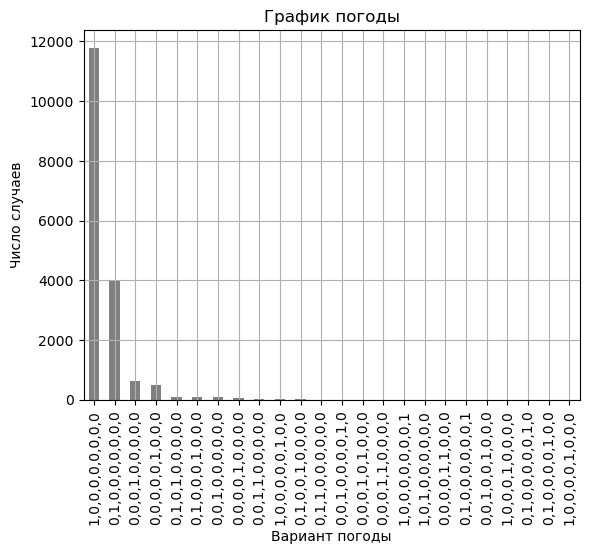

In [378]:
# Построим график.

weather_df_count.plot(kind='bar', grid=True, color = 'grey')
plt.title('График погоды')
plt.xlabel('Вариант погоды')
plt.ylabel('Число случаев');

График сырой, можно и лучше. Чаще всего указывают пасмурную и ясную погоду.

Имеет смысл перевести все показатели в ясную и пасмурную погоду. Учитывая дополнительные факторы.

Для упрощения работы можно перевести все данные в ясную и пасмурную погоду.
Также эти данные можно разделить по типу one hot encoding.

In [379]:
# Подготовим датафрейм с погодой для OHE.

weather_ohe = pd.DataFrame()

weather_ohe['id'] = df['id'].copy()

In [382]:
weather_ohe
my_list

['Ясно',
 'Пасмурно',
 'Метель',
 'Снегопад',
 'Туман',
 'Дождь',
 'Температура выше +30С',
 'Ураганный ветер',
 'Температура ниже -30С']

In [383]:
weather_ohe[my_list] = df.apply(return_w,
                                    axis=1).str.split(',',
                                                      expand=True).astype(int)

weather_ohe.info()
weather_ohe.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17361 entries, 0 to 17360
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   id                     17361 non-null  int64
 1   Ясно                   17361 non-null  int64
 2   Пасмурно               17361 non-null  int64
 3   Метель                 17361 non-null  int64
 4   Снегопад               17361 non-null  int64
 5   Туман                  17361 non-null  int64
 6   Дождь                  17361 non-null  int64
 7   Температура выше +30С  17361 non-null  int64
 8   Ураганный ветер        17361 non-null  int64
 9   Температура ниже -30С  17361 non-null  int64
dtypes: int64(10)
memory usage: 1.3 MB


id  Ясно  Пасмурно  Метель  Снегопад  Туман  Дождь  \
0  2872510     1         0       0         0      0      0   
1  1811577     1         0       0         0      0      0   
2  2620851     1         0       0         0      0      0   
3  2646512     1         0       0         0      0      0   
4  1818264     0         1       0         0      0      0   

   Температура выше +30С  Ураганный ветер  Температура ниже -30С  
0                      0                0                      0  
1                      0                0                      0  
2                      0                0                      0  
3                      0                0                      0  
4                      0                0                      0

In [384]:
# Посмотрим описательные статистики.

weather_ohe.describe().T

count          mean            std        min  \
id                     17361.0  2.069096e+06  405952.150653  1810268.0   
Ясно                   17361.0  6.806636e-01       0.466233        0.0   
Пасмурно               17361.0  2.428432e-01       0.428813        0.0   
Метель                 17361.0  8.294453e-03       0.090698        0.0   
Снегопад               17361.0  4.498589e-02       0.207279        0.0   
Туман                  17361.0  5.414435e-03       0.073385        0.0   
Дождь                  17361.0  3.392662e-02       0.181046        0.0   
Температура выше +30С  17361.0  1.497610e-03       0.038671        0.0   
Ураганный ветер        17361.0  2.304015e-04       0.015178        0.0   
Температура ниже -30С  17361.0  1.728011e-04       0.013145        0.0   

                             25%        50%        75%        max  
id                     1814608.0  1818948.0  2521201.0  2943653.0  
Ясно                         0.0        1.0        1.0        1.0  
Пасмурно                     0.0        0.0        0.0        1.0  
Метель                       0.0        0.0        0.0        1.0  
Снегопад                     0.0        0.0        0.0        1.0  
Туман                        0.0        0.0        0.0        1.0  
Дождь                        0.0        0.0        0.0        1.0  
Температура выше +30С        0.0        0.0        0.0        1.0  
Ураганный ветер              0.0        0.0        0.0        1.0  
Температура ниже -30С        0.0        0.0        0.0        1.0

Графики

In [385]:
# Посмотрим число ДТП по месяцам.

weather_plot = df['datetime'].dt.to_period("M").sort_values().value_counts(
    sort=False)
weather_plot.plot(kind='bar', grid=True, figsize=[20, 10],color = 'red')
plt.title('Динамика ДТП по Московской области за 2015-2024 гг.')
plt.xlabel('Месяц, год')
plt.ylabel('Число ДТП');

AttributeError: Can only use .dt accessor with datetimelike values

Видна четкая сезонность, и нисходящий тренд по числу ДТП. Похоже, сотрудники ГИБДД не зря едят свой хлеб, но, возможно, это связано с качеством дорог, разметке, качеством авто, законодательной базой. Здесь можно сделать множество предположений. Также можно предположить, что большая часть водителей реже пользуются автомобилями или не пользуются совсем. В летний период увеличивается число водителей-путешественников.

In [ ]:
df['category'].value_counts(ascending = True).plot(kind = 'barh')
plt.title('Вид ДТП');

In [ ]:
df['light'].value_counts().plot(kind = 'pie', label = '');
plt.title('Время суток');

В светлое время суток чаще ездят, освещение присутствует на крупных магистралях, где более интенсивное движение. Но стоит отметить дороги, где нет освещения. Можно посмотреть категории ДТП в зависимости от типа освещения. Здесь можно провести кластеризацию.(еще один пет-проект, увязывая на тип ДТП).

In [ ]:
# Посмотрим тяжесть ДТП.

df['severity'].value_counts().plot(kind = 'pie', label = '')
plt.title('Тяжесть ДТП');

In [ ]:
# Процентное соотношение.

df['severity'].value_counts(normalize= True).round(2)*100

Почти 2/3 ДТП - являются тяжелыми (есть раненные и с погибшие).

In [ ]:
# Посмотрим число погибших.

dead_df = df[['datetime','dead_count', 'injured_count']].copy()

dead_df['datetime_M'] = dead_df['datetime'].dt.to_period("M")

dead_df=dead_df.sort_values(by = ['datetime_M'])

In [ ]:
dead_df.groupby('datetime_M')['dead_count'].sum().plot(kind='bar',
                                                       grid=True,
                                                       figsize=[20, 10]
                                                      )

plt.title('Динамика погибших по Московской области за 2015-2023 гг.')
plt.xlabel('Месяц, год')
plt.ylabel('Число погибших');

In [ ]:
# Смотрим число пострадавших.

dead_df.groupby('datetime_M')['injured_count'].sum().plot(kind='bar',
                                                          grid=True,
                                                          color = 'green',
                                                          figsize=[20, 10])

plt.title('Динамика пострадавших по Московской области за 2015-2023 гг.')
plt.xlabel('Месяц, год')
plt.ylabel('Число пострадавших');

Как видим количество ДТП, погибших и пострадавших имеют тенденцию к снижению, четкую сезонность. Дальнейшую обработку данных можно делать на ваше усмотрение.)))

# Третья часть

# Рефракторниг кода

Соберем все блоки кода вместе. Попробуем улучшить наш код, написав функцию.

Как видим, при разделении датасета на части, объем потребляемой памяти увеличивается с dead kernel (RIP). Чтобы ядро пережило весь код, воспользуемся локальным пространством функции для сборки датафреймов. Здесь вновь загрузим все библиотеки.

In [ ]:
# Загрузка библиотек

import os
import pandas as pd
# from pandas_geojson import read_geojson
import re
import requests
import matplotlib.pyplot as plt
import datetime as dt
import dill as pickle

In [ ]:
# Заплатка для Windows и новой библиотеки.

def read_geojson(filename):
    with open(f'{filename}', encoding= 'utf-8') as response:
        geo_json = json.load(response)
    return geo_json

In [ ]:
# Пишем функцию по нормализации данных в пандас.


def normalize_json_to_data(data, col):

    # Сначала explode потом json_normalize по нужному столбцу.

    data_out = pd.json_normalize(data.explode(col)[col])

    # Все таблицы связаны между собой через id родительской таблицы.

    data_out = pd.concat(
        [pd.DataFrame(data.explode(col)['id'].values, columns=['id']), data_out],
        axis=1)

    return data_out

In [ ]:
# Прочитаем файлы в дирректории dtp и переведем первый файл в датафрейм
list_file = os.listdir('dtp')


geo_json = read_geojson(os.path.join('dtp',list_file[0]))

In [ ]:
# Используем нормализацию json из бибилотеки pandas - json_normalize

df = pd.json_normalize(geo_json['features'])

In [ ]:
# Удалим корневые названия и столбцы содержащие type

df = df.drop([col for col in df.columns if 'type' in col], axis =1)

df.columns = [col.split('.')[-1] for col in df.columns]


In [ ]:
# Датафрейм для машин.

df_vehicles = normalize_json_to_data(df, 'vehicles').reset_index(drop=True)

# Датафрейм для пассажиров машин.

df_vehicles_participants = normalize_json_to_data(
    df_vehicles, 'participants').reset_index(drop=True)

# Датафрейм для пешеходов.
# Дополнительно удалим все пустые строки, так как там нет пешеходов.
df_footer = normalize_json_to_data(
    df, 'participants').dropna().reset_index(drop=True)

In [ ]:
# Удяляем участников в транспортном средстве.

df_vehicles = df_vehicles.drop(['participants'], axis=1)

In [ ]:
#  Объединим таблицы df_footer и df_vehicles_participants

df_foot_part = pd.concat([df_vehicles_participants,
                          df_footer]).copy().reset_index(drop=True)

In [ ]:
# Пишем функцию, которая вернет нам обработанный датафрейм


def return_true_dfs(path):
    geo_json = read_geojson(os.path.join('dtp', path))  # Замена path

    df = pd.json_normalize(geo_json['features'])  # Получаем общий датафрейм

    # Обрабатываем название колонок

    df = df.drop([col for col in df.columns if 'type' in col], axis=1)
    df.columns = [col.split('.')[-1] for col in df.columns]

    # Сразу снижаем размерность id.
    # Чем ниже размерность int, тем меньше ячеек памяти выделяется.
    # Тем меньший диапзон чисел будет хранится, будьте внимательны.
    # NB - не изменяйте размерность float!!!

    df['id'] = df['id'].astype('int32')

    # Датафрейм для машин.

    df_vehicles = normalize_json_to_data(df, 'vehicles').reset_index(drop=True)

    # Датафрейм для пассажиров машин.

    df_vehicles_participants = normalize_json_to_data(
        df_vehicles, 'participants').reset_index(drop=True)

    # Датафрейм для пешеходов.

    # Дополнительно удалим все пустые строки, так как там нет пешеходов.

    df_footer = normalize_json_to_data(df,
                                       'participants').reset_index(drop=True)

    # Удяляем участников в транспортном средстве.

    df_vehicles = df_vehicles.drop(['participants'], axis=1)
    df = df.drop(['participants', 'vehicles'], axis=1)

    #  Объединим таблицы df_footer и df_vehicles_participants удалим пустые роли.

    df_foot_part = pd.concat(
        [df_vehicles_participants,
         df_footer]).copy().dropna(subset='role').reset_index(drop=True)

    # Возвращаем полученные датасеты.

    return df, df_vehicles, df_foot_part

In [ ]:
data_base, data_vehicles,  df_foot_part = return_true_dfs(list_file[0])

Да, теперь у нас все собирает одна функция. Но вдруг нам понадобится, только один датафрейм.

Давайте обернем функцию, в функцию с условиями.

In [ ]:
# _ означает, что данная переменная нам не нужна
# n=1 устанавливает по умолчание значение = 1
def return_df(path, n=1):

    # Смысл работе прост, n - переключатель датафрейма.
    if n == 1:
        df, _, _ = return_true_dfs(path)

    if n == 2:
        _, df, _ = return_true_dfs(path)

    if n == 3:
        _, _, df = return_true_dfs(path)

    return df

In [ ]:
return_df(list_file[0]).head()

In [ ]:
# Теперь прочитаем загруженные файлы и соберем основной датафрейм конкатенацией.

data_base = pd.DataFrame()

for path in list_file:
    data_base = pd.concat([data_base, return_df(path)]).reset_index(drop=True)

In [ ]:
data_base.info()

In [ ]:
first_look_data(data_base)

In [ ]:
import pickle

In [ ]:
with open("data_base.pickle", "wb") as file:
    pickle.dump(data_base, file)

In [ ]:
del data_base

In [ ]:
data_vehicles = pd.DataFrame()

for path in list_file:
    data_vehicles = pd.concat([data_vehicles,return_df(path, 2)])

In [ ]:
data_vehicles.info()

In [ ]:
with open("data_vehicles.pickle", "wb") as file:
    pickle.dump(data_vehicles, file)

In [ ]:
del data_vehicles

In [ ]:
df_foot_part = pd.DataFrame()

for path in list_file:
    df_foot_part = pd.concat([df_foot_part,return_df(path, 3)])

In [ ]:
df_foot_part.info()

In [ ]:
with open("df_foot_part.pickle", "wb") as file:
    pickle.dump(df_foot_part, file)

In [ ]:
del df_foot_part

## Еще раз рефракторинг

In [ ]:
# Перепишем функцию, которая вернет нам обработанныы датафрейм


def return_true_dfs_1(path, number_data):
    geo_json = read_geojson(os.path.join('dtp', path))  # Получаем файл geo_json

    df = pd.json_normalize(geo_json['features'])  # Получаем общий датафрейм

    # Обрабатываем название колонок

    df = df.drop([col for col in df.columns if 'type' in col], axis=1)
    df.columns = [col.split('.')[-1] for col in df.columns]

    # Сразу снижаем размерность id

    df['id'] = df['id'].astype('int32')


    # Прописываем условие для каждого датасета.

    if number_data == 1:

        # Общий датафрейм без json структур

        return df.drop(['participants', 'vehicles'], axis=1)

    if number_data == 2:

        # Датафрейм для машин.

        df_vehicles = normalize_json_to_data(df,
                                             'vehicles').reset_index(drop=True)

        return df_vehicles.drop(['participants'], axis=1)

    if number_data == 3:


        # Датафрейм для машин.
        df_vehicles = normalize_json_to_data(
            df, 'vehicles').reset_index(drop=True)[['id', 'participants']]
        # Датафрейм для пассажиров машин.
        df_vehicles_participants = normalize_json_to_data(
            df_vehicles, 'participants').reset_index(drop=True)

        # Датафрейм для пешеходов.

        # Дополнительно удалим все пустые строки, так как там нет пешеходов.

        df_footer = normalize_json_to_data(
            df, 'participants').reset_index(drop=True)

        #  Объединим таблицы df_footer и df_vehicles_participants

        return pd.concat(
            [df_vehicles_participants,
             df_footer]).copy().dropna(subset='role').reset_index(drop=True)
    # Возвращаем пустое значение, если ни одно условие не выполнилось.

    return

In [ ]:
df_foot_part = pd.DataFrame()

for path in list_file:
    df_foot_part = pd.concat([df_foot_part,return_true_dfs_1(path, 3)])

In [ ]:
del df_foot_part

In [ ]:
# Для чего нужен pickle?

with open("data_vehicles.pickle", 'rb') as file:
    data_vehicles = pickle.load(file)

In [ ]:
data_vehicles = data_vehicles.reset_index(drop = True)
data_vehicles

In [ ]:
del data_vehicles

In [ ]:
with open("data_base.pickle", 'rb') as file:
    data_base = pickle.load(file)

In [ ]:
data_base.describe()

In [ ]:
del data_base

In [ ]:
with open("df_foot_part.pickle", 'rb') as file:
    df_foot_part = pickle.load(file)

In [ ]:
df_foot_part.info()

In [ ]:
alko_list = df_foot_part.explode('violations')['violations'].unique()

In [ ]:
for name_violation in alko_list:
    try:
        if 'алко' in name_violation:
            print(name_violation)
    except:
        pass

In [ ]:
alko_list